# Compute behavioral similarity (via syllable usage) across individuals for different ages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc
from toolz import partial
from scipy.spatial.distance import cdist, pdist, squareform
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, COLORMAPS

In [4]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "fig-4", tight_layout=False)

In [5]:
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_males_raw_usage_matrix_v00.parquet')
df = df[keep_syllables]
# df = df.query('age < 90')
index = ['age', 'mouse', 'uuid', 'subject_name', 'session_name', 'date']

In [6]:
index = ['binned_age'] + index
ages = df.index.get_level_values('age')
df = df.reset_index()

In [7]:
weeks = (ages * 7) // 7
df['binned_age'] = weeks

sample = df.groupby(['mouse', 'binned_age']).first().reset_index()

In [13]:
df.query('age > 100').groupby('binned_age')['mouse'].nunique()

binned_age
114.0    12
116.0    12
118.0    11
122.0    10
124.0    10
126.0    11
129.0     8
130.0     6
133.0     4
135.0     4
137.0     4
139.0     2
141.0     1
Name: mouse, dtype: int64

In [8]:
keep_ages = sample.groupby('binned_age')['mouse'].count() > 8
keep_ages = keep_ages[keep_ages].index

In [9]:
sample = sample[sample['binned_age'].isin(keep_ages)]

In [10]:
syllable_columns = np.array(list(filter(lambda x: isinstance(x, int), sample.columns)))

In [11]:
ser = []
for _age, _df in sample.groupby("binned_age"):
    index = pd.MultiIndex.from_product([_df['mouse'].values, [_age]], names=['mouse', 'age'])
    s = pd.Series(
        squareform(pdist(_df[syllable_columns], metric="jensenshannon")).mean(1),
        index=index,
        name="iid",
    )
    ser.append(s)
ser = pd.concat(ser).reset_index()

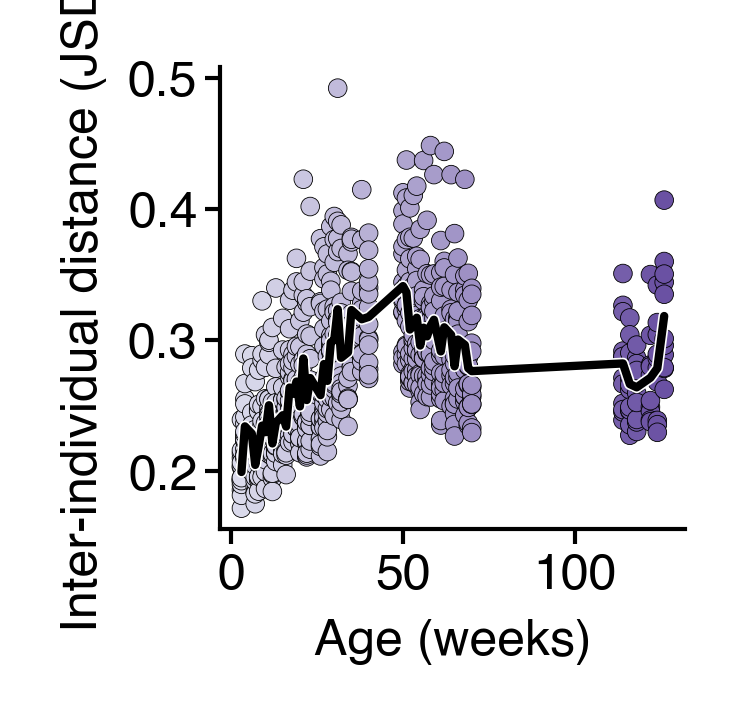

In [12]:
fig = figure(1, 1)
ax = sns.scatterplot(
    data=ser,
    x="age",
    y="iid",
    s=5,
    linewidths=0.1,
    edgecolor="k",
    hue="age",
    palette=COLORMAPS.long_male,
    legend=False,
)
sns.lineplot(data=ser, x='age', y='iid', errorbar=None, color='w', lw=1.4)
sns.lineplot(data=ser, x="age", y="iid", errorbar=None, color="k", lw=1)
ax.set(ylabel='Inter-individual distance (JSD)', xlabel="Age (weeks)")
sns.despine()
# saver(fig, "inter-individual-distance-jsd-colored-by-age");

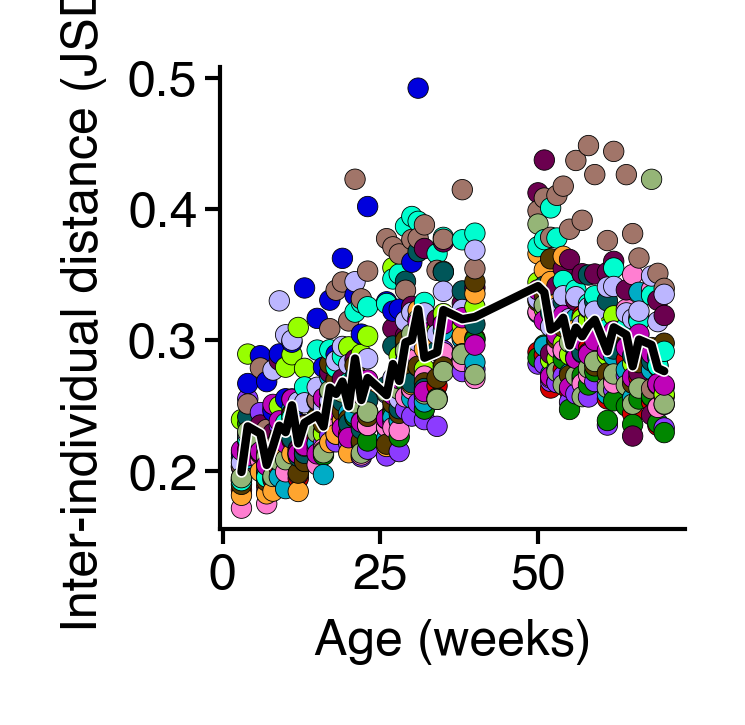

In [20]:
fig = figure(1, 1)
ax = sns.scatterplot(data=ser, x='age', y='iid', s=6, linewidths=0.1, edgecolor='k', hue='mouse', legend=False, palette=cc.glasbey[:16])
sns.lineplot(data=ser, x='age', y='iid', errorbar=None, color='w', lw=1.4)
sns.lineplot(data=ser, x='age', y='iid', errorbar=None, color='k', lw=1)
ax.set(ylabel='Inter-individual distance (JSD)', xlabel="Age (weeks)")
sns.despine()
saver(fig, "inter-individual-distance-jsd-colored-by-mouse");

In [21]:
ser = []
for _age, _df in sample.groupby("binned_age"):
    index = pd.MultiIndex.from_product([_df['mouse'].values, [_age]], names=['mouse', 'age'])
    s = pd.Series(
        squareform(pdist(_df[syllable_columns], metric="cosine")).mean(1),
        index=index,
        name="iid",
    )
    ser.append(s)
ser = pd.concat(ser).reset_index()

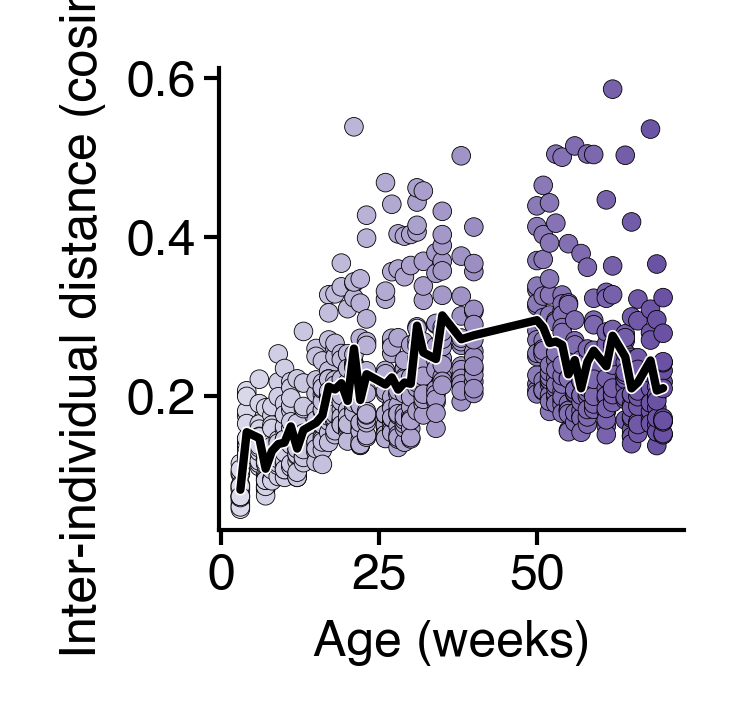

In [22]:
fig = figure(1, 1)
ax = sns.scatterplot(
    data=ser,
    x="age",
    y="iid",
    s=5,
    linewidths=0.1,
    edgecolor="k",
    hue="age",
    palette=LONGTOGENY_AGE_CMAP,
    legend=False,
)
sns.lineplot(data=ser, x='age', y='iid', errorbar=None, color='w', lw=1.4)
sns.lineplot(data=ser, x="age", y="iid", errorbar=None, color="k", lw=1)
ax.set(ylabel='Inter-individual distance (cosine)', xlabel="Age (weeks)")
sns.despine()
saver(fig, "inter-individual-distance-cosine-colored-by-age");

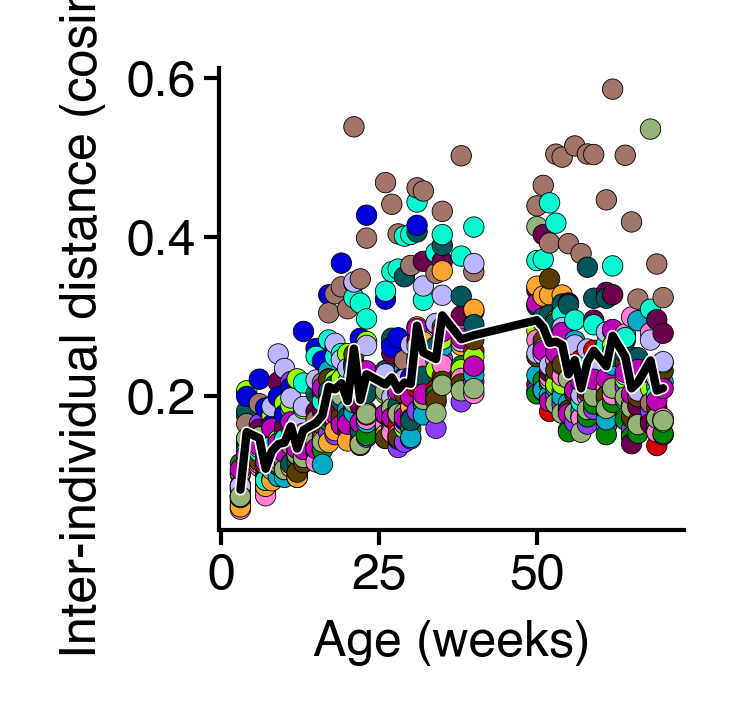

In [24]:
fig = figure(1, 1)
ax = sns.scatterplot(
    data=ser,
    x="age",
    y="iid",
    s=6,
    linewidths=0.1,
    edgecolor="k",
    hue="mouse",
    legend=False,
    palette=cc.glasbey[:16],
)
sns.lineplot(data=ser, x="age", y="iid", errorbar=None, color="w", lw=1.4)
sns.lineplot(data=ser, x="age", y="iid", errorbar=None, color="k", lw=1)
ax.set(ylabel="Inter-individual distance (cosine)", xlabel="Age (weeks)")
sns.despine()
saver(fig, "inter-individual-distance-cosine-colored-by-mouse");

## examples of syllable usage between two animals at young vs old age

In [33]:
ba = sample.set_index(['binned_age', 'mouse'])[syllable_columns]

In [34]:
ba

syllables               0         2         4         5         6         7   \
binned_age mouse                                                               
3.0        01_01  0.002556  0.012781  0.001534  0.046524  0.004601  0.018405   
4.0        01_01  0.000846  0.033855  0.002539  0.055861  0.002539  0.049513   
6.0        01_01  0.000847  0.061415  0.013977  0.048285  0.006353  0.047861   
7.0        01_01  0.001181  0.029528  0.017717  0.051181  0.012598  0.043307   
8.0        01_01  0.000746  0.039925  0.011194  0.050373  0.007836  0.044403   
...                    ...       ...       ...       ...       ...       ...   
65.0       04_04  0.006633  0.040816  0.046939  0.058163  0.002551  0.035714   
66.0       04_04  0.002081  0.017170  0.036941  0.054631  0.001561  0.039022   
68.0       04_04  0.003023  0.027708  0.055919  0.043829  0.002015  0.034257   
69.0       04_04  0.002950  0.031957  0.019666  0.061947  0.001475  0.053097   
70.0       04_04  0.008384  0.042385  0.047042  0.042385  0.003260  0.036796   

syllables               9         10        11        12  ...        77  \
binned_age mouse                                          ...             
3.0        01_01  0.032209  0.002045  0.049591  0.000000  ...  0.000000   
4.0        01_01  0.025391  0.001270  0.031316  0.000423  ...  0.000423   
6.0        01_01  0.022448  0.001694  0.021177  0.002965  ...  0.000847   
7.0        01_01  0.045276  0.001181  0.033465  0.004331  ...  0.001575   
8.0        01_01  0.032836  0.001866  0.032463  0.001866  ...  0.000373   
...                    ...       ...       ...       ...  ...       ...   
65.0       04_04  0.022449  0.002041  0.007143  0.001531  ...  0.003061   
66.0       04_04  0.029657  0.007284  0.001561  0.002081  ...  0.001561   
68.0       04_04  0.024181  0.003526  0.009068  0.003023  ...  0.004030   
69.0       04_04  0.020157  0.002458  0.002458  0.000492  ...  0.003933   
70.0       04_04  0.017233  0.001863  0.005589  0.003726  ...  0.004658   

syllables               79        83        84        85        90        93  \
binned_age mouse                                                               
3.0        01_01  0.000000  0.009202  0.004090  0.014315  0.010225  0.000511   
4.0        01_01  0.000000  0.005501  0.004655  0.017351  0.019044  0.001693   
6.0        01_01  0.002541  0.007624  0.001271  0.009318  0.024142  0.000424   
7.0        01_01  0.007480  0.003543  0.006693  0.009843  0.021654  0.004331   
8.0        01_01  0.008582  0.016418  0.006716  0.008955  0.030970  0.003358   
...                    ...       ...       ...       ...       ...       ...   
65.0       04_04  0.017347  0.011224  0.003571  0.004592  0.040816  0.003061   
66.0       04_04  0.006764  0.008325  0.002081  0.004683  0.036420  0.001561   
68.0       04_04  0.014610  0.013602  0.008060  0.005038  0.033249  0.004030   
69.0       04_04  0.013274  0.016224  0.000983  0.004425  0.042773  0.002458   
70.0       04_04  0.017233  0.014905  0.007918  0.003260  0.033069  0.001863   

syllables               95        97        98  
binned_age mouse                                
3.0        01_01  0.005112  0.000000  0.002556  
4.0        01_01  0.004232  0.000000  0.006348  
6.0        01_01  0.002965  0.001271  0.009742  
7.0        01_01  0.003150  0.005512  0.010236  
8.0        01_01  0.003358  0.003358  0.010821  
...                    ...       ...       ...  
65.0       04_04  0.016327  0.009184  0.021429  
66.0       04_04  0.008845  0.002601  0.015088  
68.0       04_04  0.015617  0.006045  0.032746  
69.0       04_04  0.006391  0.001967  0.029007  
70.0       04_04  0.010247  0.009315  0.044714  

[723 rows x 58 columns]

In [30]:
ba.index.levels[0]

Index([ 3.0,  4.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0, 13.0, 15.0, 16.0,
       17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 26.0, 27.0, 28.0, 29.0, 30.0,
       31.0, 32.0, 34.0, 35.0, 38.0, 40.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0,
       56.0, 57.0, 58.0, 59.0, 61.0, 62.0, 64.0, 65.0, 66.0, 68.0, 69.0, 70.0],
      dtype='float32', name='binned_age')

In [84]:
ind1 = 6
ind2 = 70
b1 = ba.loc[(ind1, "03_01")].to_numpy().squeeze()
b2 = ba.loc[(ind1, "03_04")].to_numpy().squeeze()

b3 = ba.loc[(ind2, "03_01")].to_numpy().squeeze()
b4 = ba.loc[(ind2, "03_04")].to_numpy().squeeze()

syll_df = pd.concat(
    [
        pd.DataFrame(
            dict(
                diff=b1 - b2,
                sort_diff=np.sort(b1 - b2),
                m1=b1,
                m2=b2,
                age=ind1,
                ord=np.arange(len(b1))[np.argsort(b1 - b2)],
            )
        ),
        pd.DataFrame(
            dict(
                diff=b3 - b4,
                sort_diff=np.sort(b3 - b4),
                m1=b3,
                m2=b4,
                age=ind2,
                ord=np.arange(len(b3))[np.argsort(b3 - b4)],
            )
        ),
    ]
).reset_index()
syll_df = syll_df.rename(columns={"index": "syllable"})

In [85]:
syll_df

syllable      diff  sort_diff        m1        m2  age  ord
0           0  0.002943  -0.029889  0.003905  0.000962    6   36
1           1 -0.015968  -0.019684  0.022993  0.038961    6    8
2           2  0.004206  -0.018561  0.009978  0.005772    6   25
3           3 -0.002047  -0.015968  0.032104  0.034151    6    1
4           4 -0.002292  -0.015647  0.007809  0.010101    6   44
..        ...       ...        ...       ...       ...  ...  ...
111        53  0.033527   0.026073  0.054675  0.021148   70   16
112        54  0.004863   0.028982  0.005467  0.000604   70    5
113        55 -0.003424   0.033527  0.003827  0.007251   70   53
114        56  0.000606   0.039340  0.011482  0.010876   70   35
115        57 -0.009811   0.043165  0.007108  0.016918   70   33

[116 rows x 7 columns]

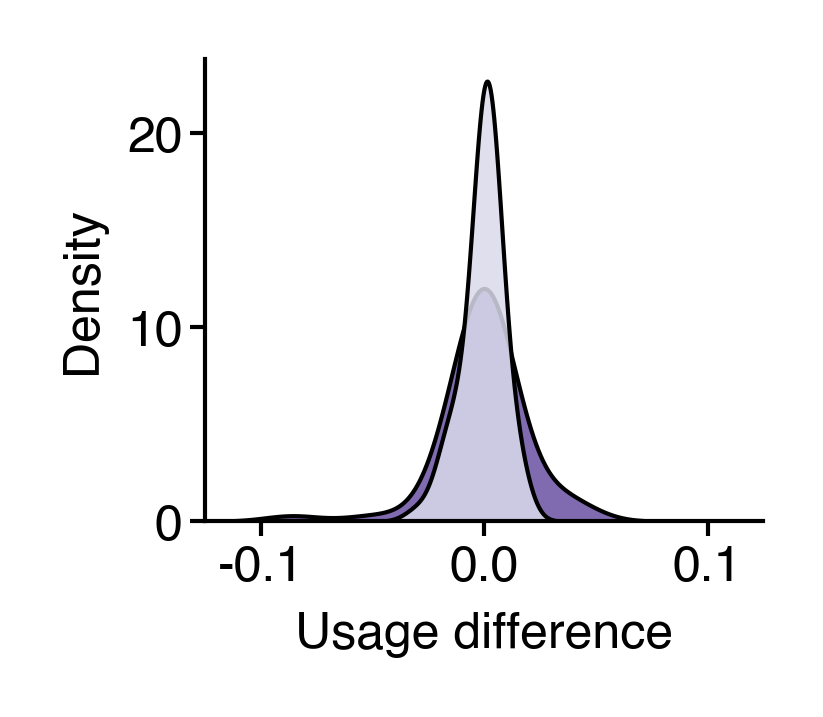

In [124]:
fig = figure(1.2, 1)
ax = sns.kdeplot(data=syll_df, x='diff', hue='age', bw_adjust=1.5, palette=LONGTOGENY_AGE_CMAP, fill=True, edgecolor='k', linewidth=0.5, alpha=0.85, legend=False)
ax.set(xlabel="Usage difference", xlim=(-0.125, 0.125))
sns.despine()
saver(fig, "usage-difference-distribution");

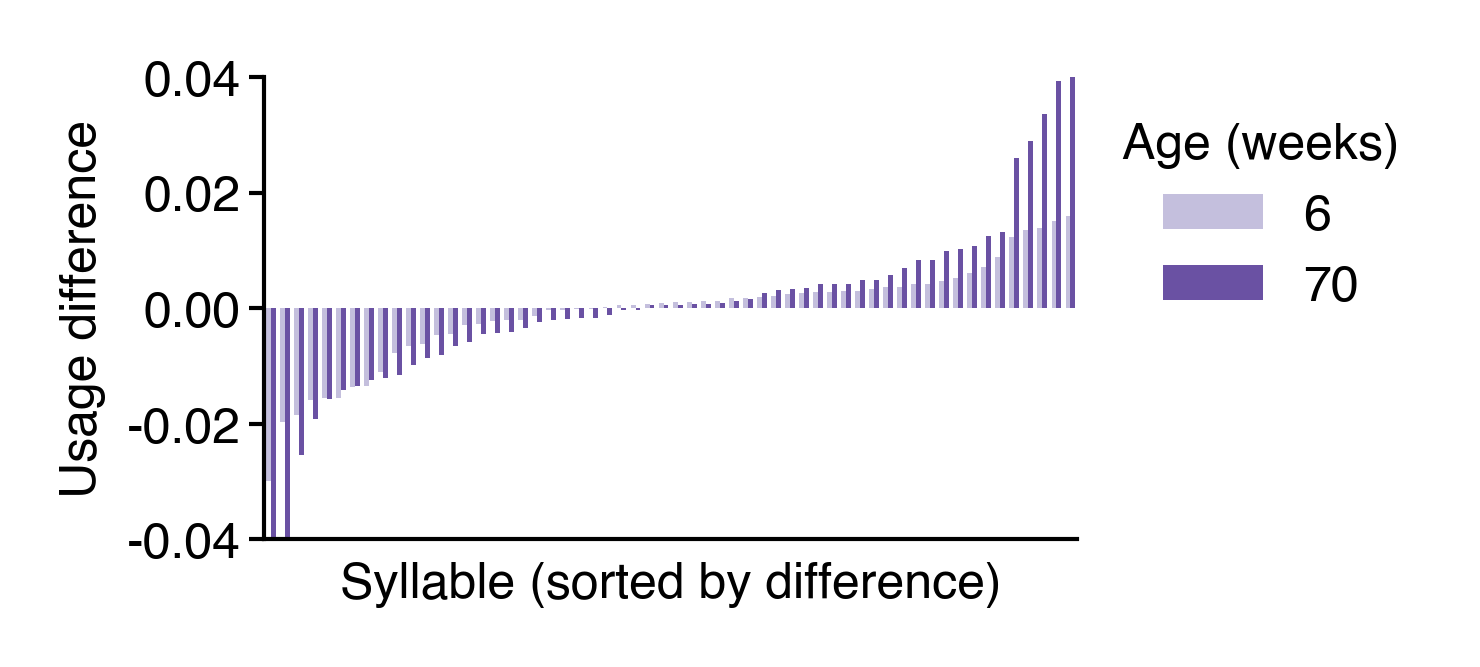

In [76]:
rs = LONGTOGENY_AGE_CMAP.resampled(6)
fig = figure(1.75, 1)
ax = sns.barplot(data=syll_df, x='syllable', y='sort_diff', hue='age', palette=rs([1, 5]).tolist(), width=0.7, saturation=1, lw=0)
ax.set(xticks=[], ylabel="Usage difference", ylim=[-0.04, 0.04], xlabel="Syllable (sorted by difference)")
sns.despine()
legend(ax, title="Age (weeks)")
saver(fig, "sorted-usage-difference-examples");

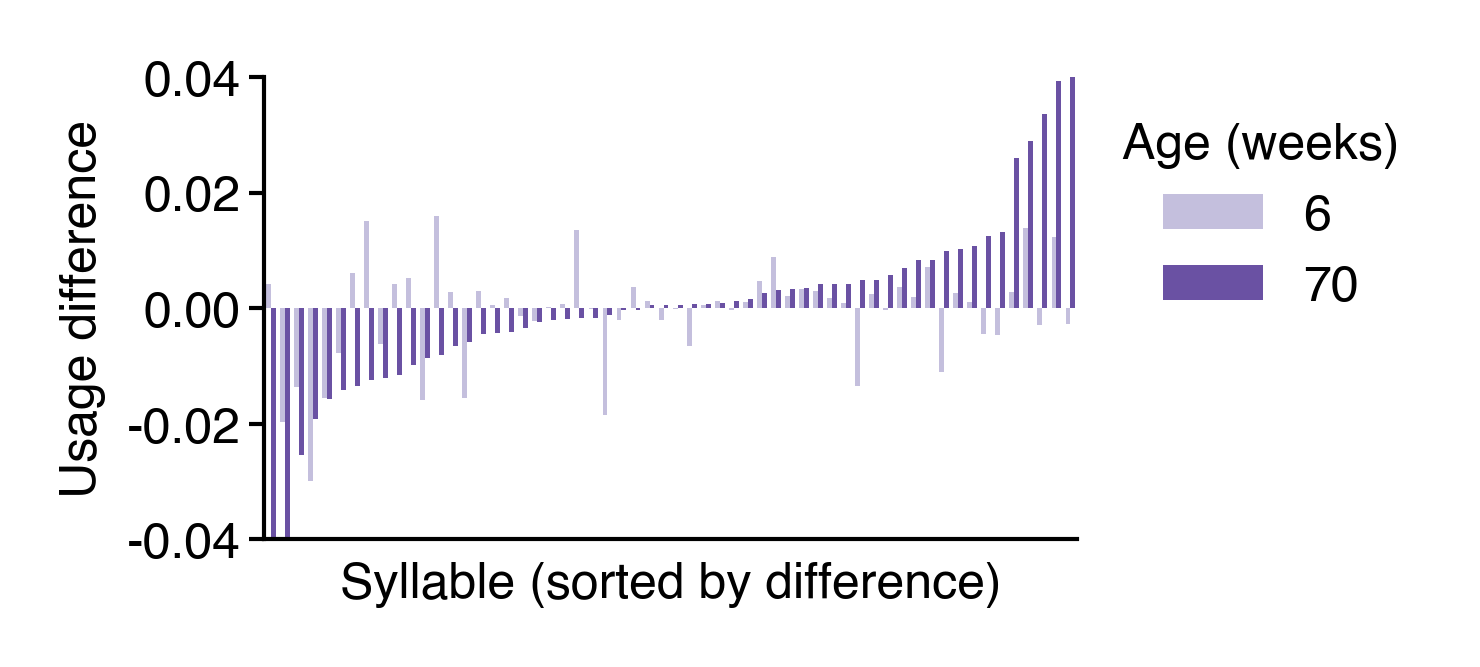

In [77]:
rs = LONGTOGENY_AGE_CMAP.resampled(6)
fig = figure(1.75, 1)
ord = syll_df.query('age == @ind2').sort_values(by='diff')['syllable']
ax = sns.barplot(data=syll_df, x='syllable', y='diff', hue='age', palette=rs([1, 5]).tolist(), width=0.7, saturation=1, order=ord, lw=0)
ax.set(xticks=[], ylabel="Usage difference", ylim=[-0.04, 0.04], xlabel="Syllable (sorted by difference)")
sns.despine()
legend(ax, title="Age (weeks)")
saver(fig, "usage-difference-examples");

In [78]:
idx = np.argsort(b2 + b4)[::-1]

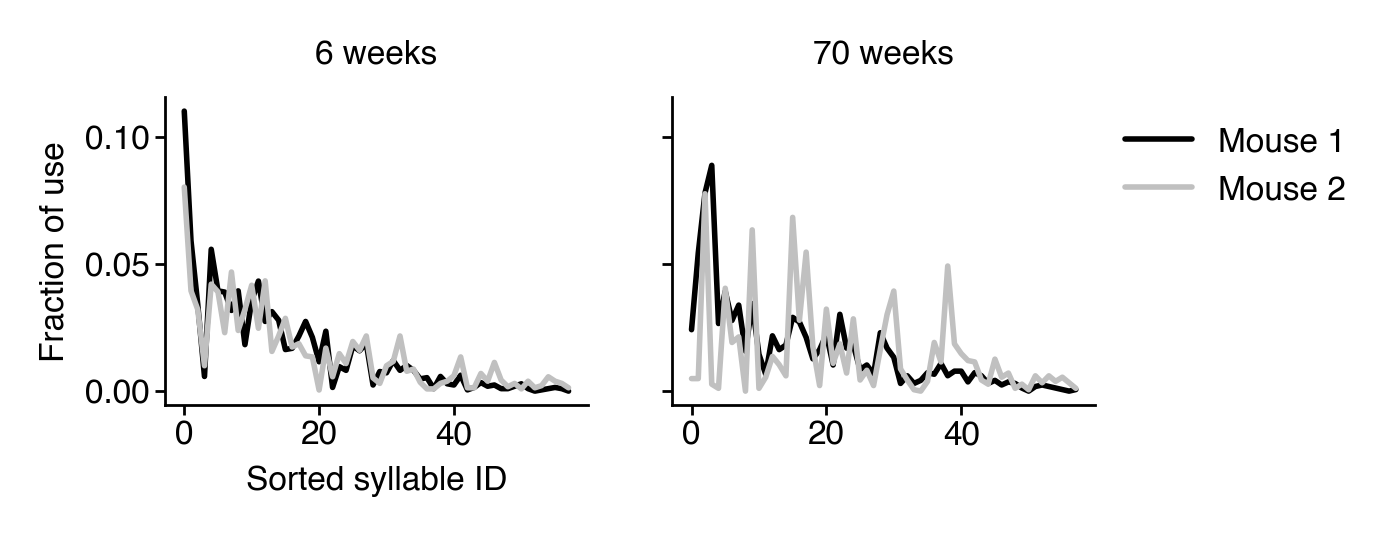

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(3, 1), sharey=True)
ax[0].plot(b2[idx], label="Mouse 1", c='k')
ax[0].plot(b1[idx], label="Mouse 2", c='silver')
ax[1].plot(b4[idx], label="Mouse 1", c='k')
ax[1].plot(b3[idx], label="Mouse 2", c='silver')
ax[1].set(title=f"{ind2} weeks")
ax[0].set(xlabel="Sorted syllable ID", ylabel="Fraction of use", title=f"{ind1} weeks")
legend(ax[1])
sns.despine()
saver(fig, "usage-examples-two-mice");

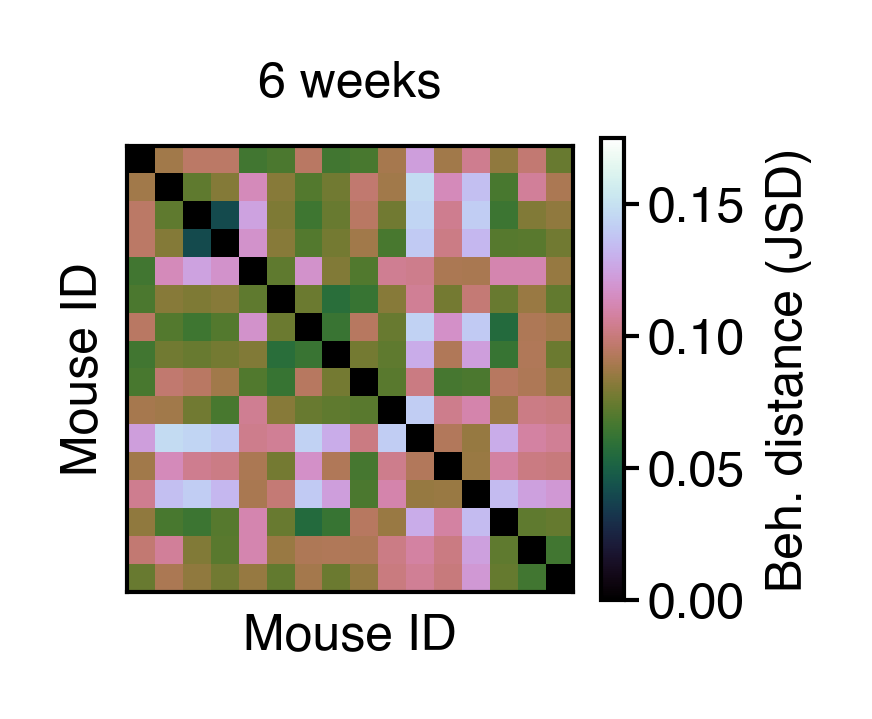

In [83]:
age = syll_df['age'].min()
out = squareform(pdist(ba.loc[ind1]))
fig = figure(1.2, 1)
ax = fig.gca()
im = ax.imshow(out, vmax=0.175, cmap='cubehelix')
ax.set(xticks=[], yticks=[], xlabel="Mouse ID", ylabel="Mouse ID", title=f"{age} weeks")
fig.colorbar(im, ax=ax, label="Beh. distance (JSD)")
saver(fig, f"{age}wk-old-beh-distance-mtx");

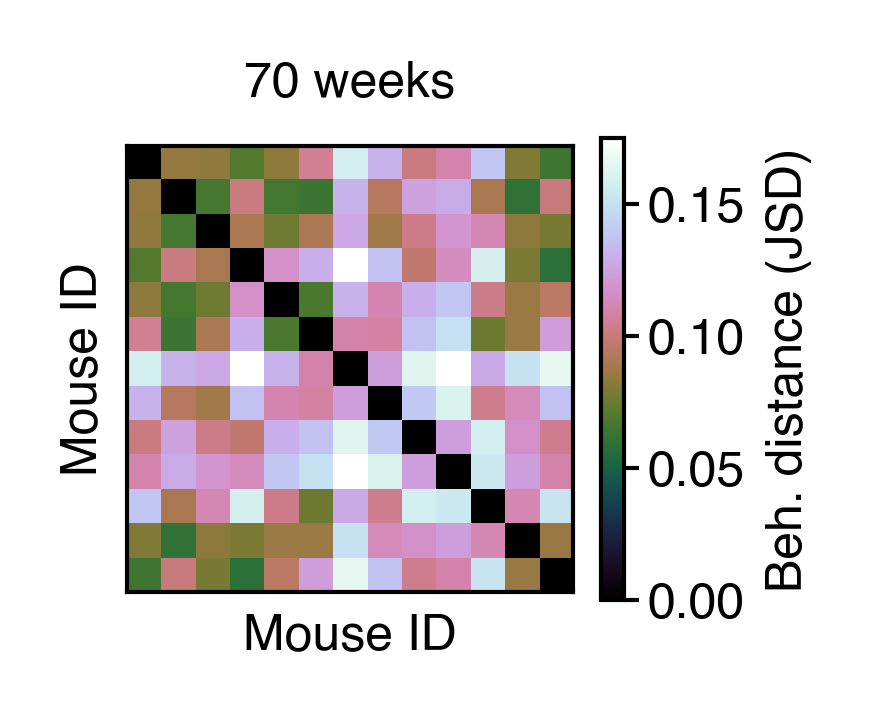

In [82]:
age = syll_df['age'].max()
out = squareform(pdist(ba.loc[ind2]))
fig = figure(1.2, 1)
ax = fig.gca()
im = ax.imshow(out, vmax=0.175, cmap='cubehelix')
ax.set(xticks=[], yticks=[], xlabel="Mouse ID", ylabel="Mouse ID", title=f"{age} weeks")
fig.colorbar(im, ax=ax, label="Beh. distance (JSD)")
saver(fig, f"{age}wk-old-beh-distance-mtx");

## Add 3 mouse cross-correlations

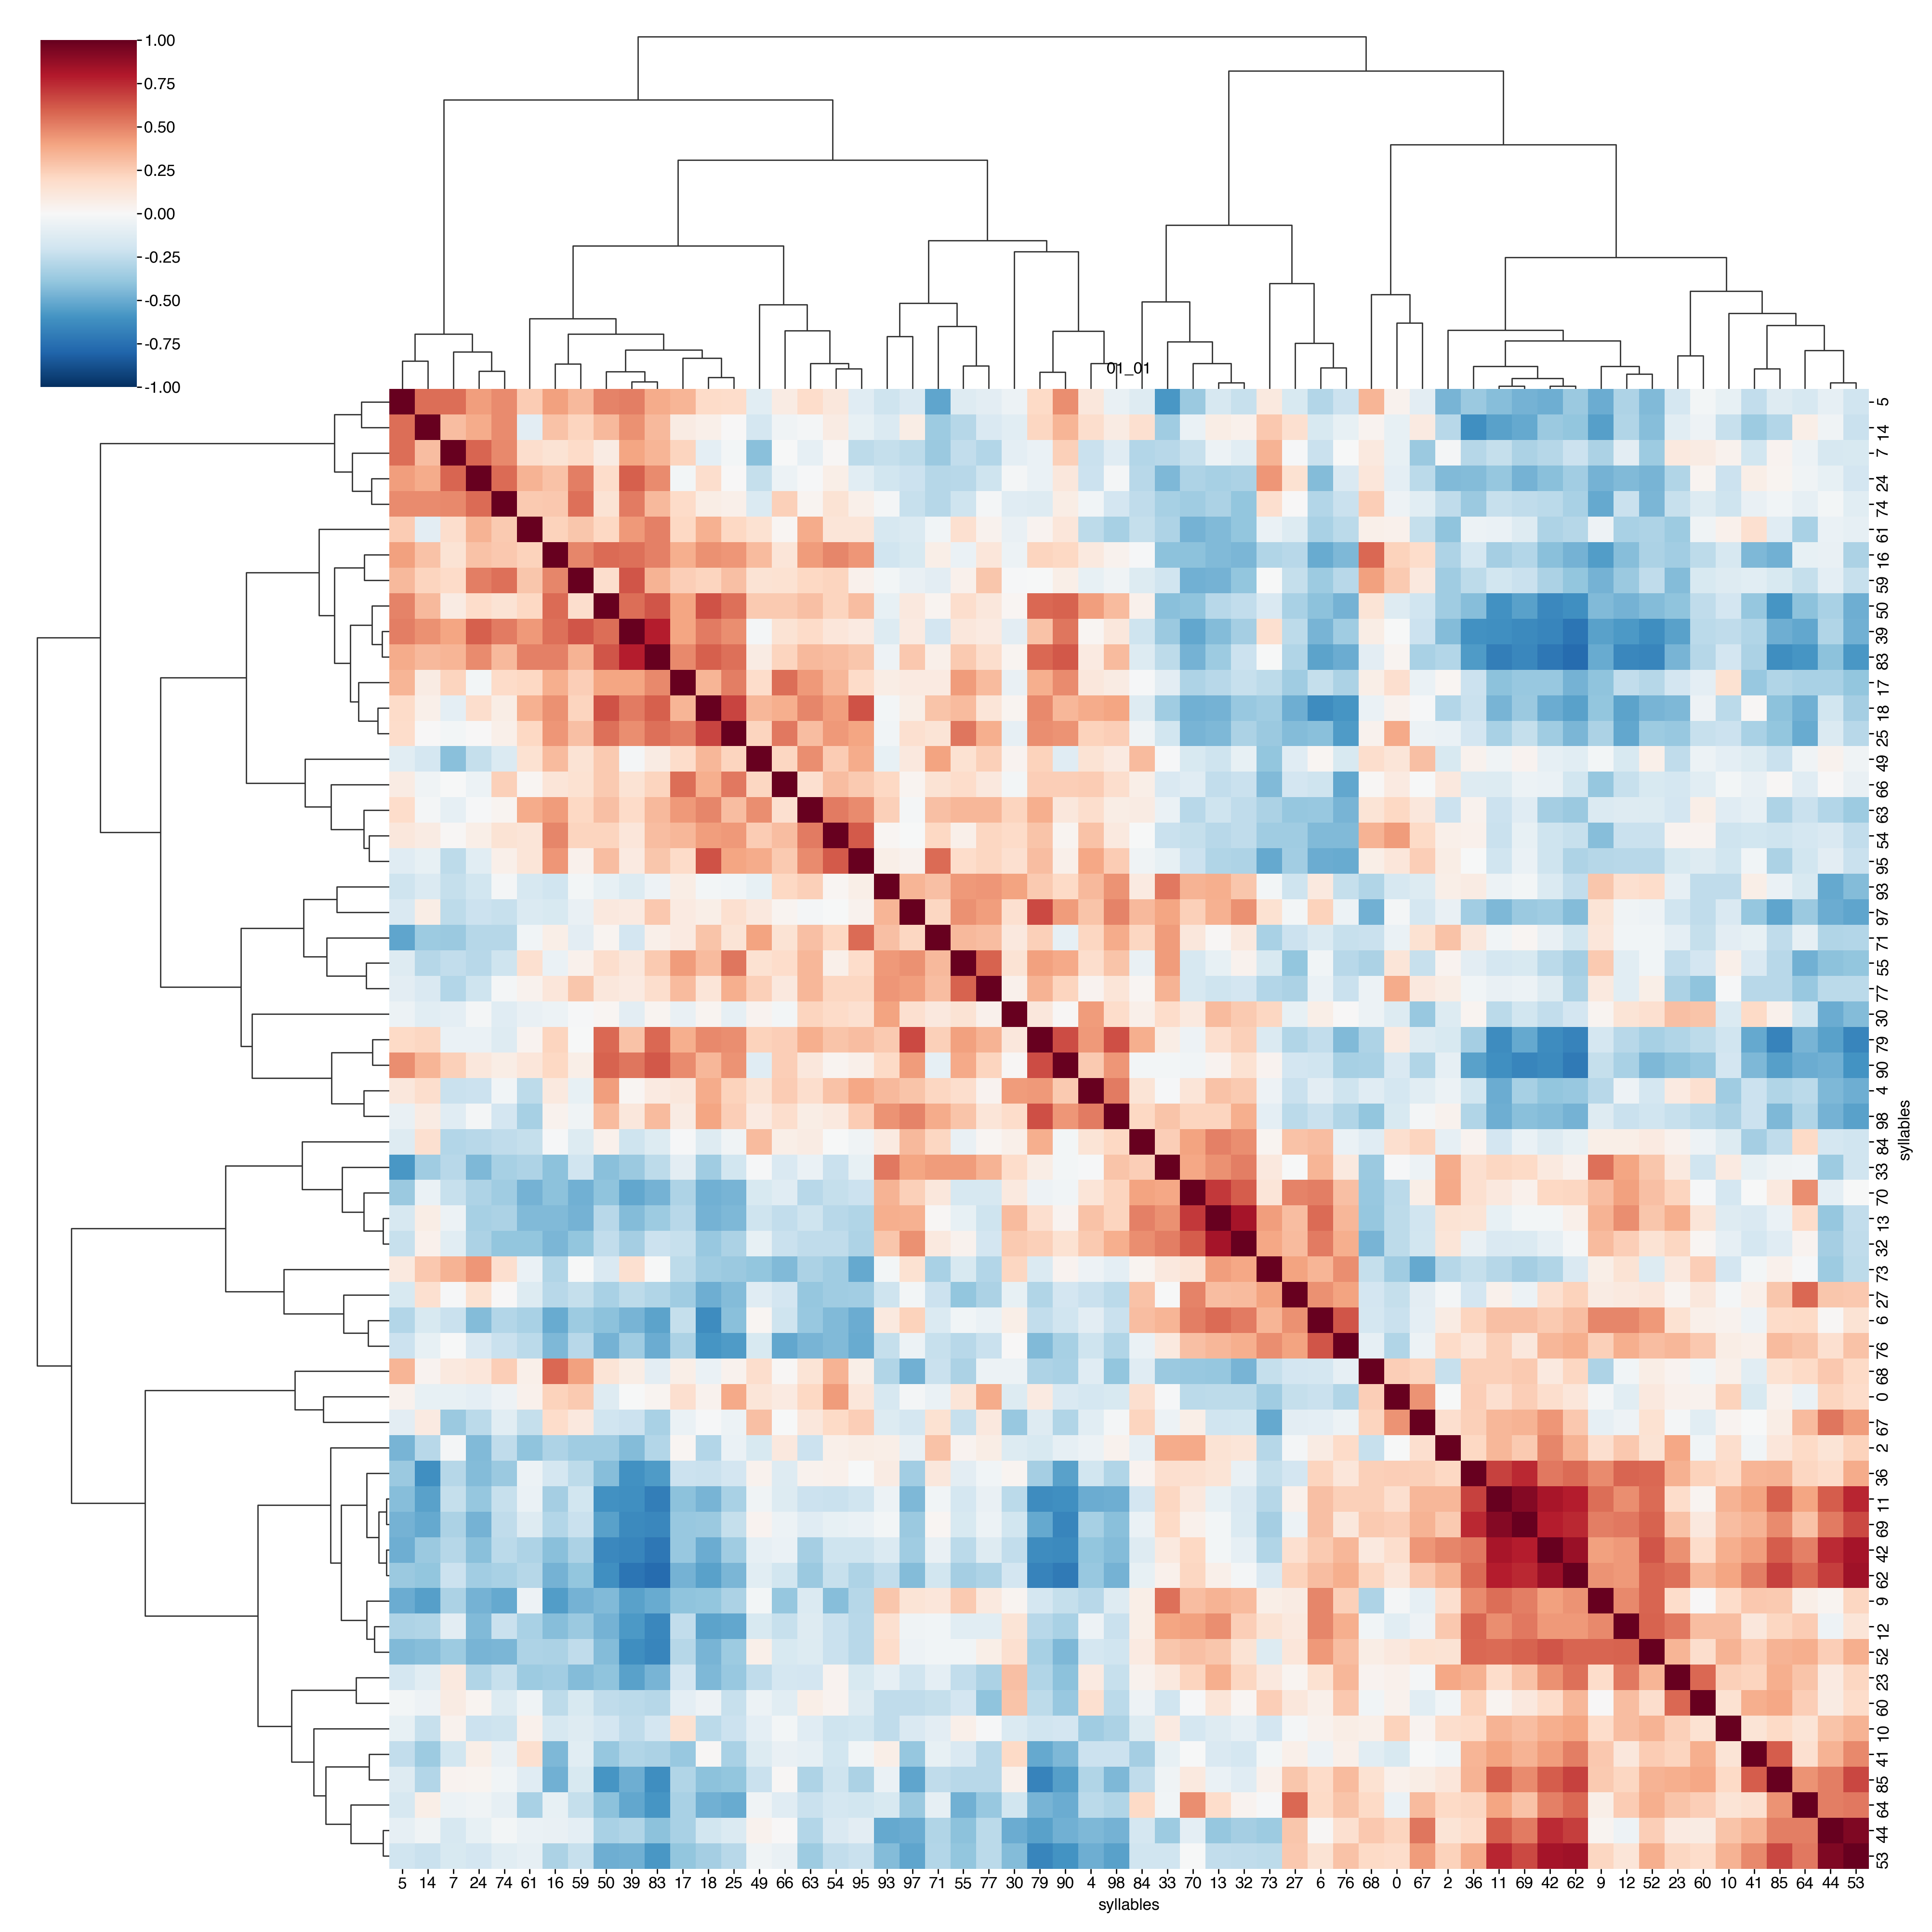

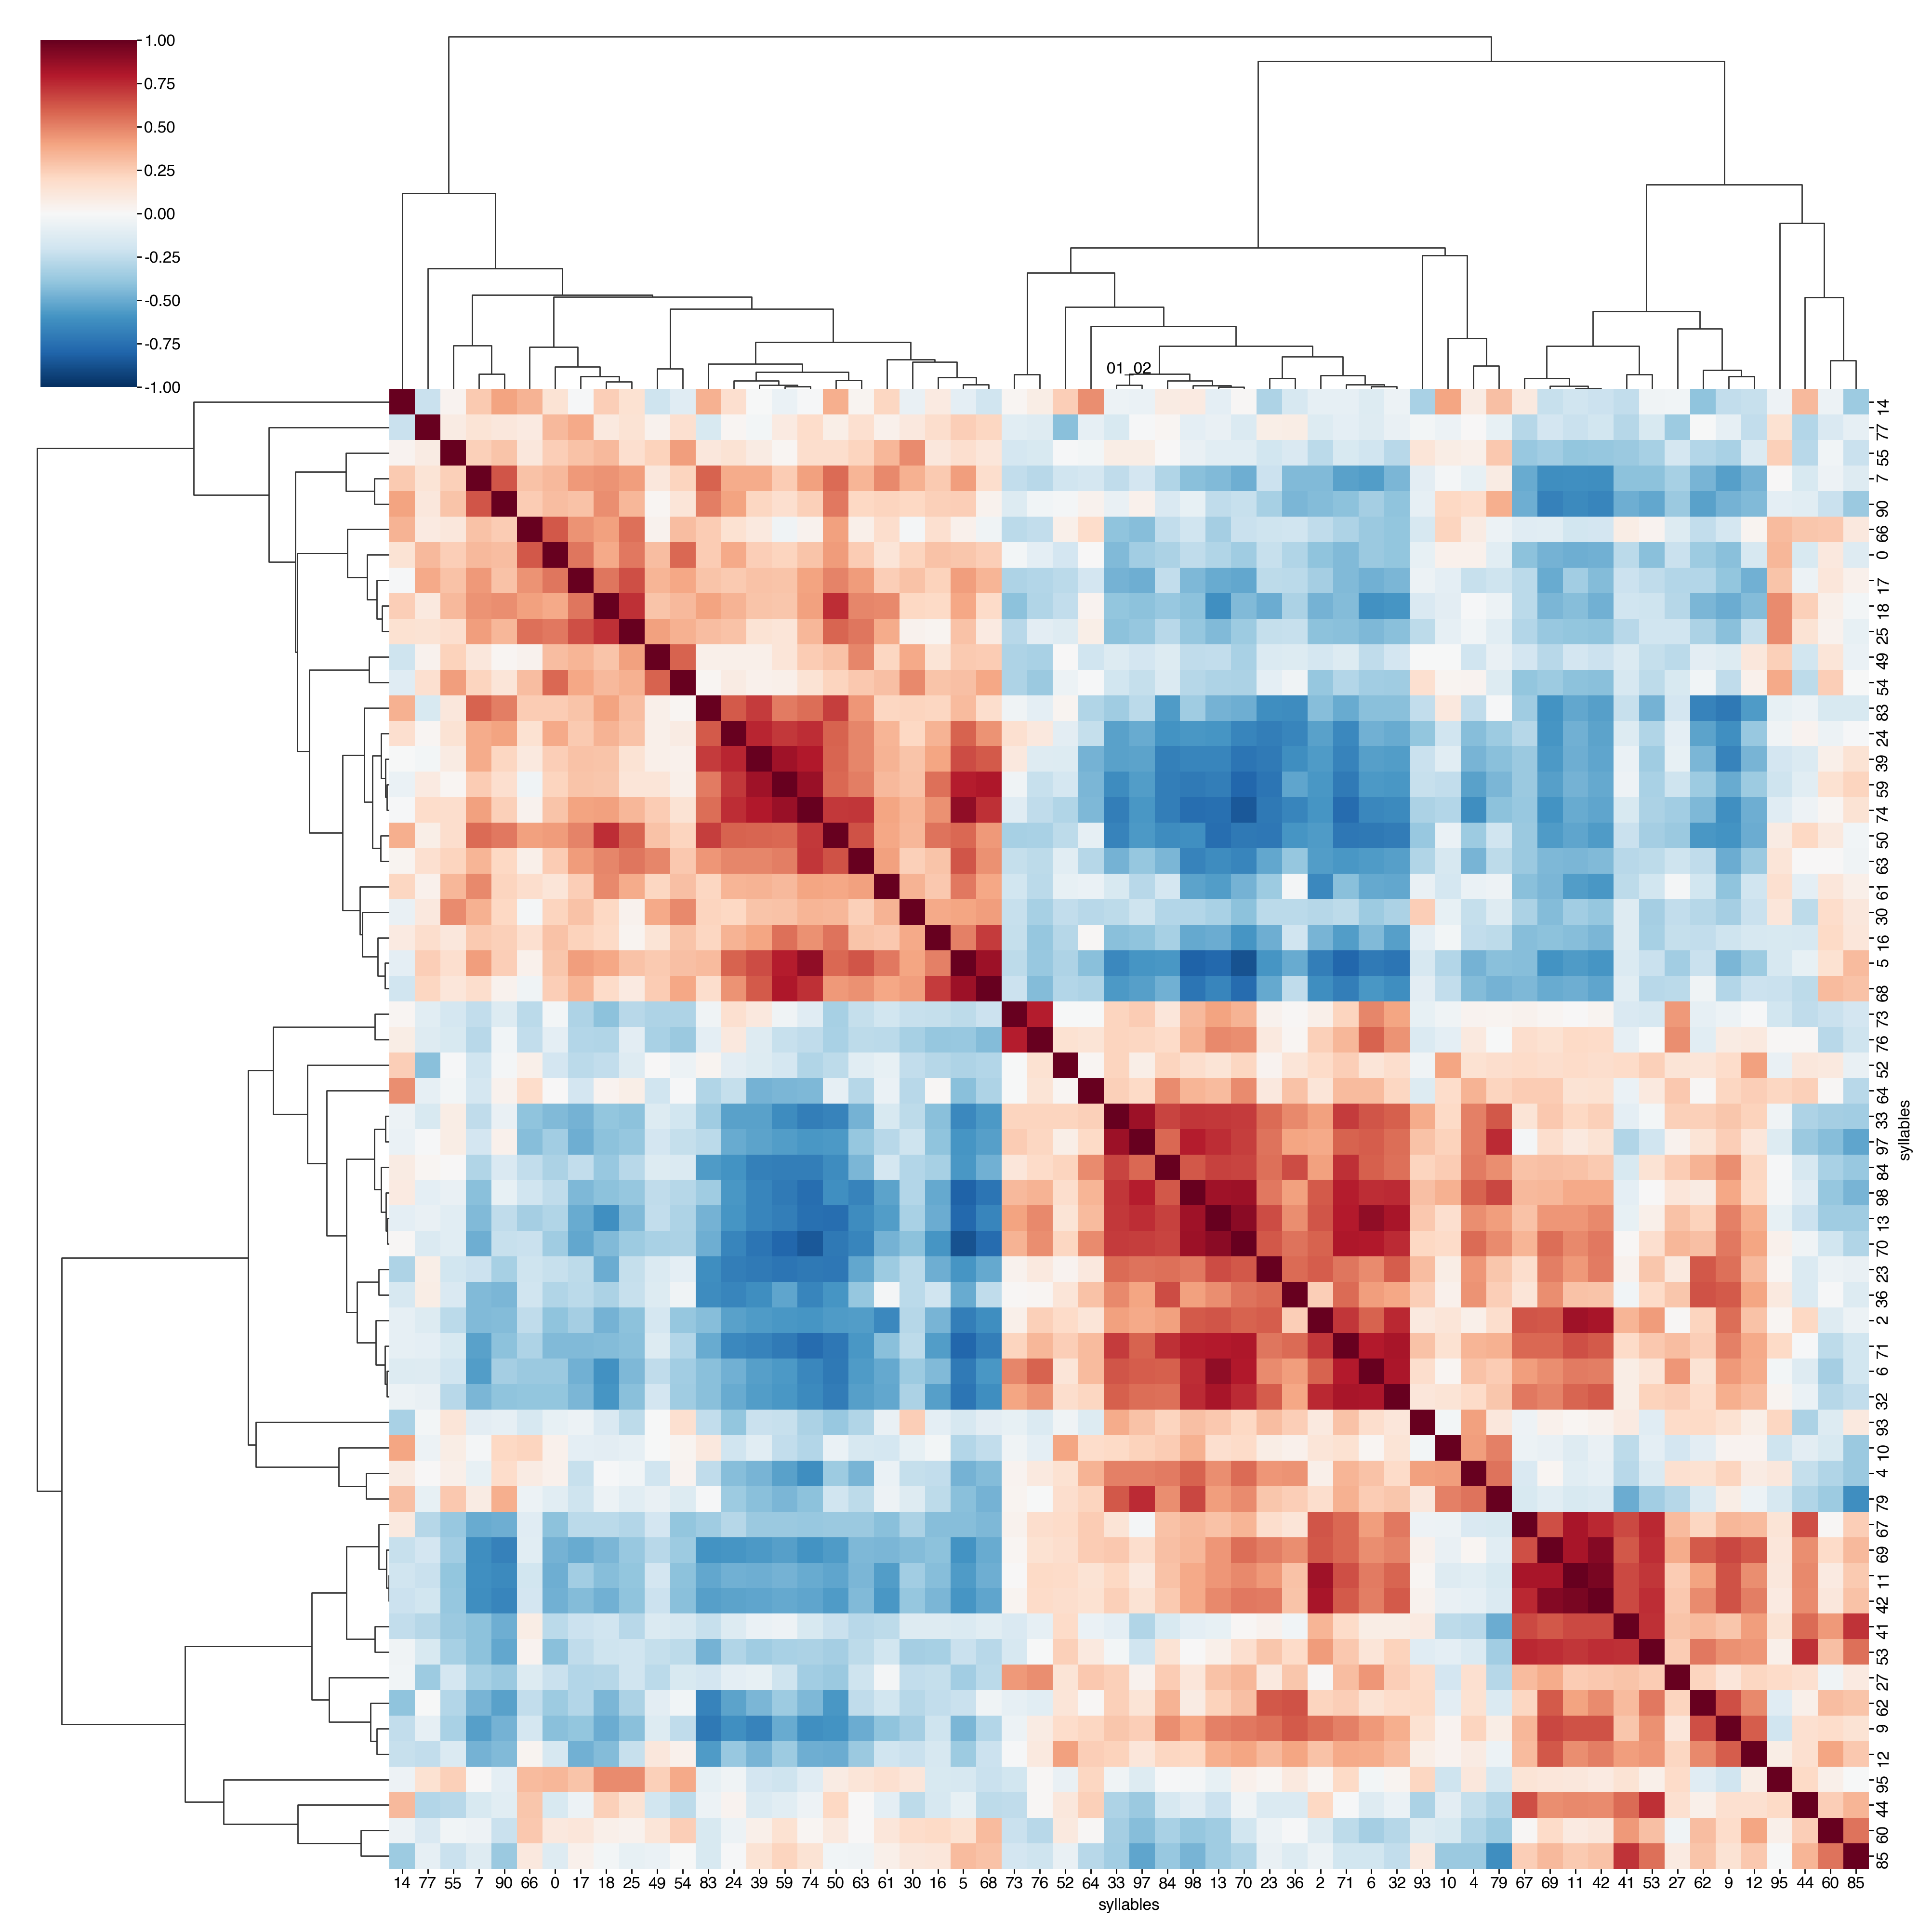

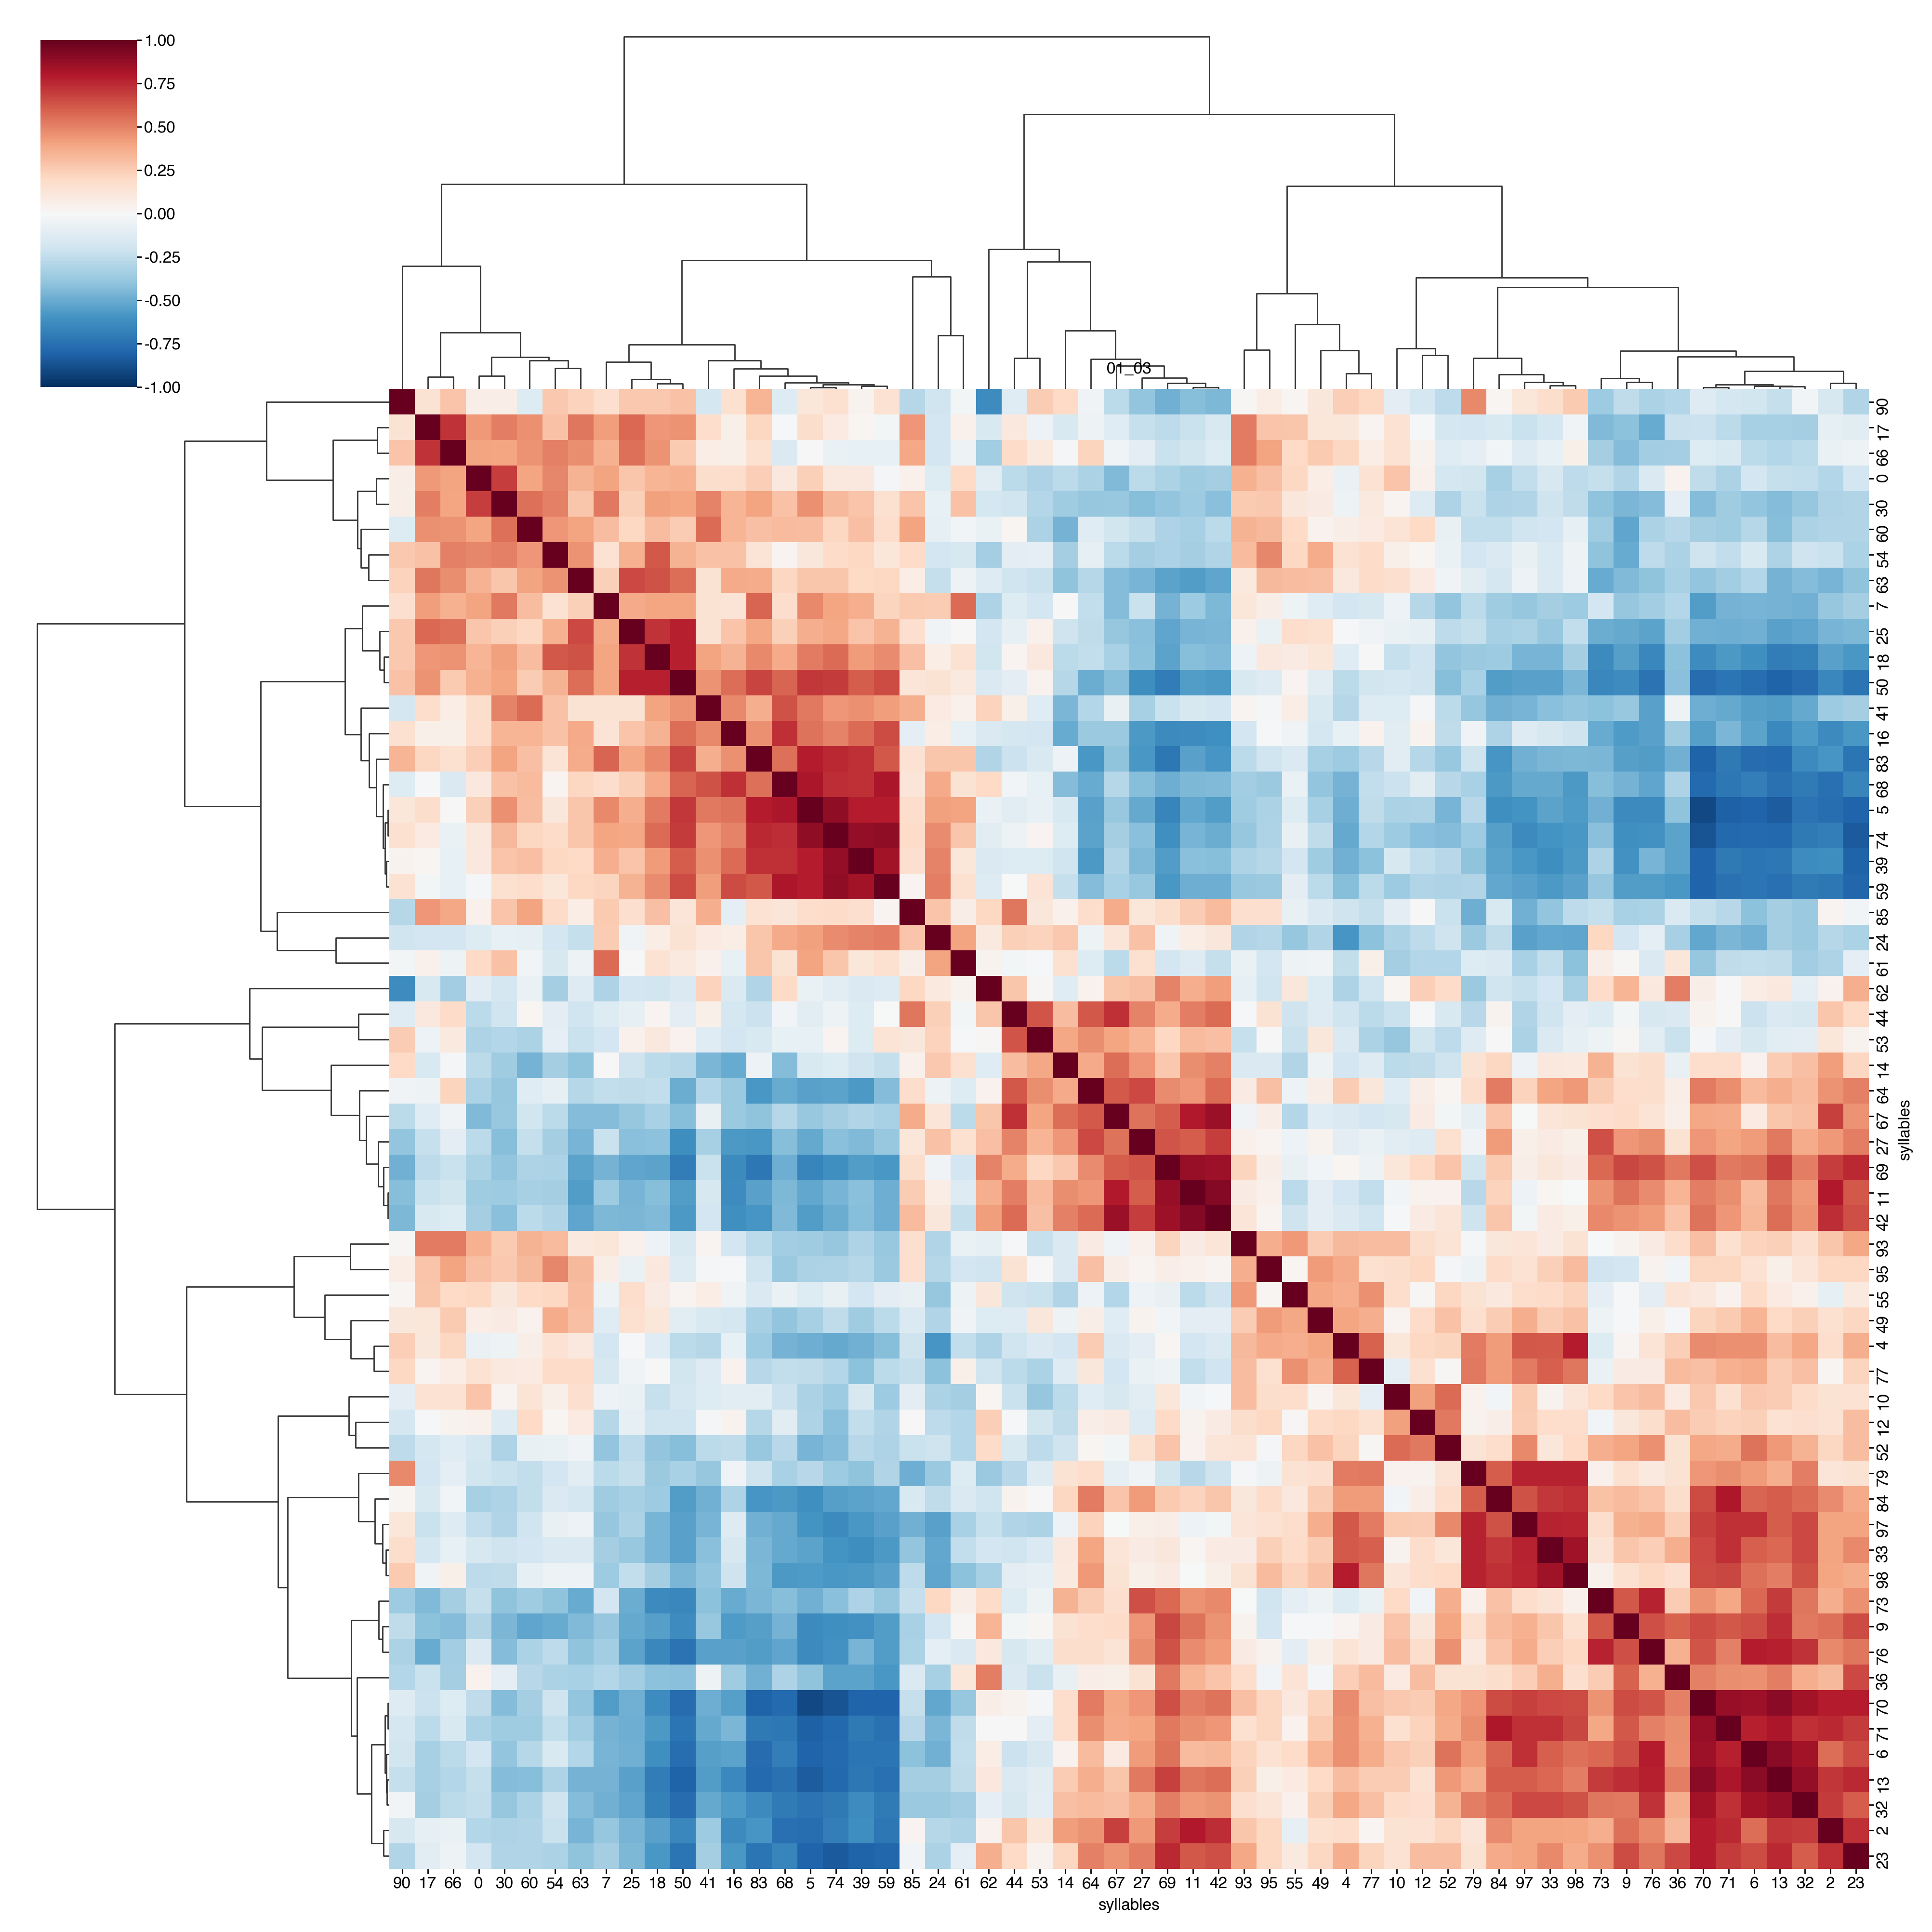

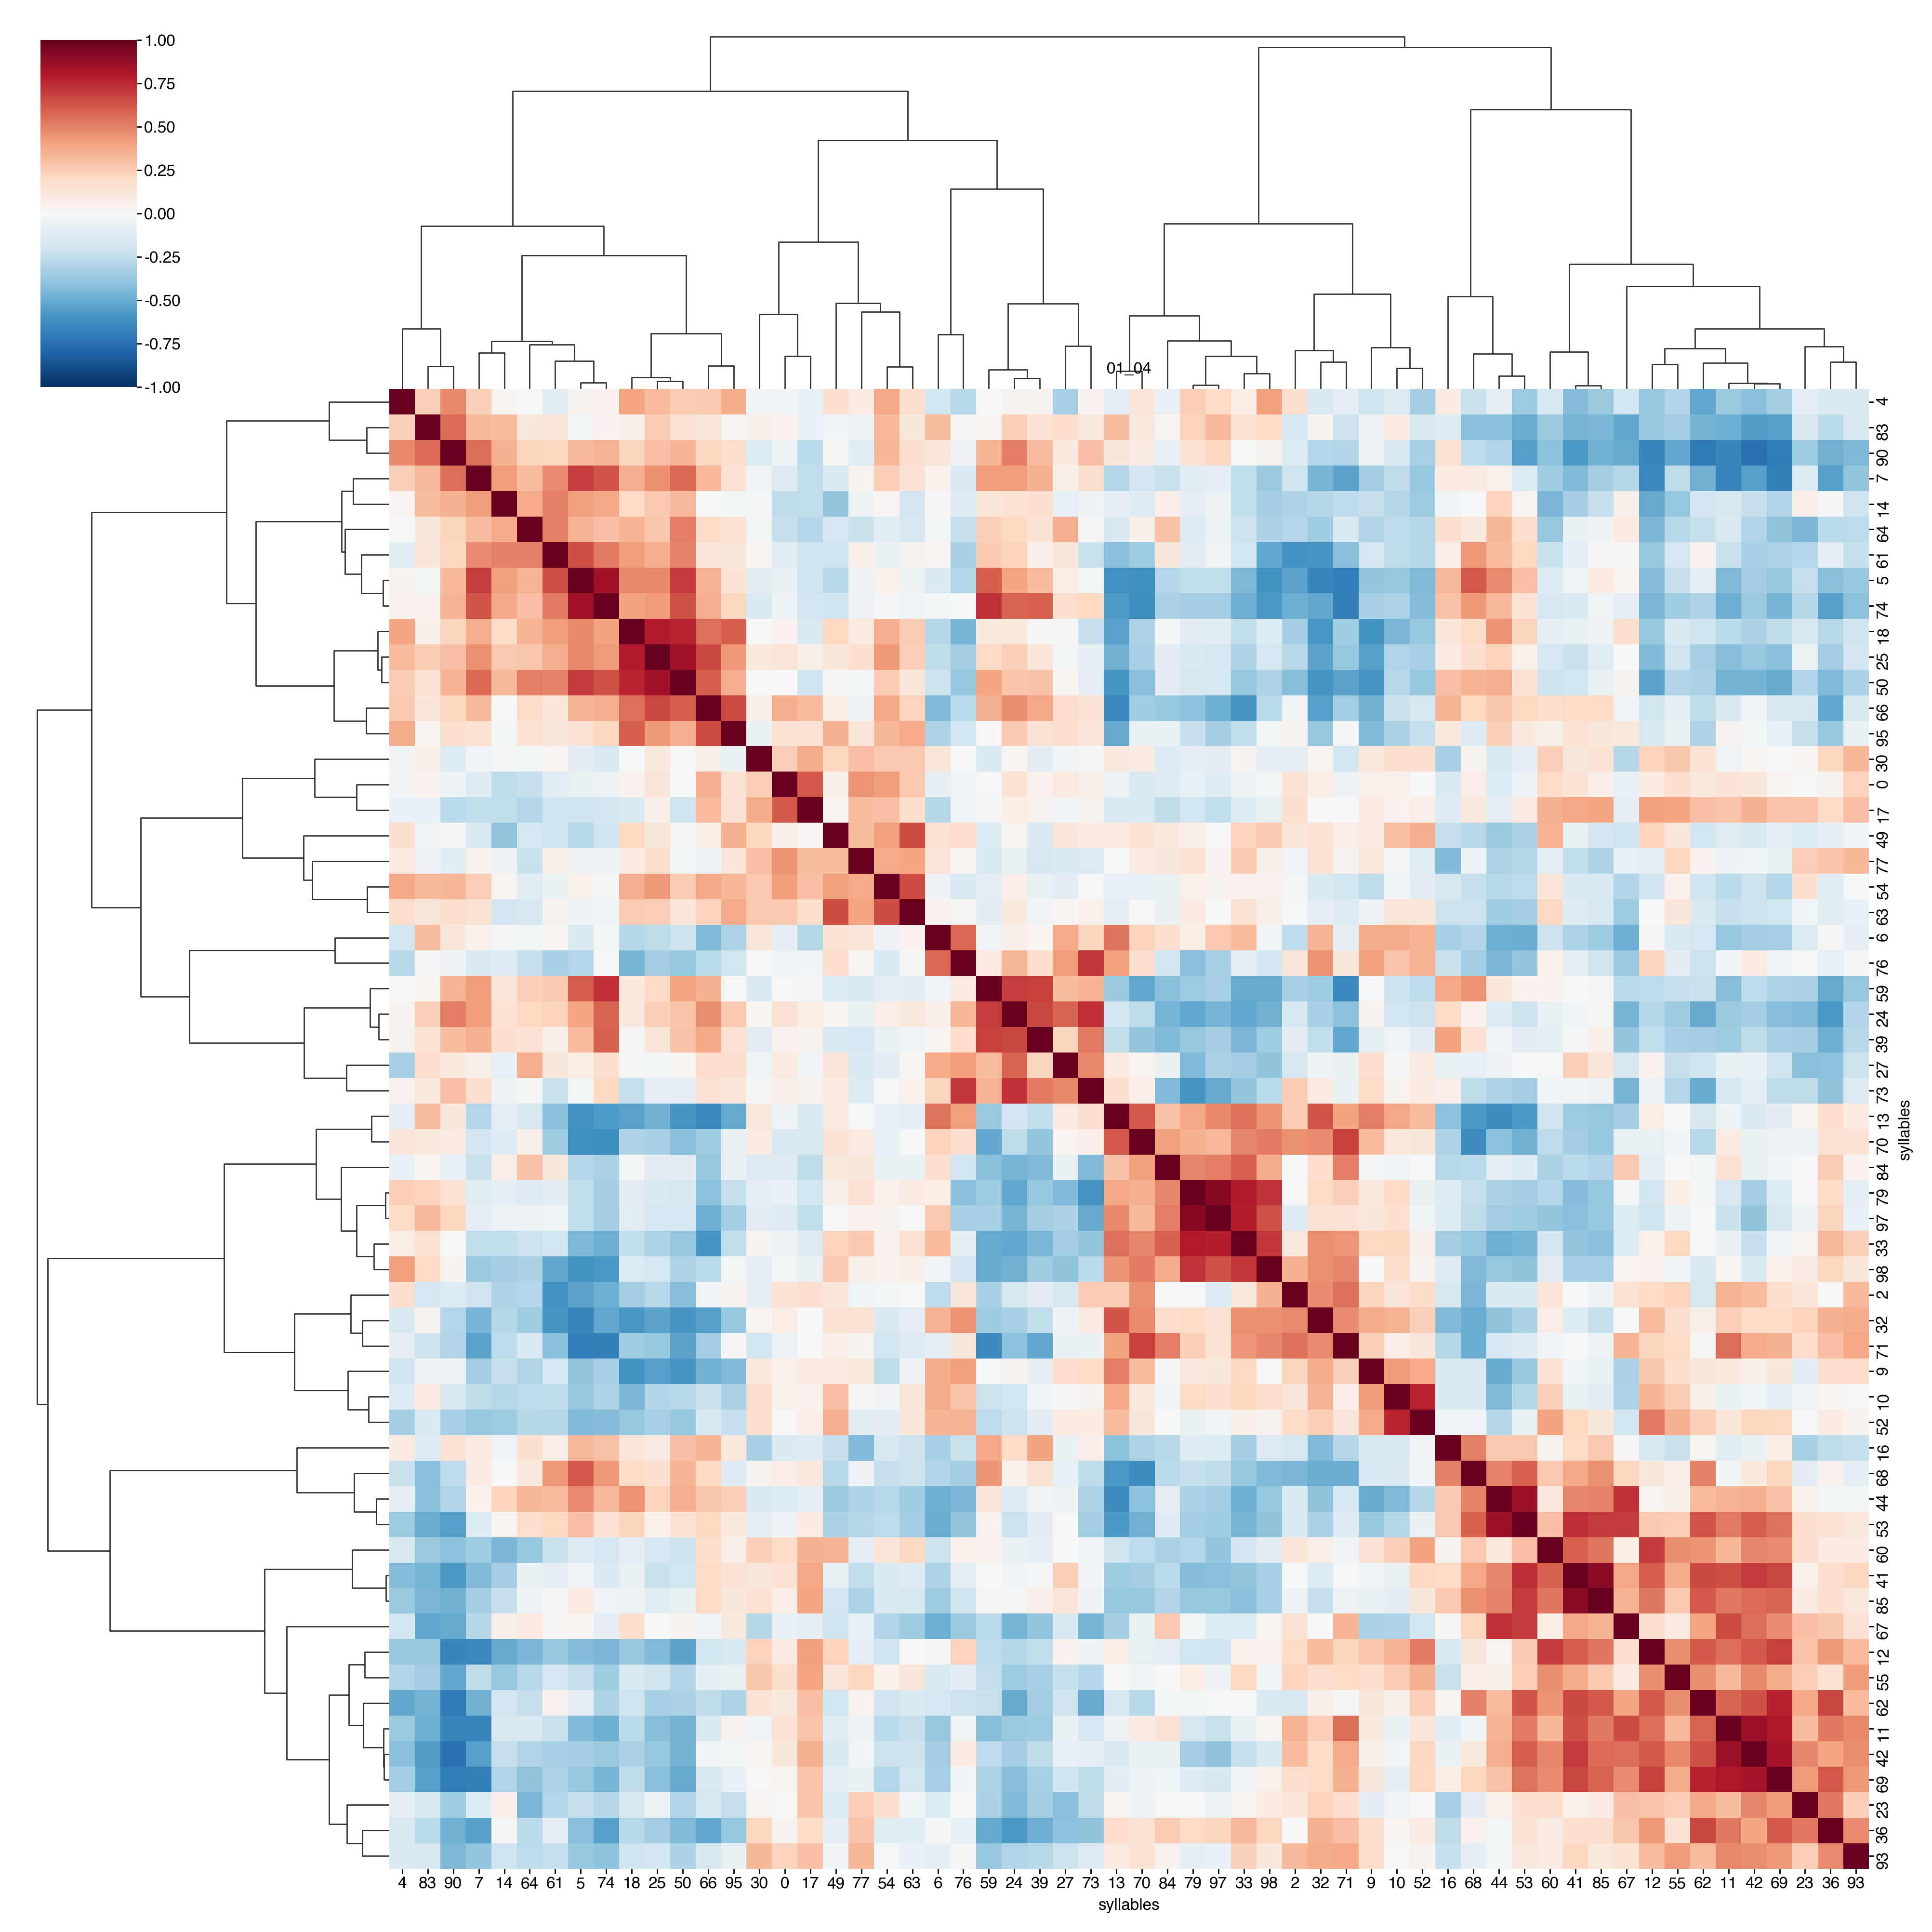

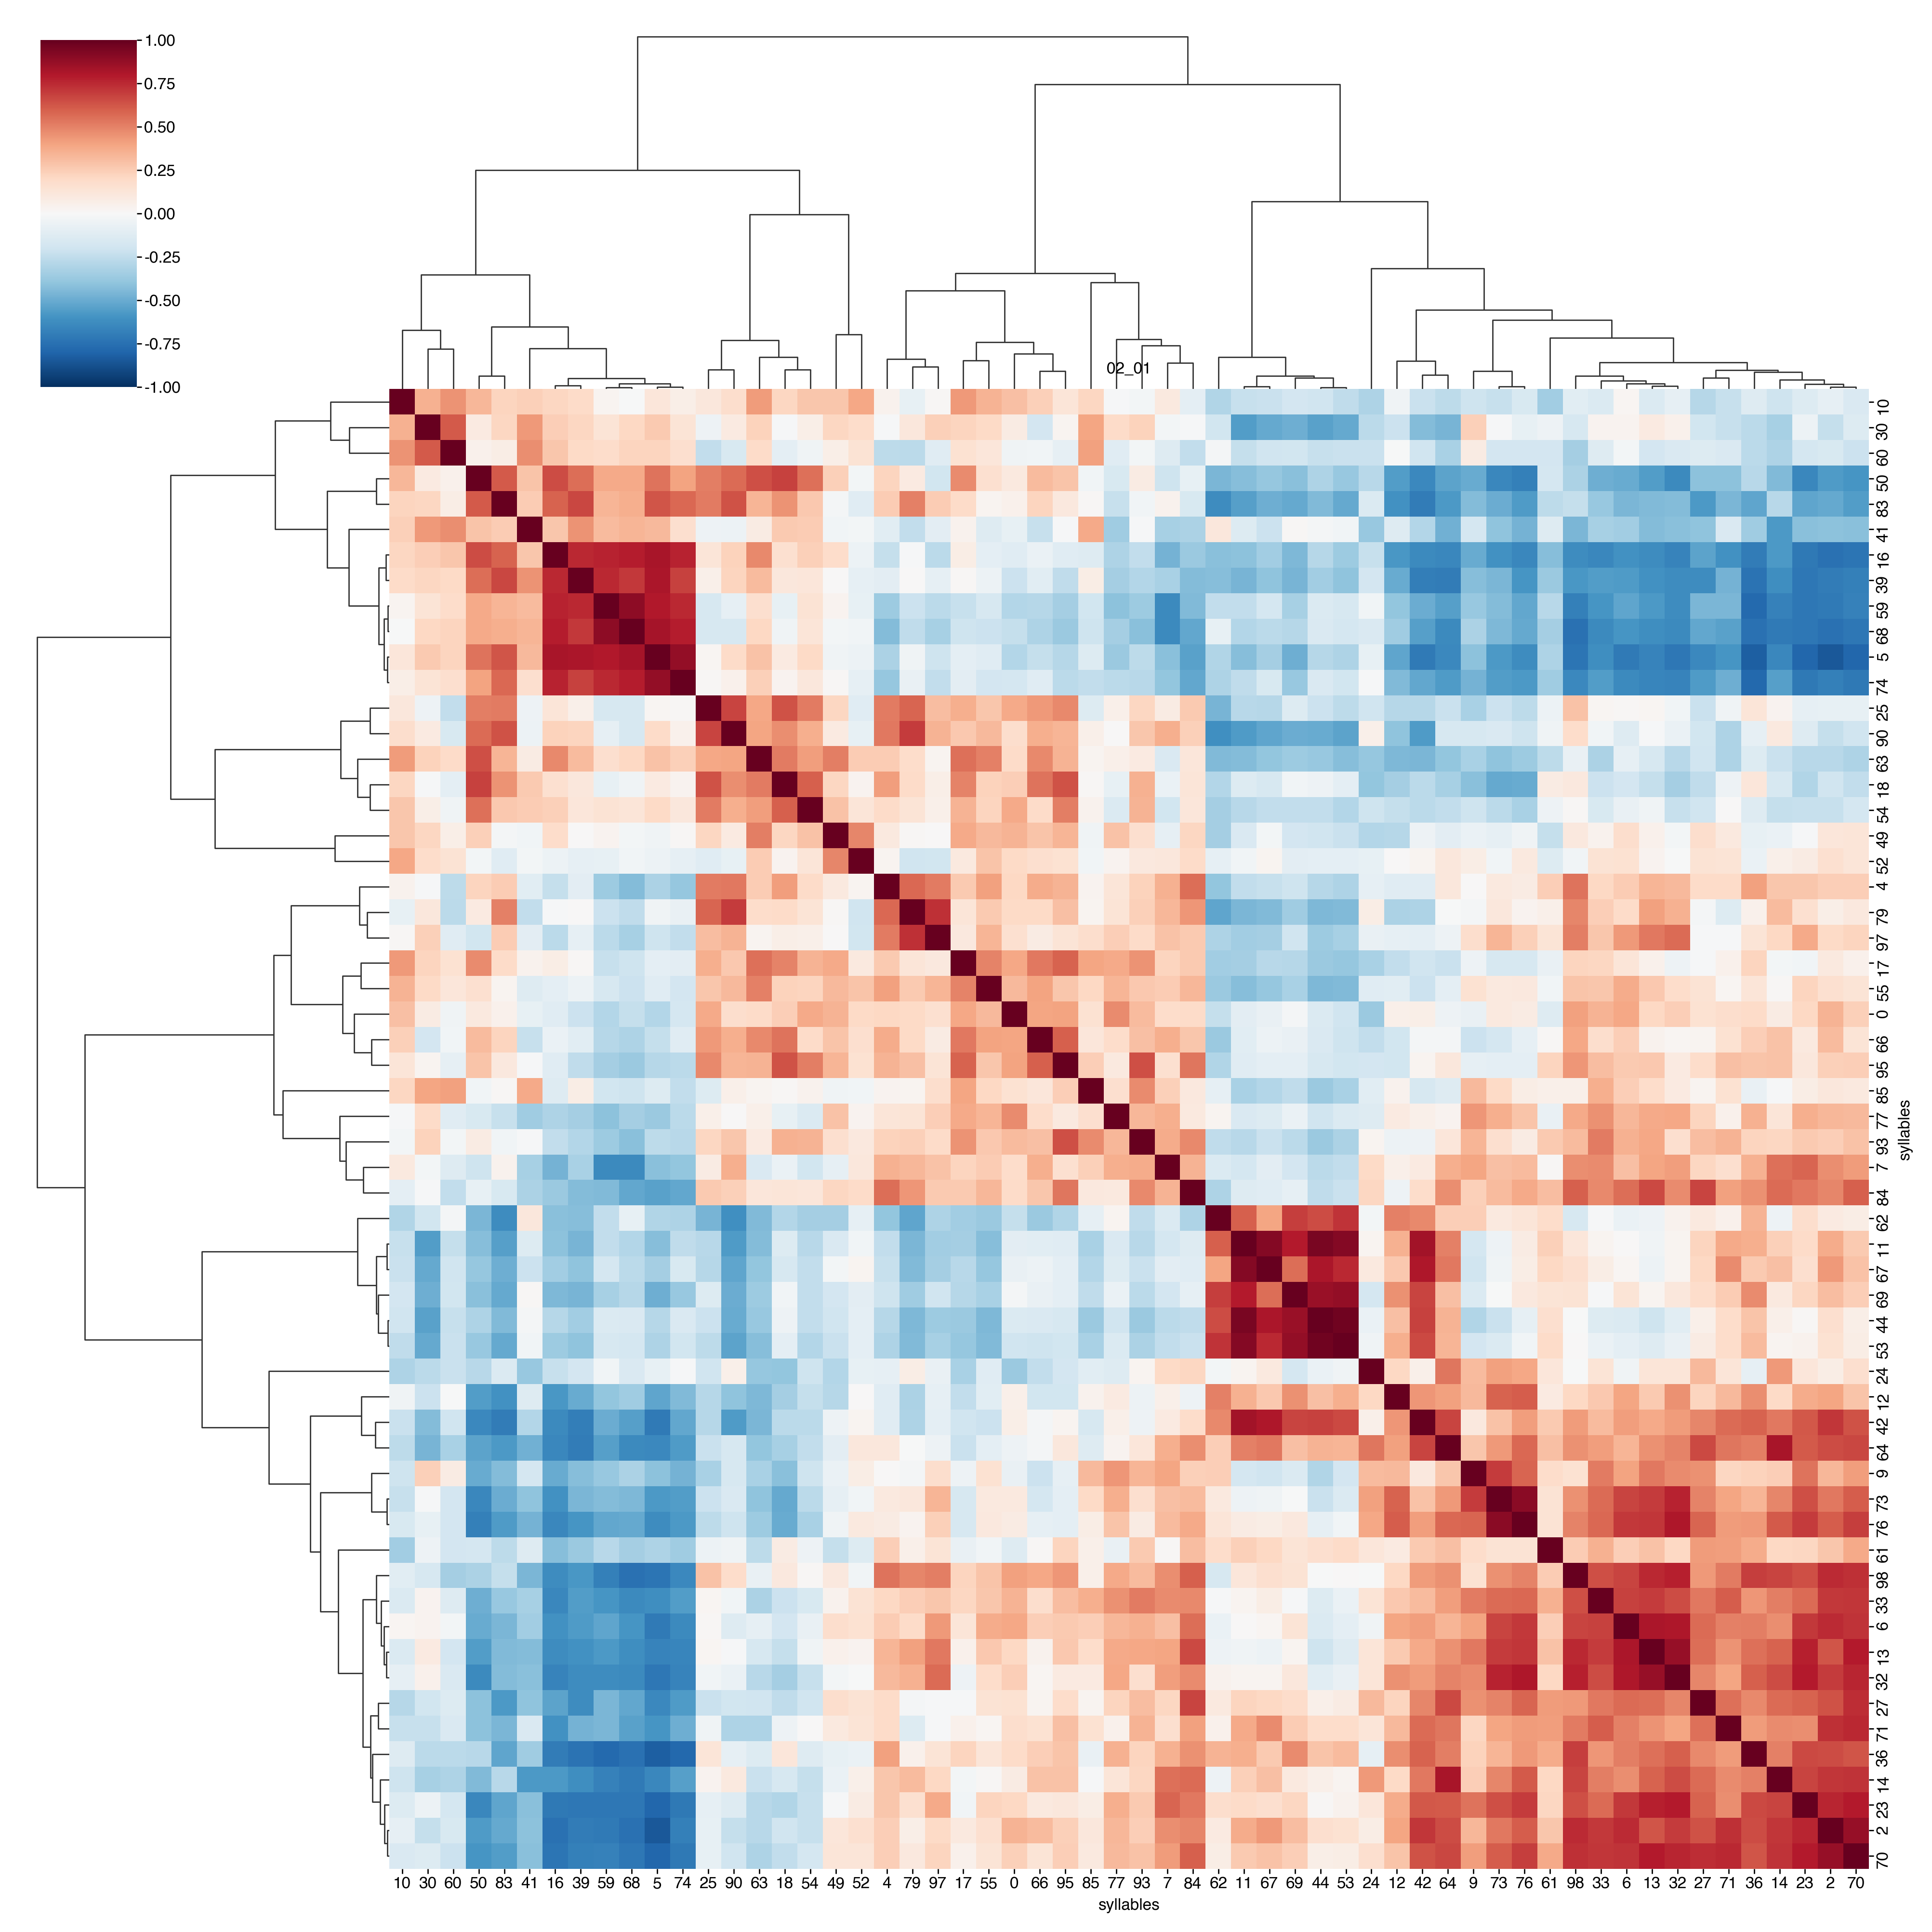

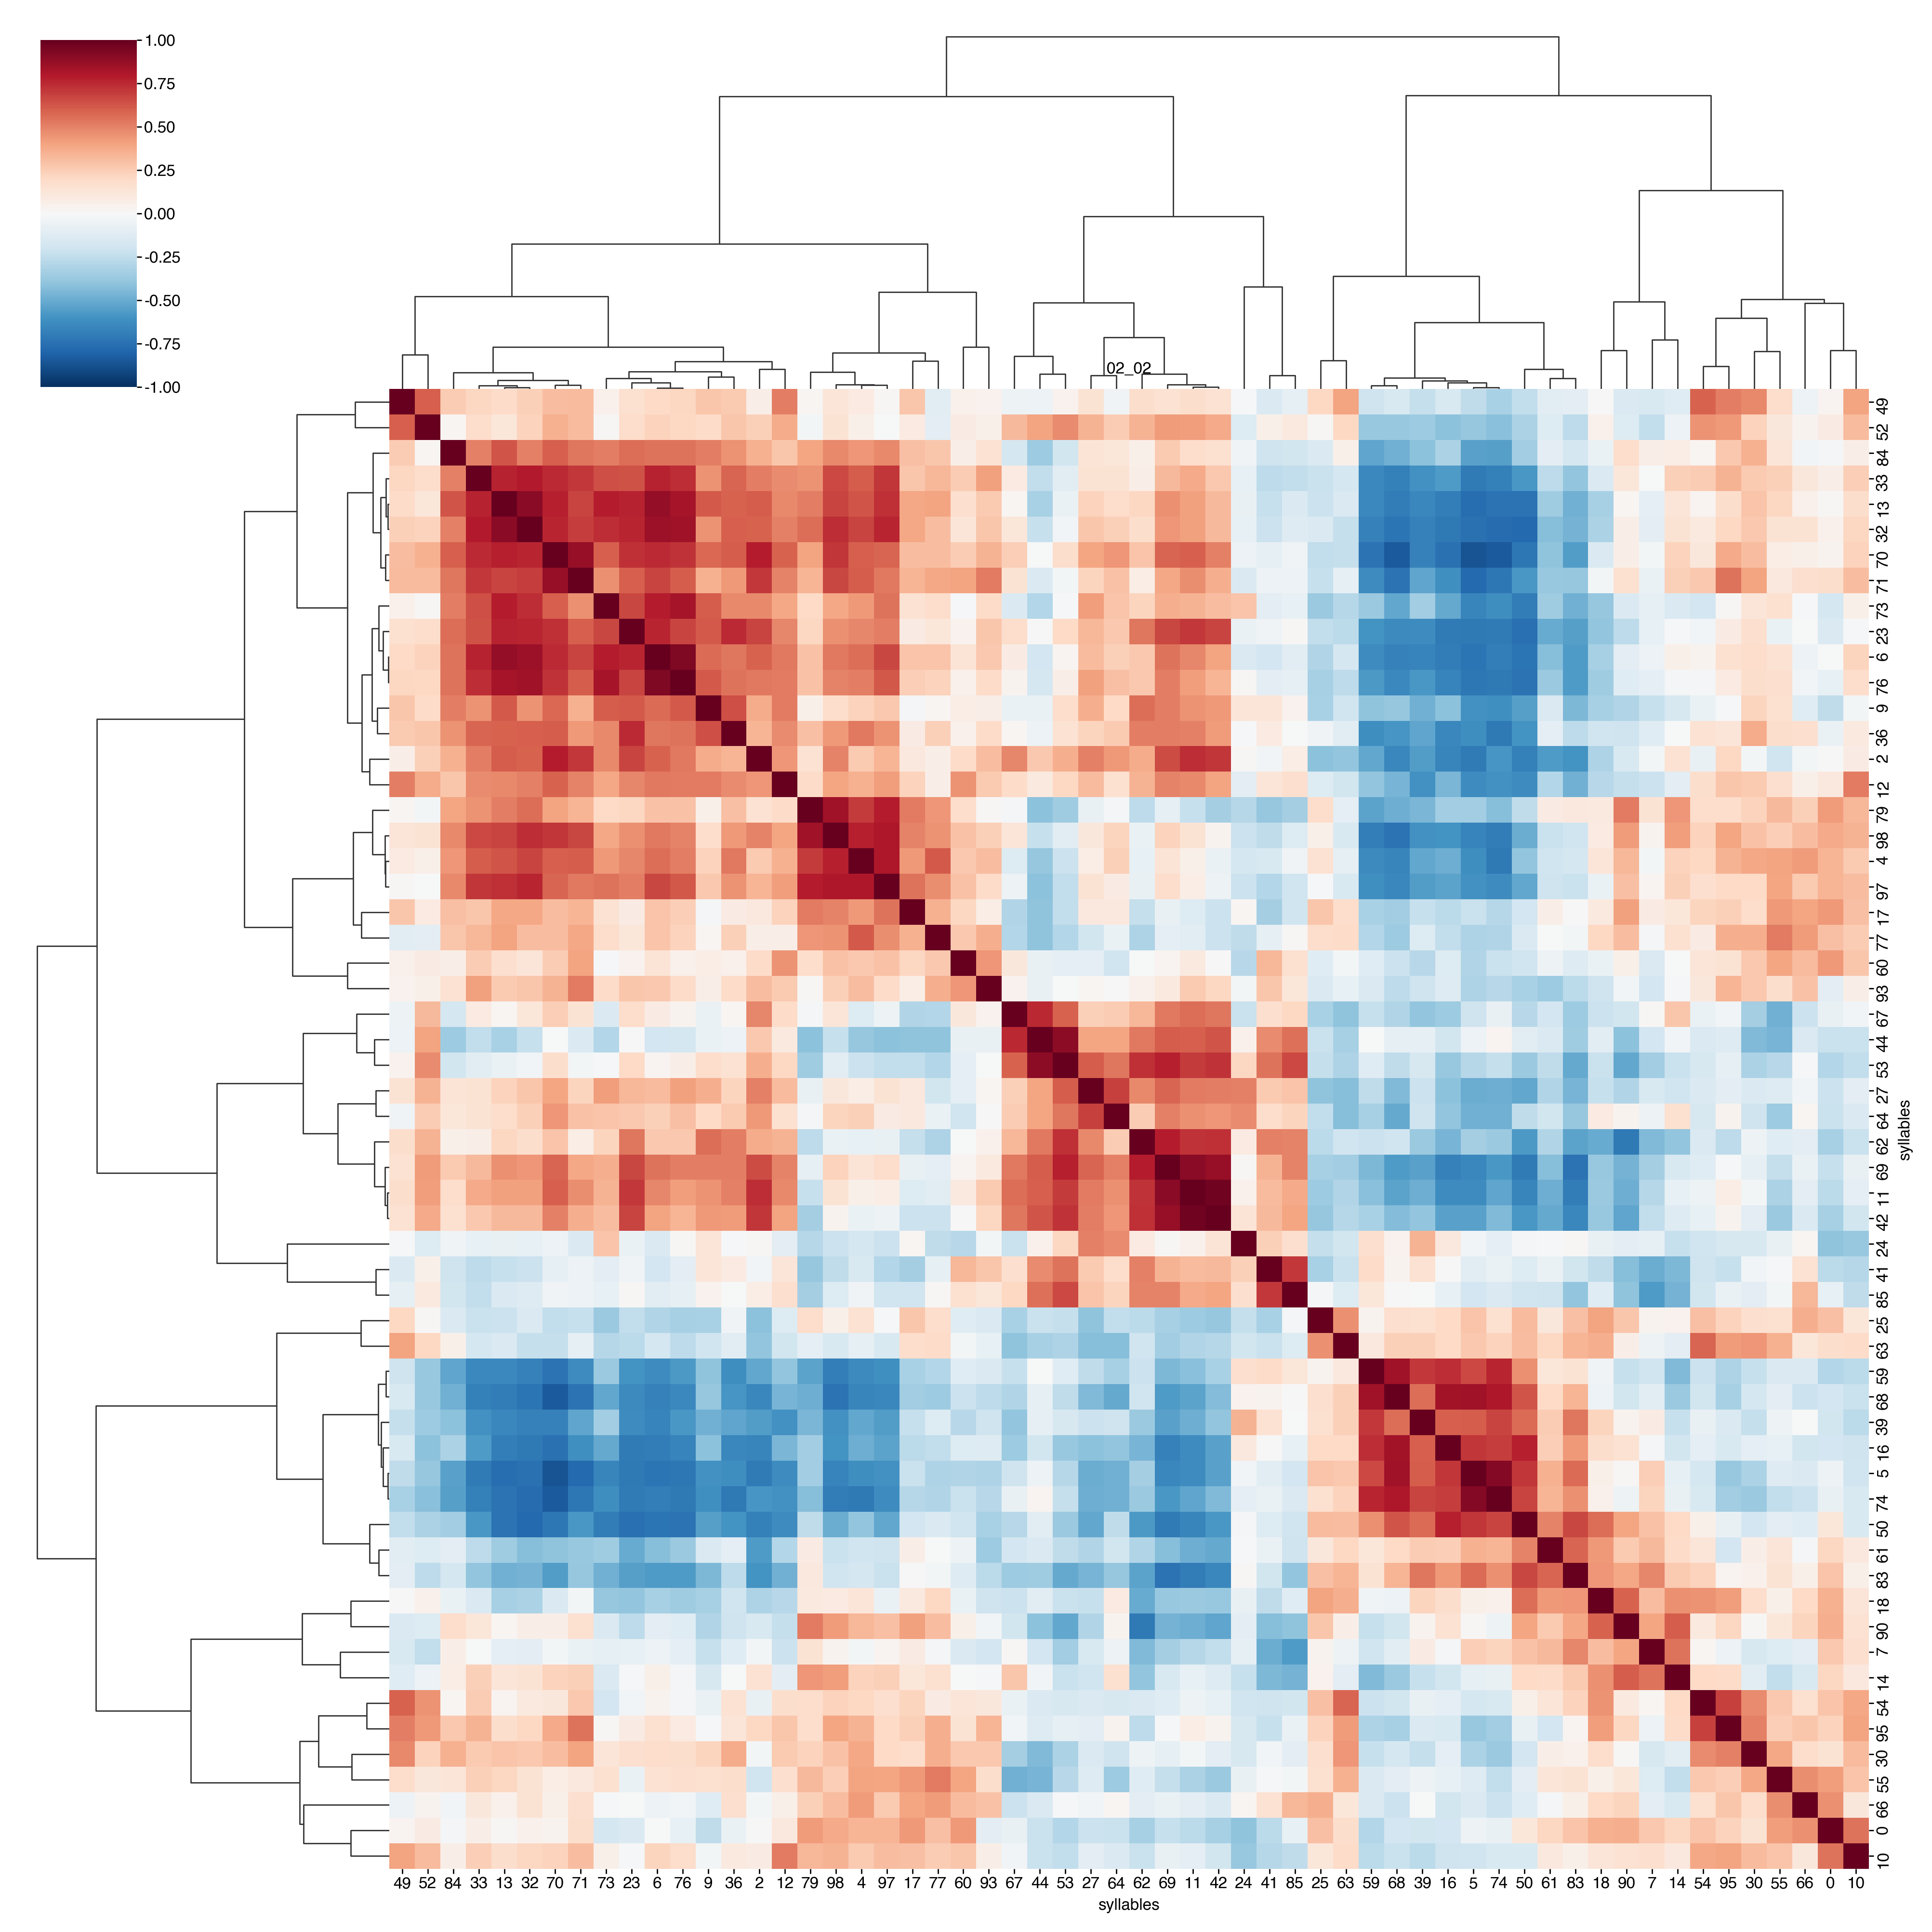

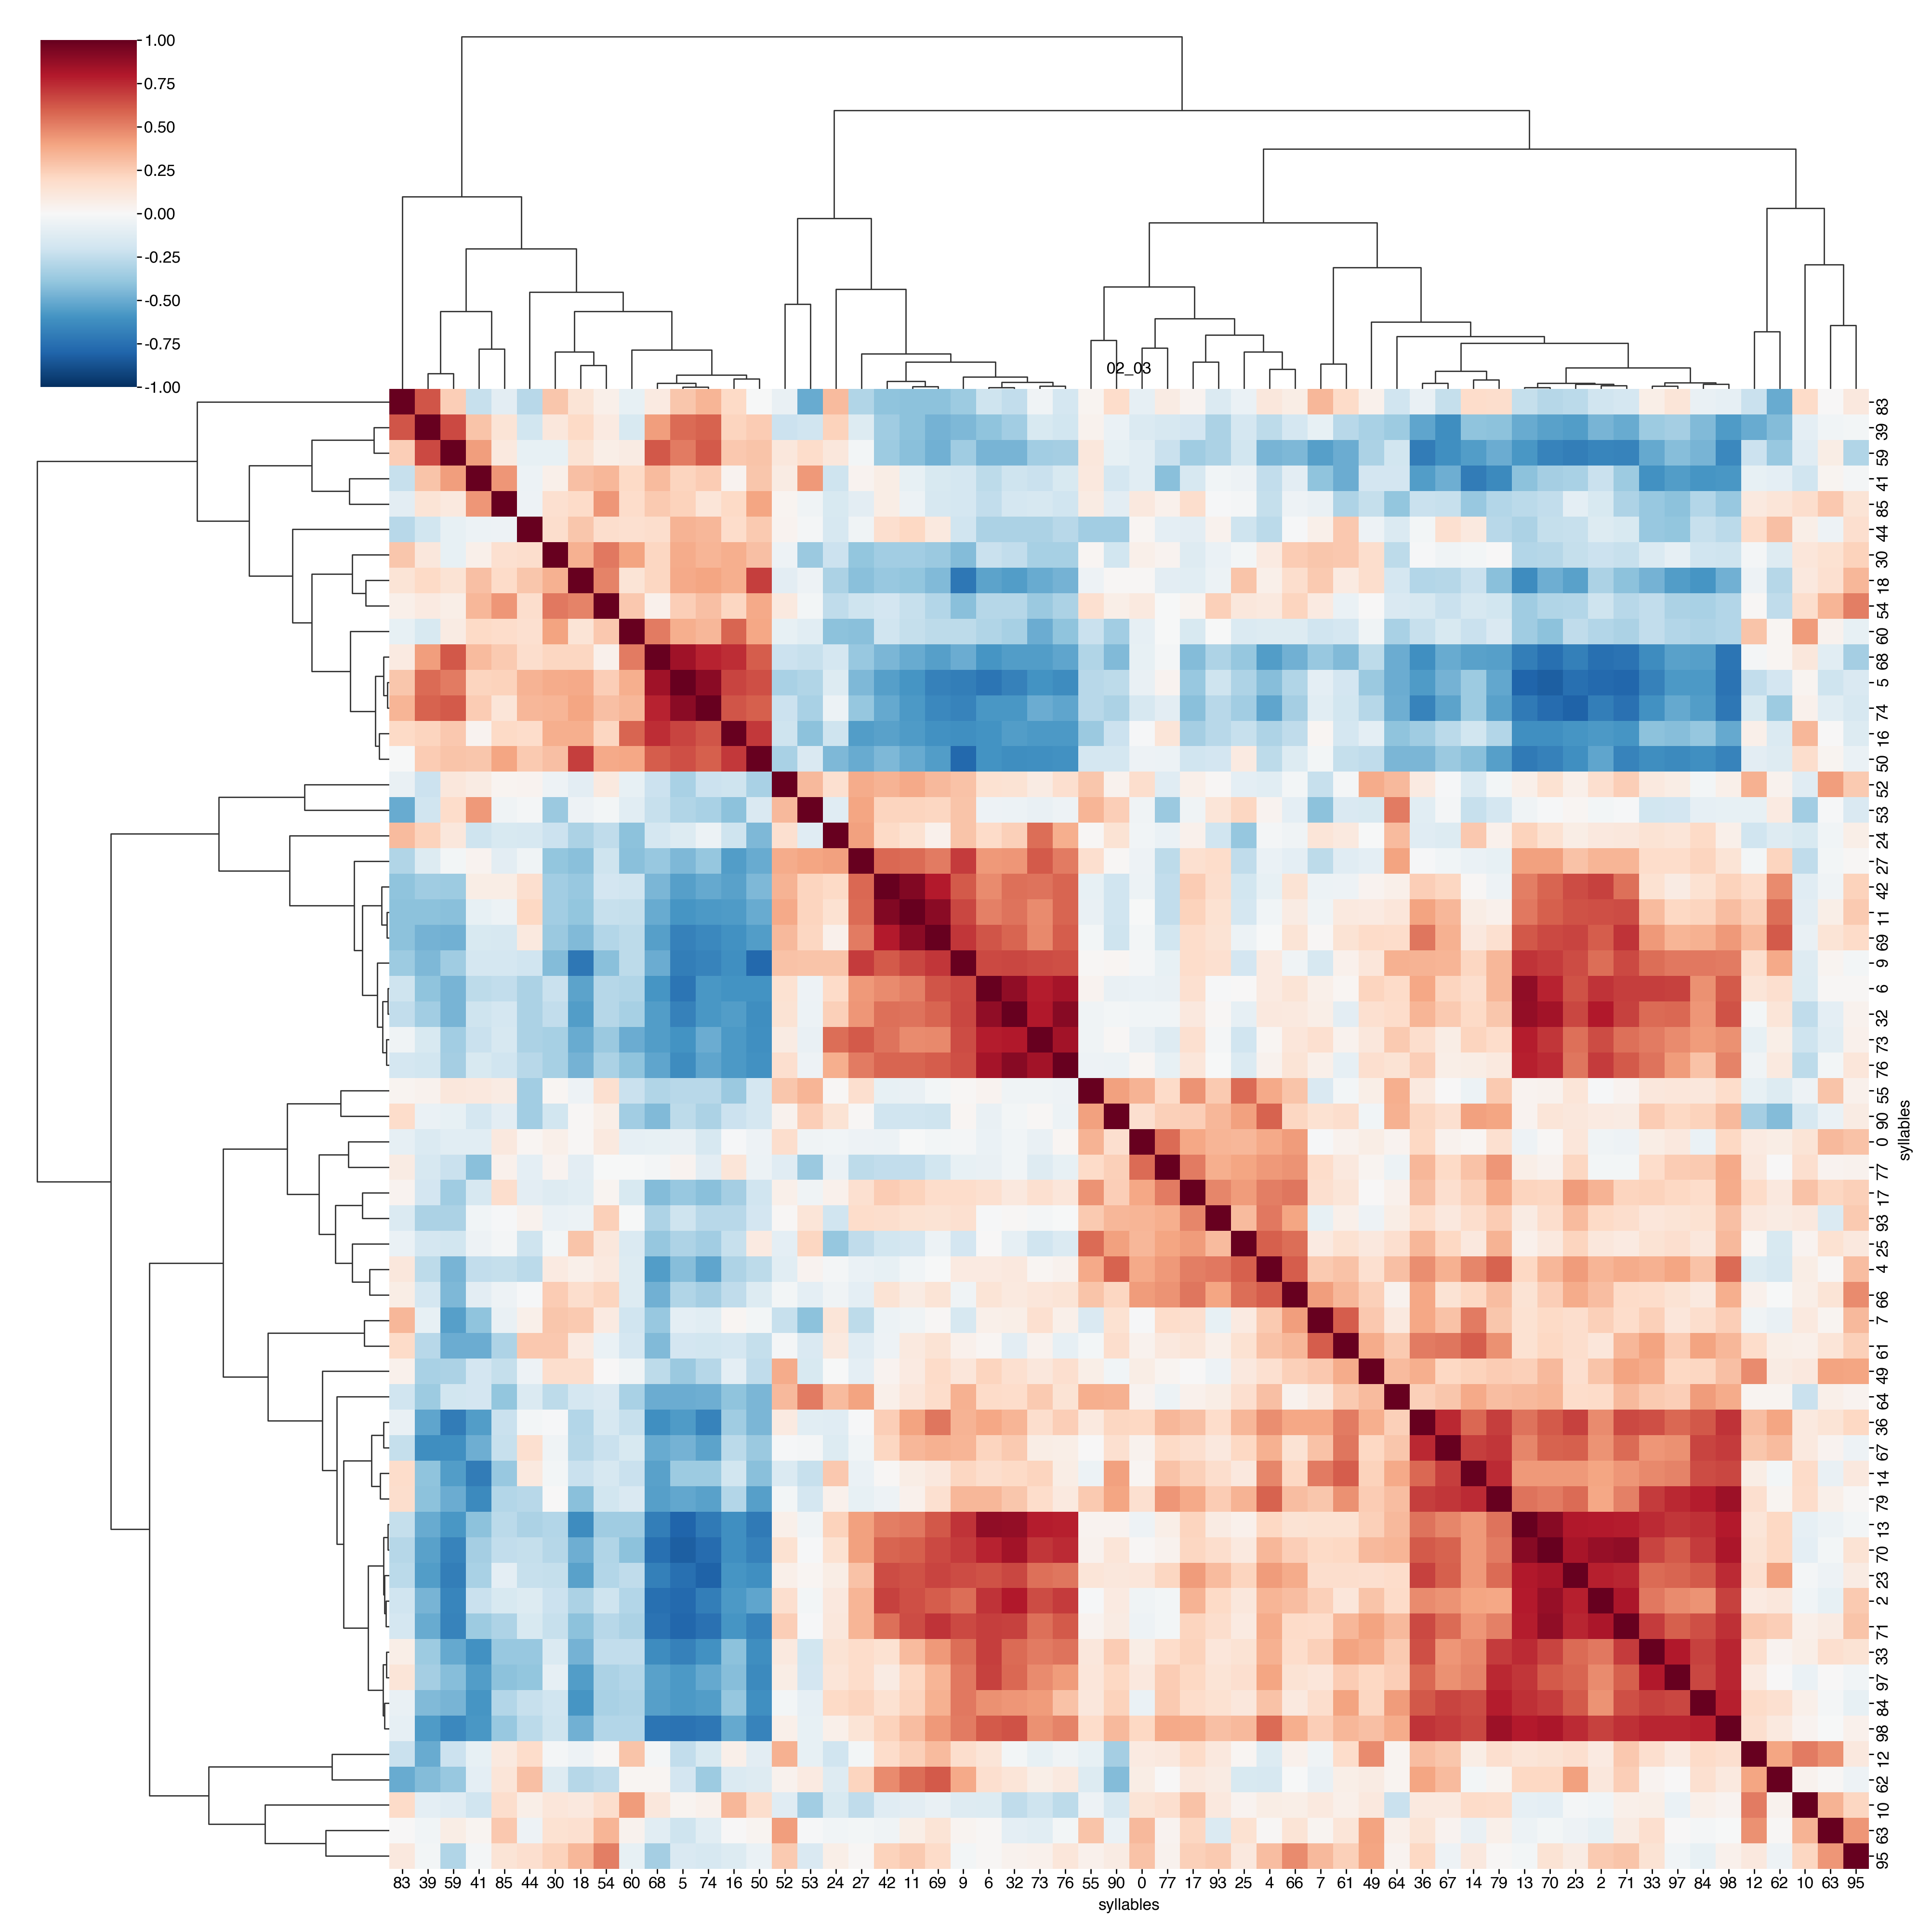

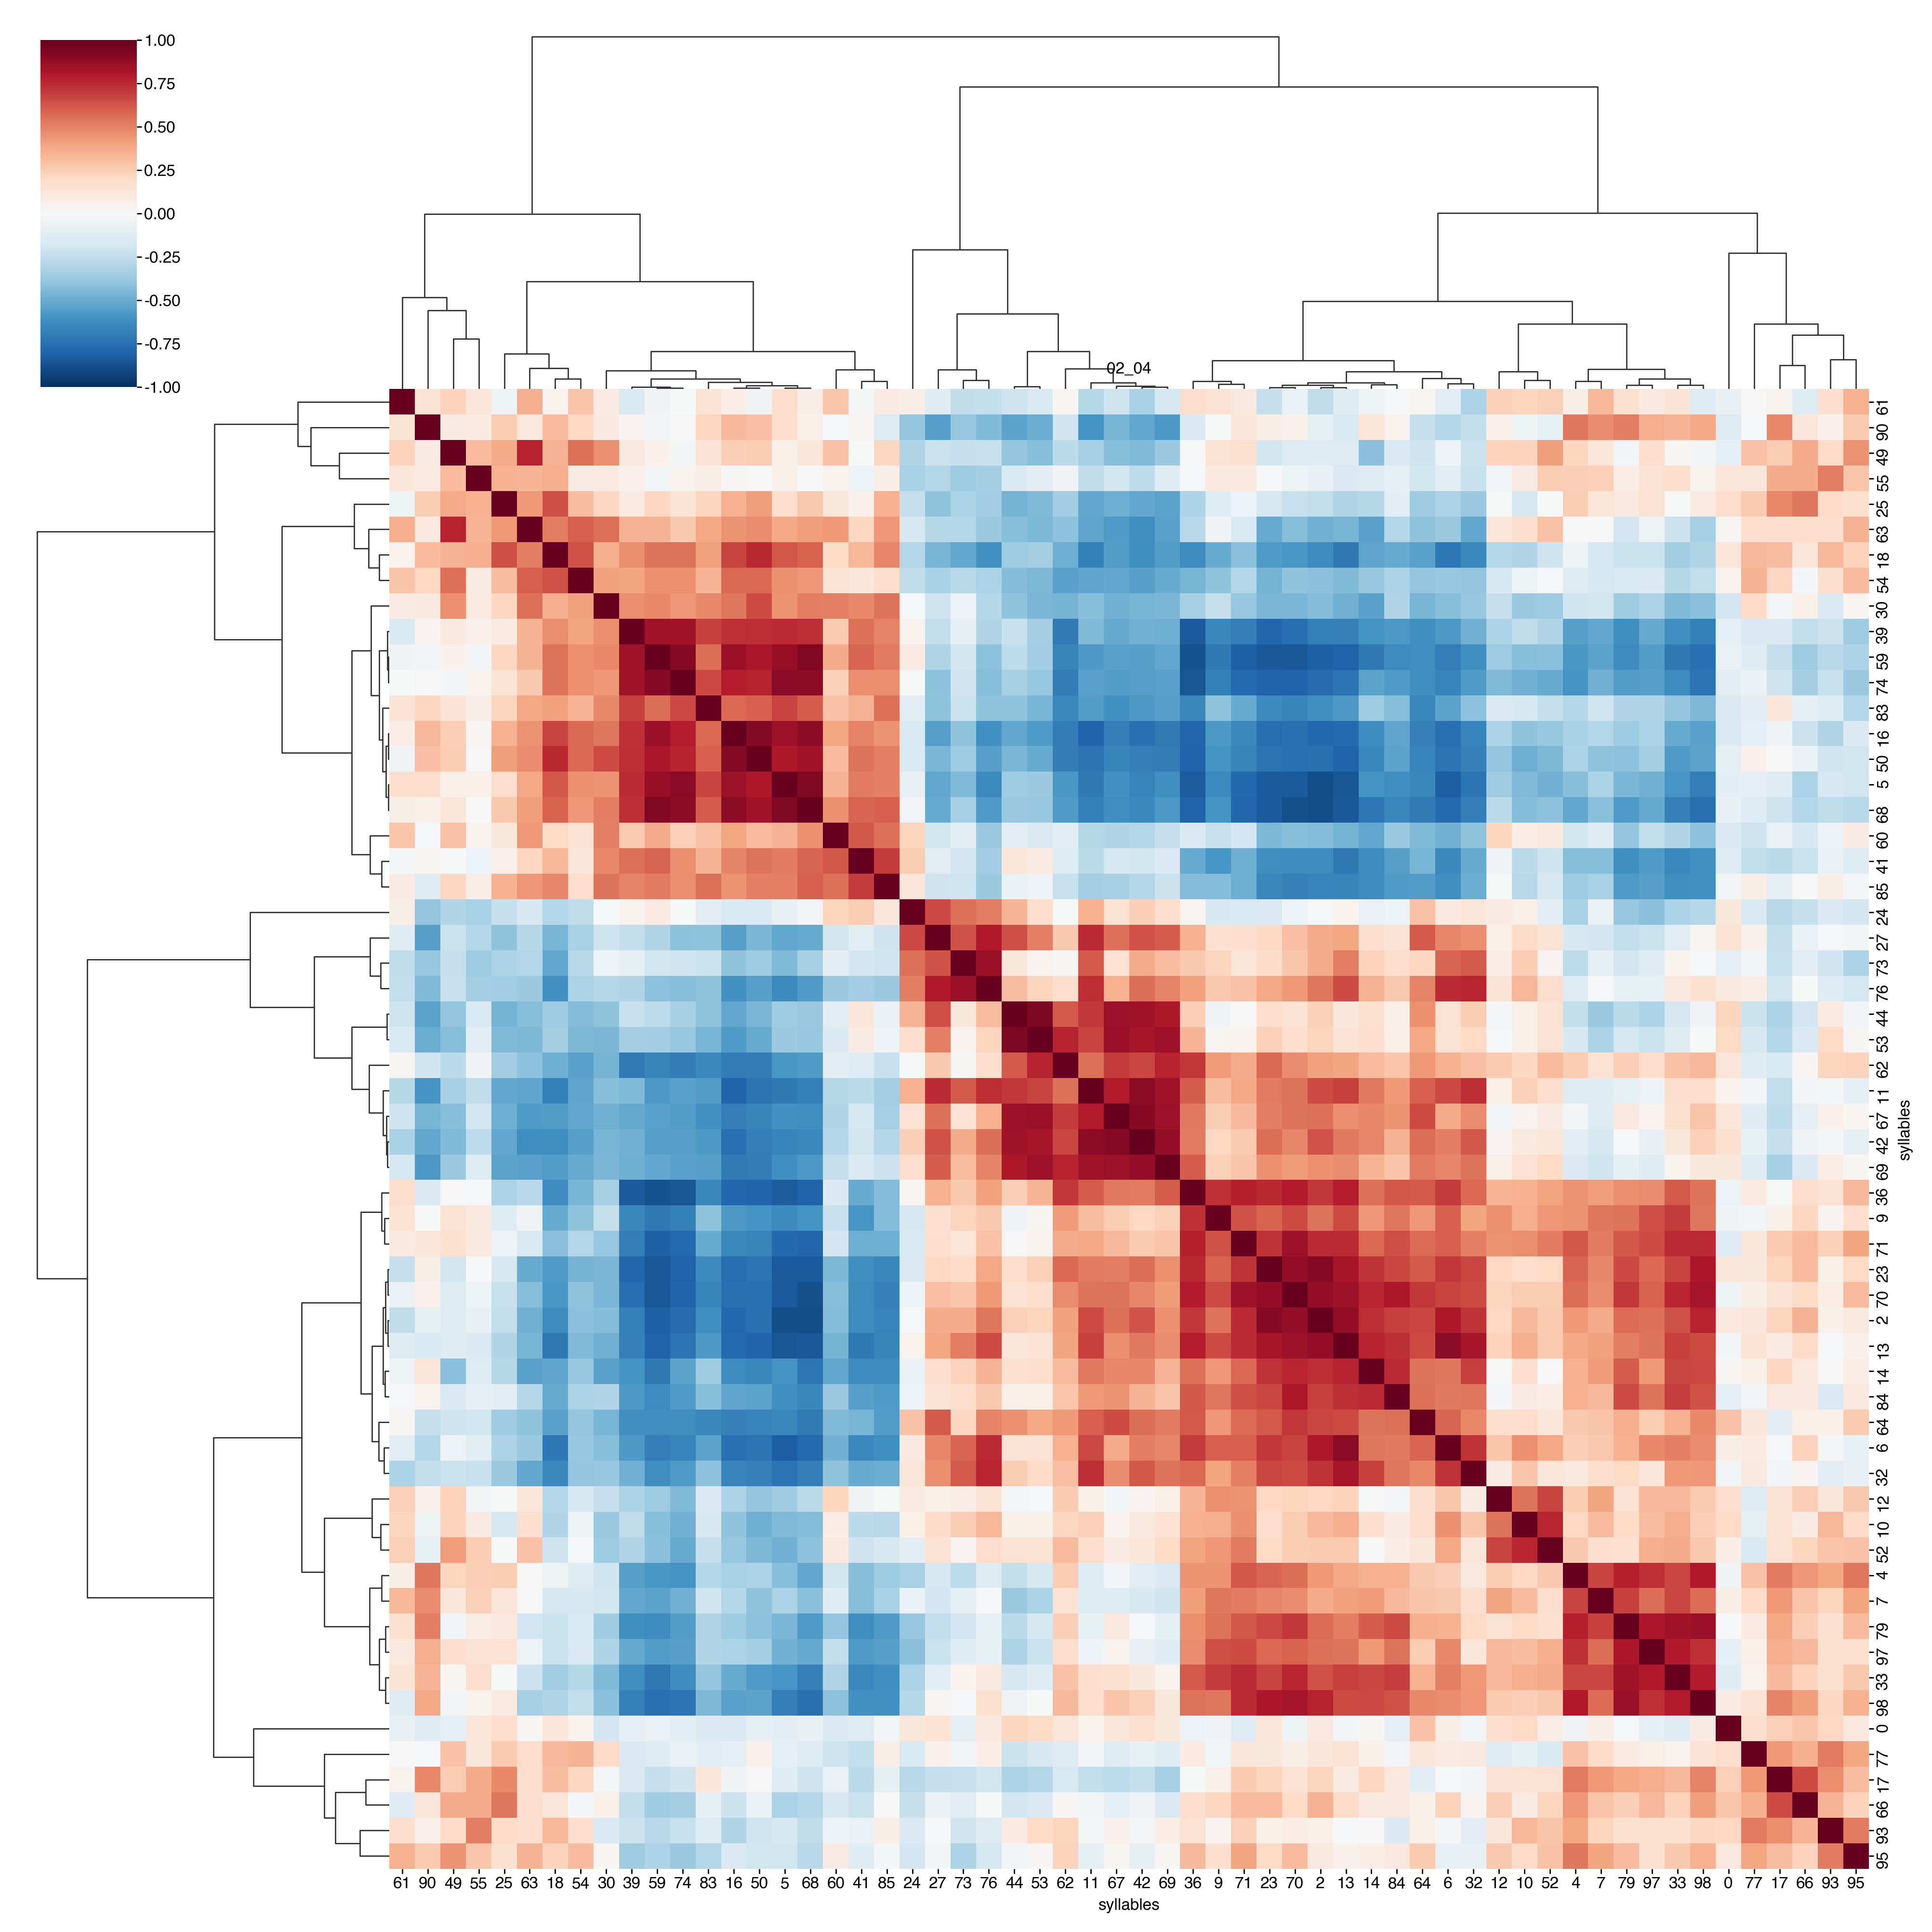

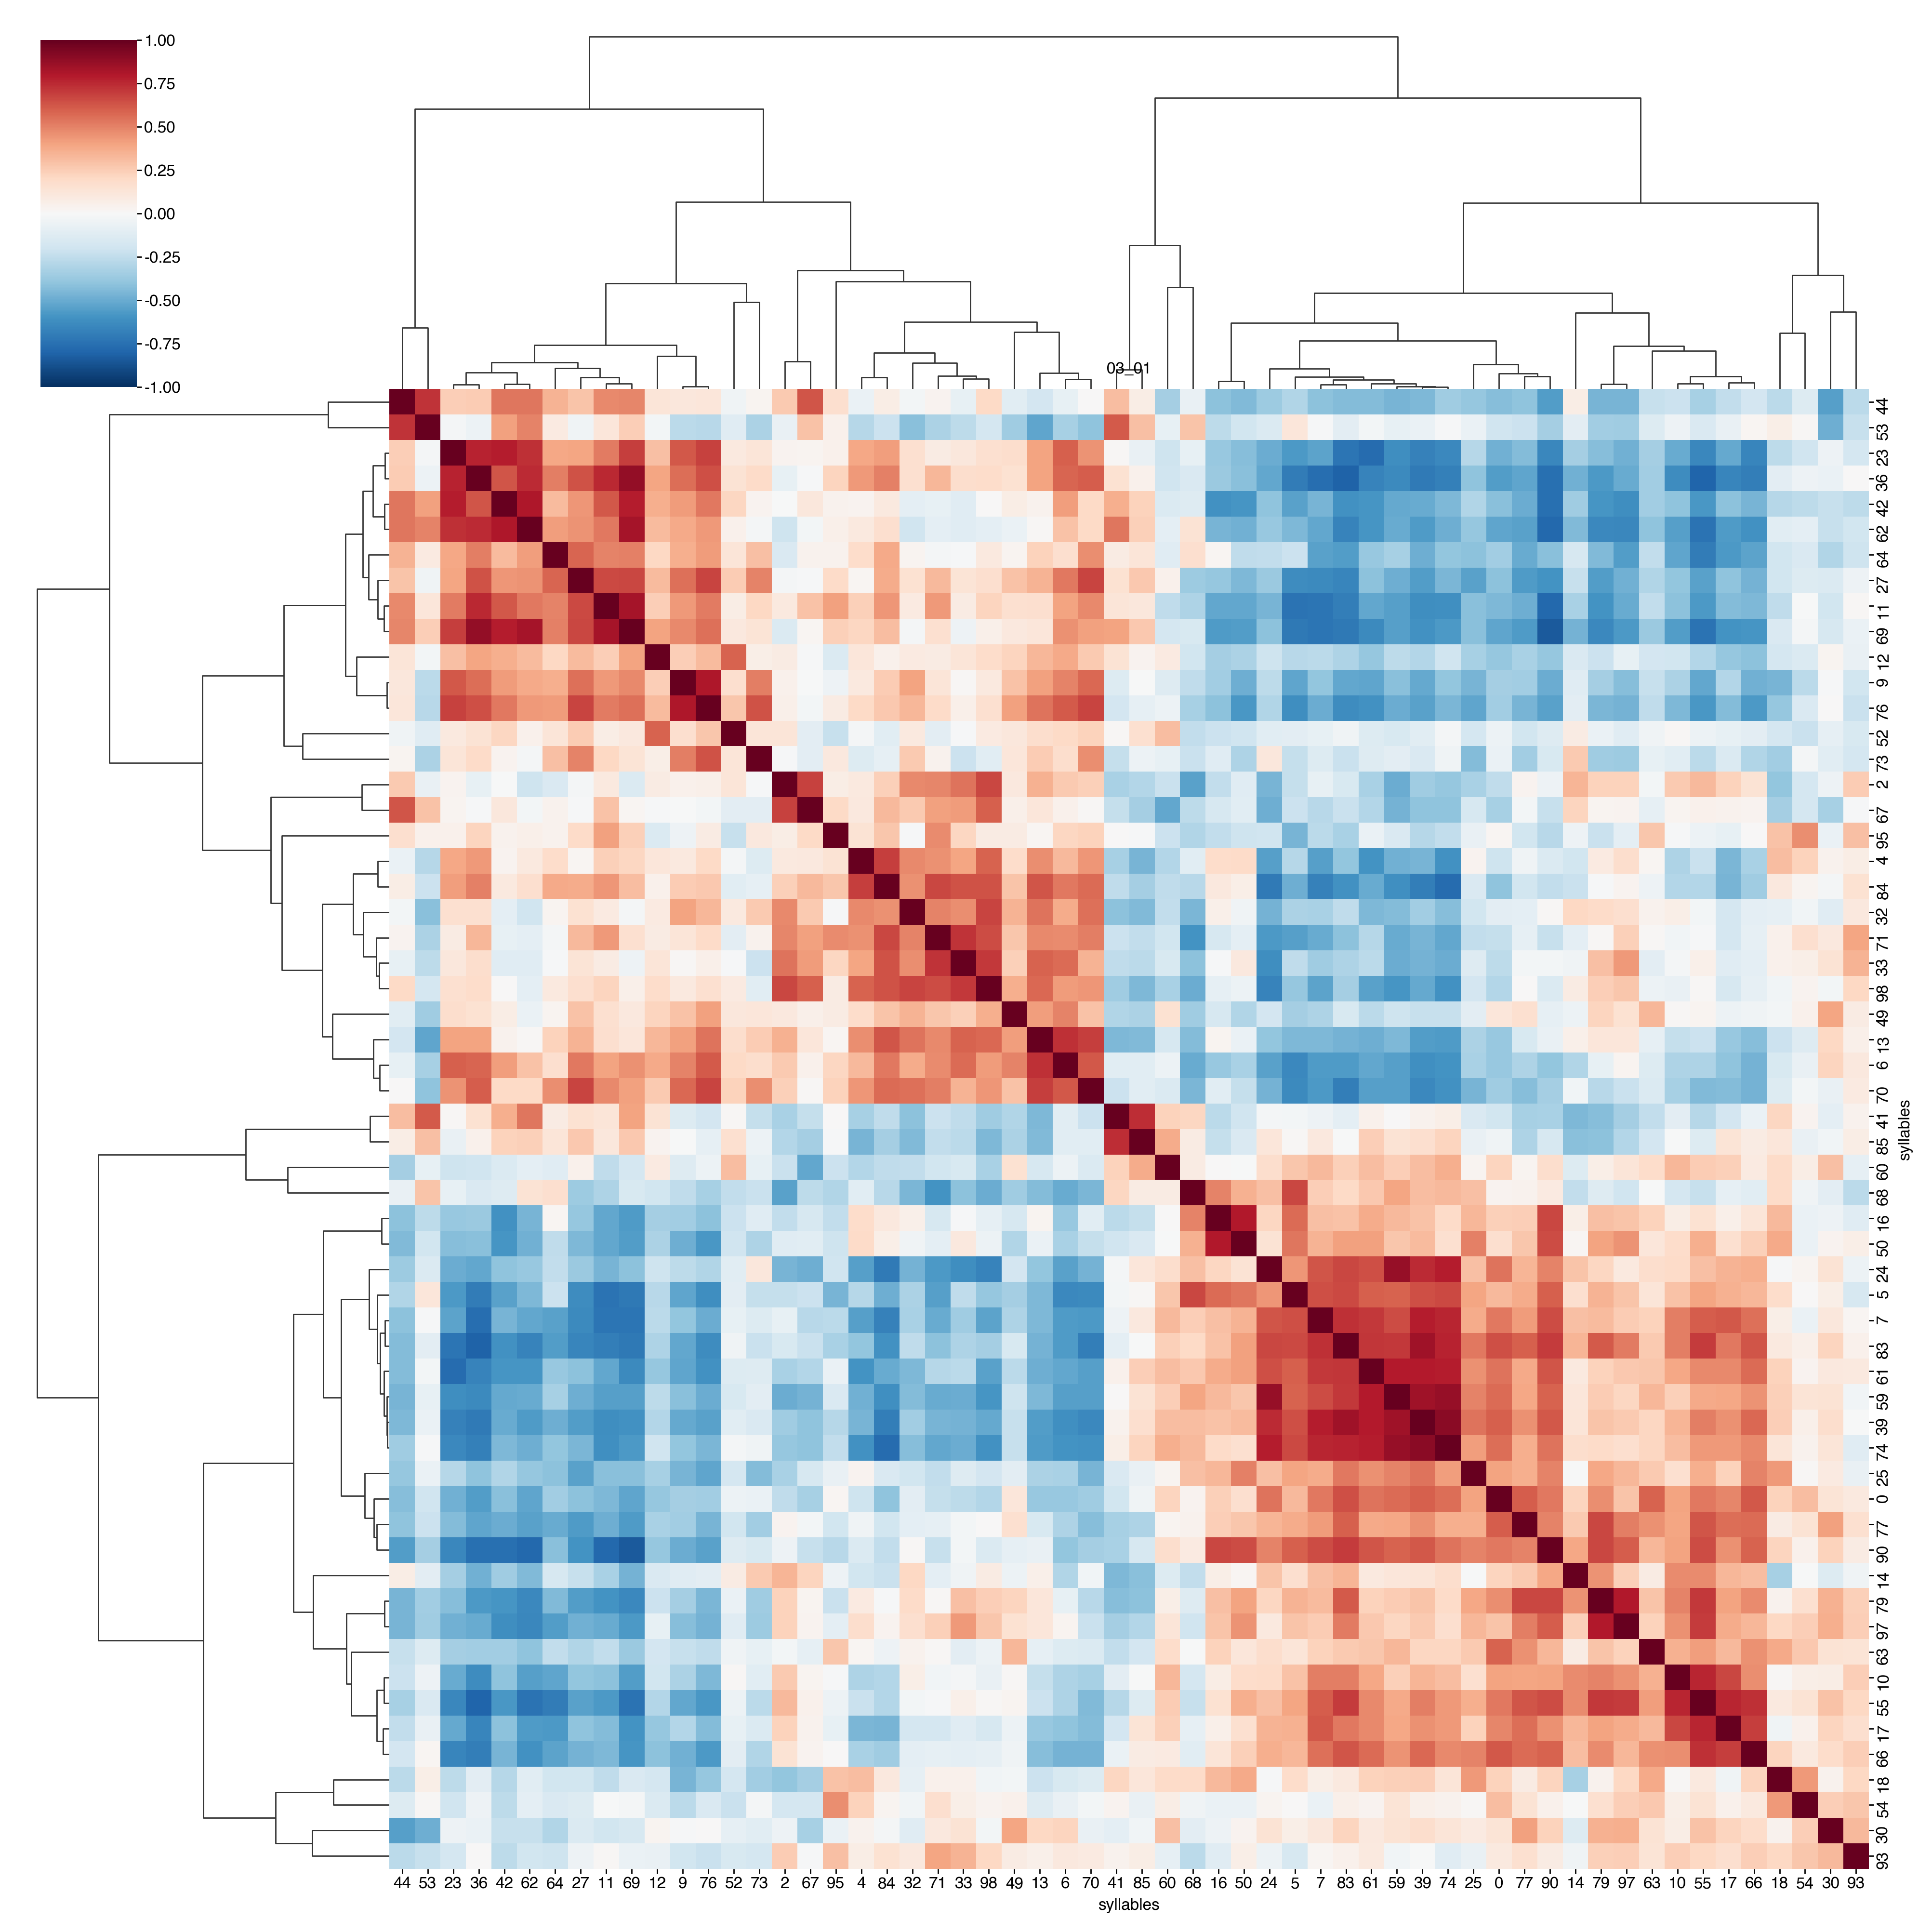

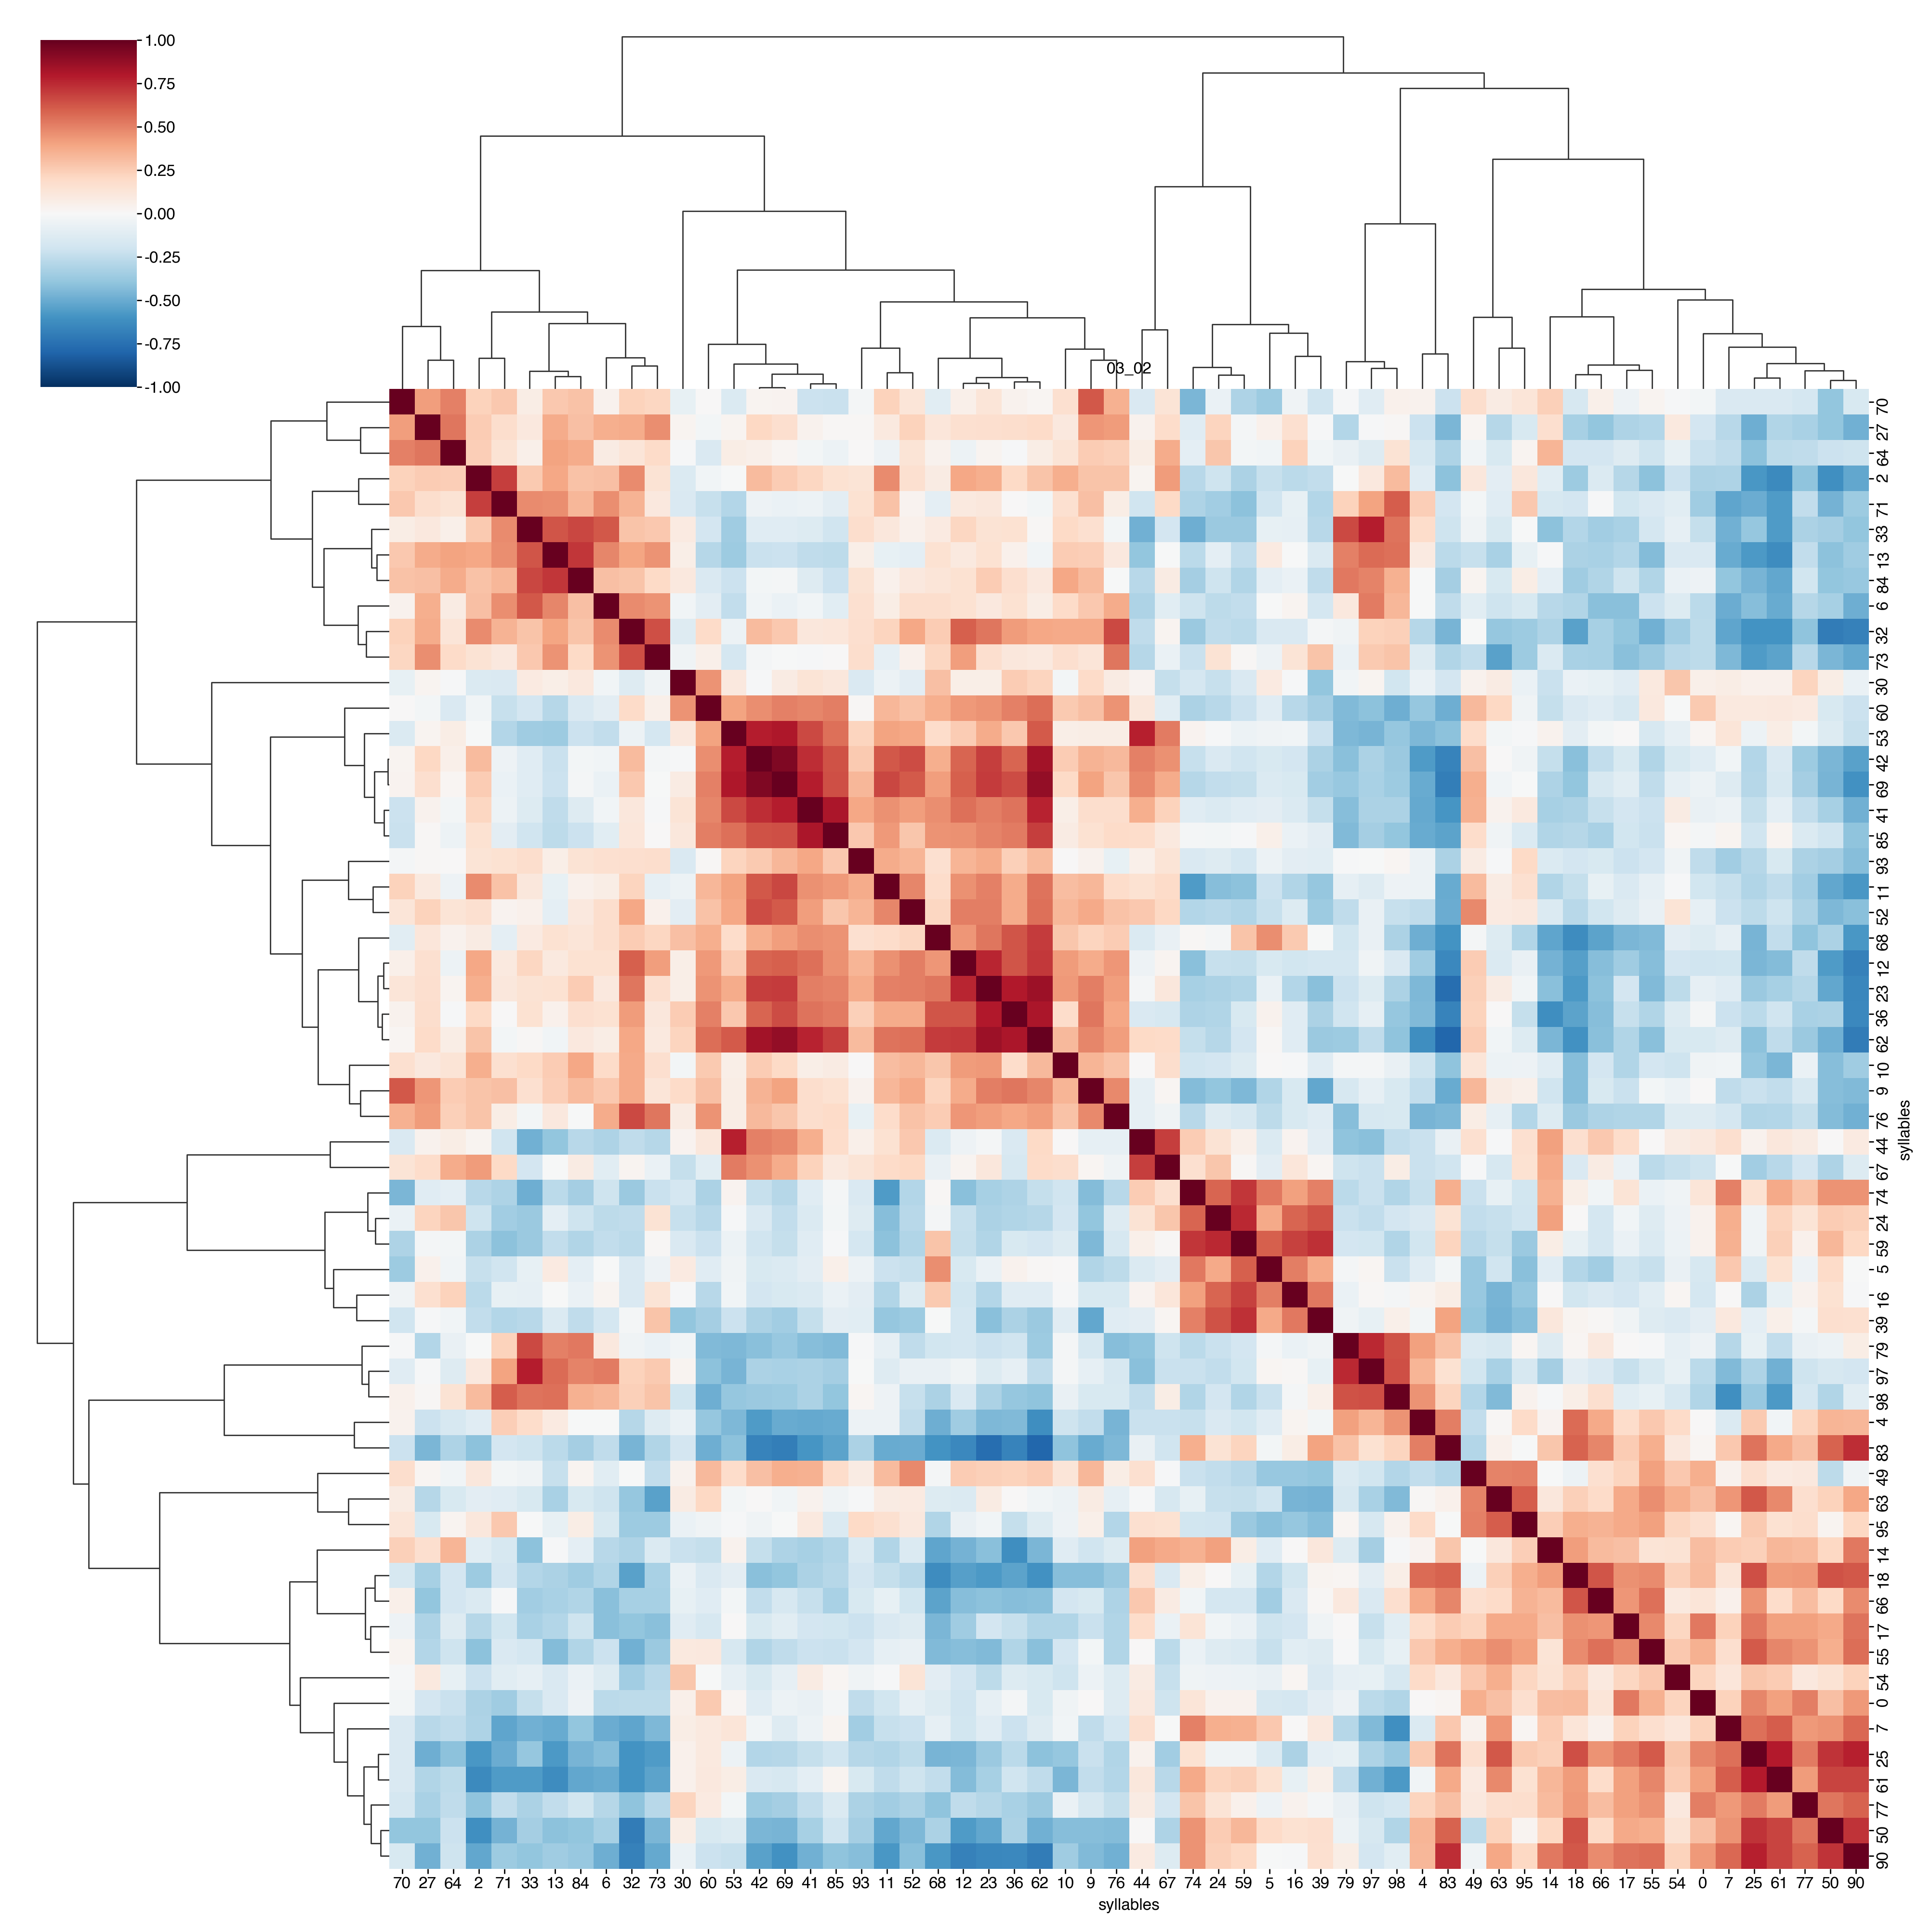

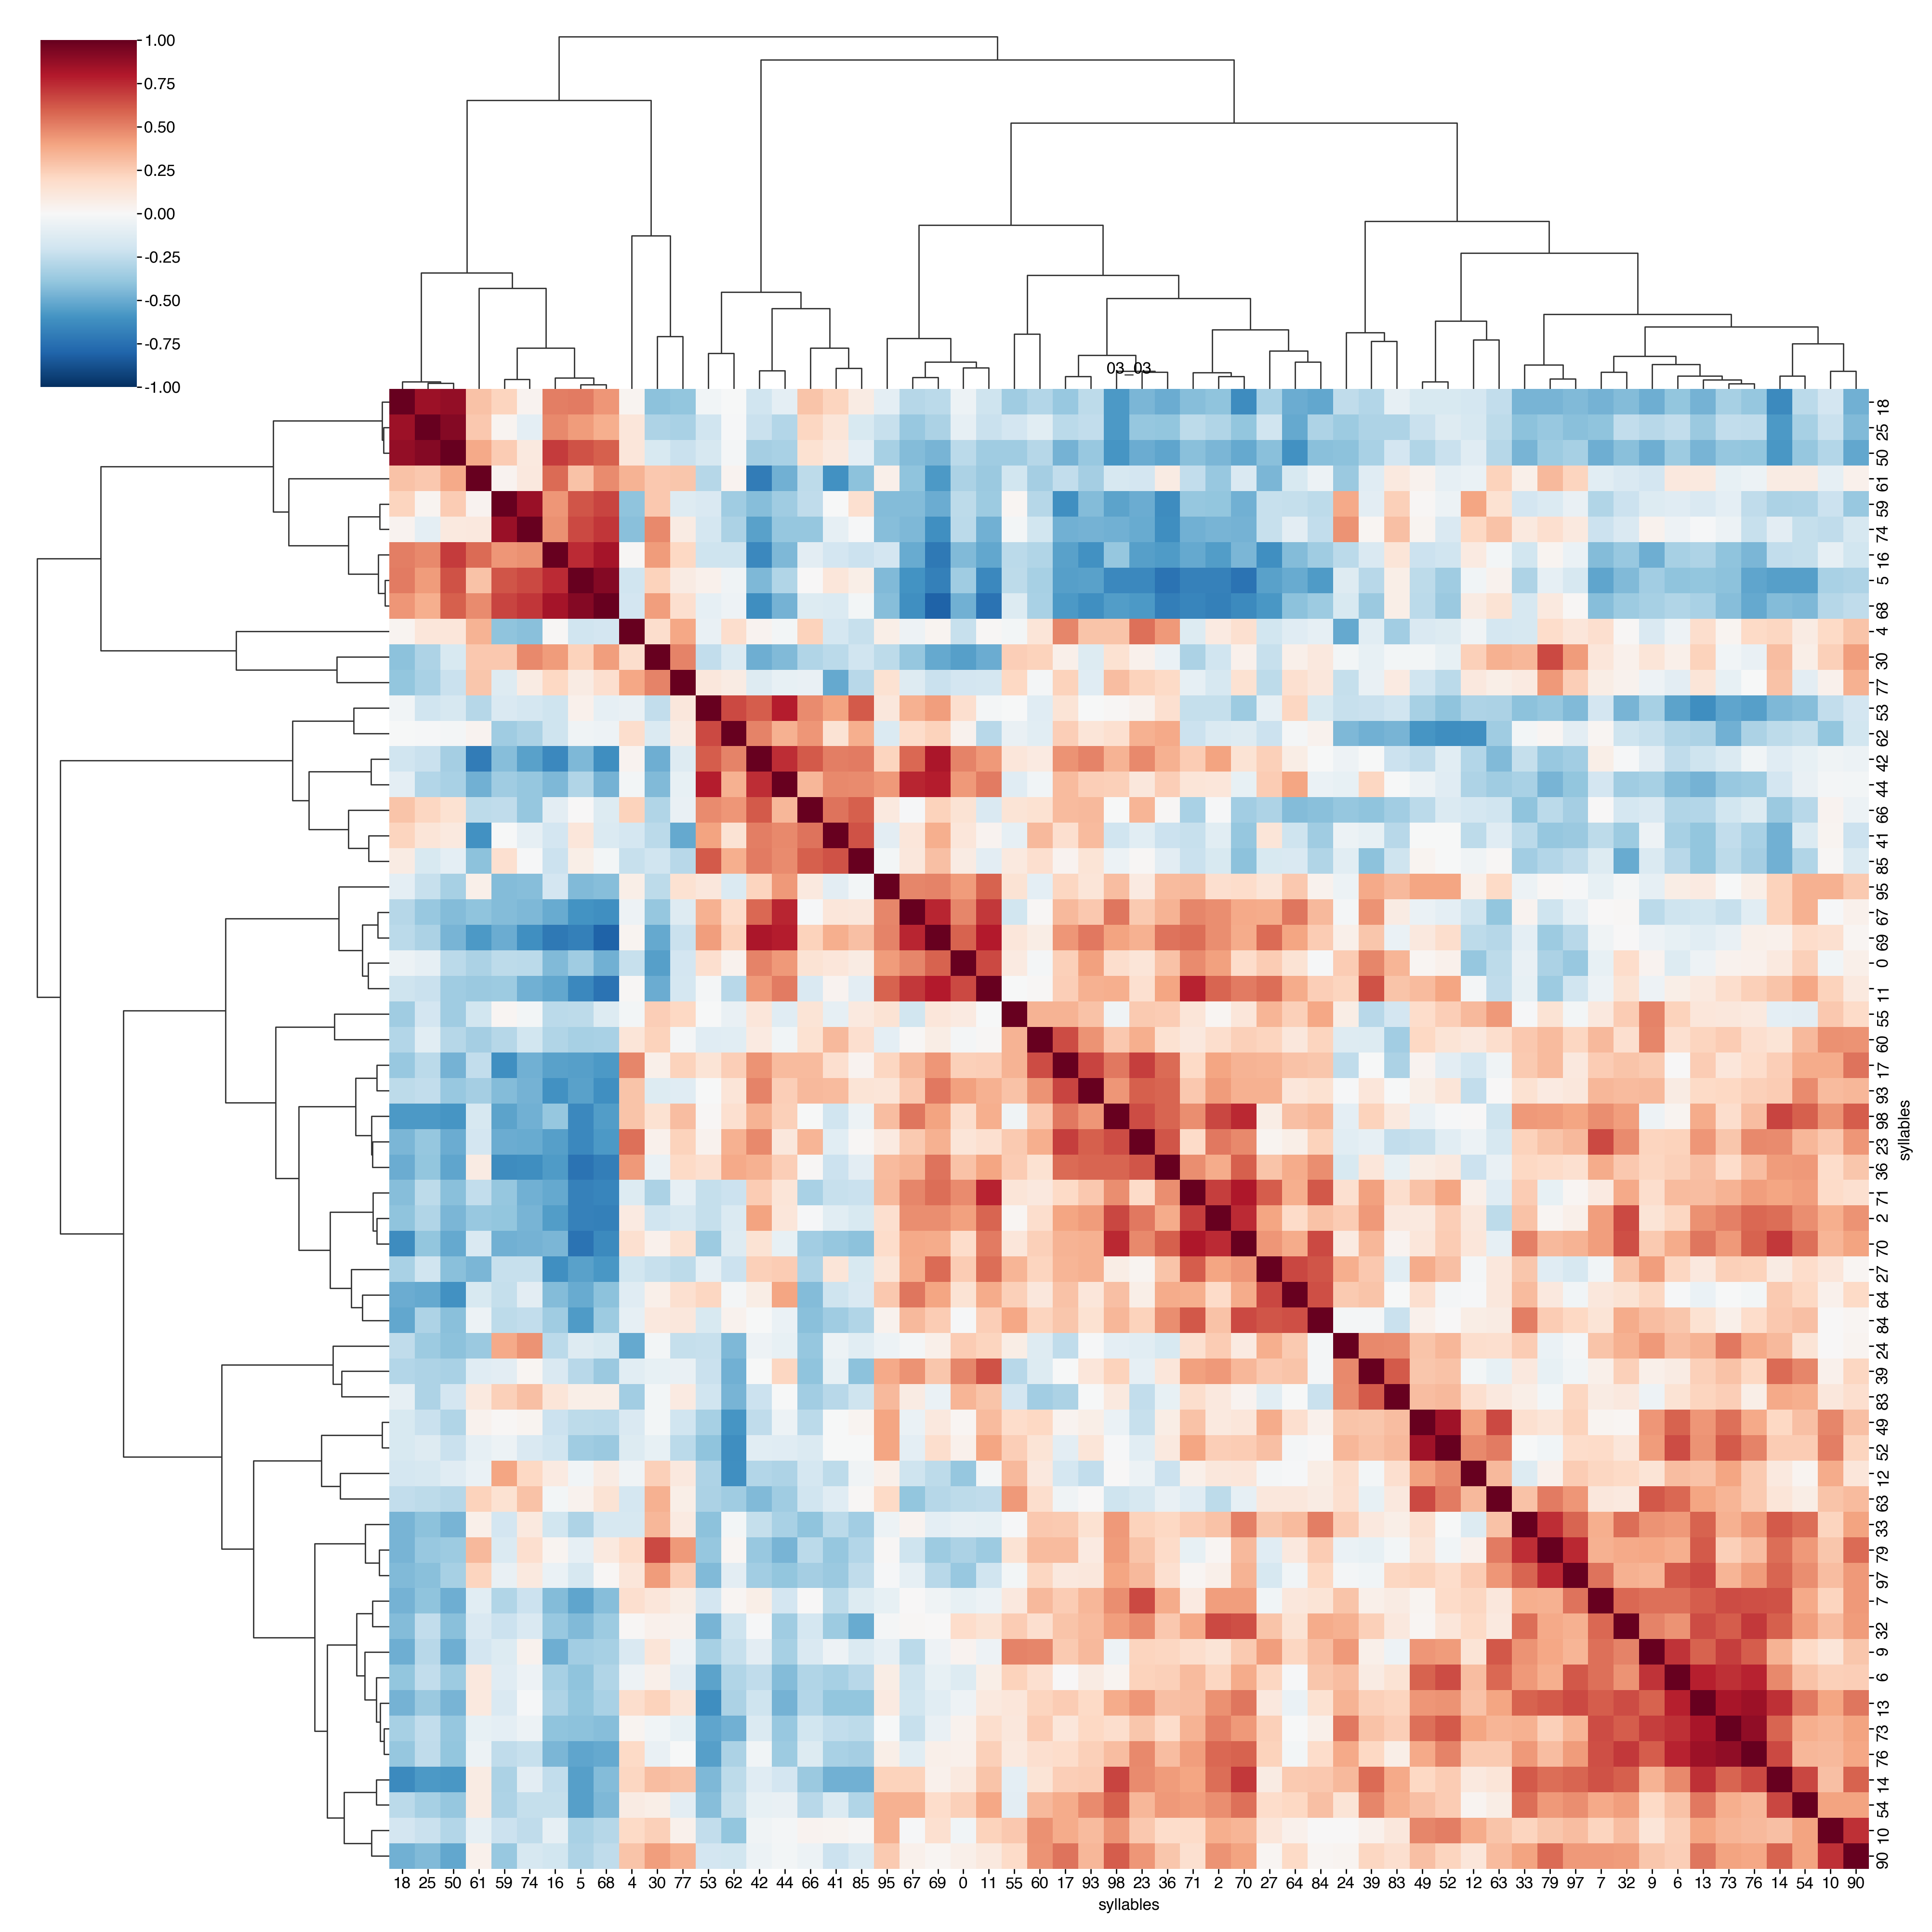

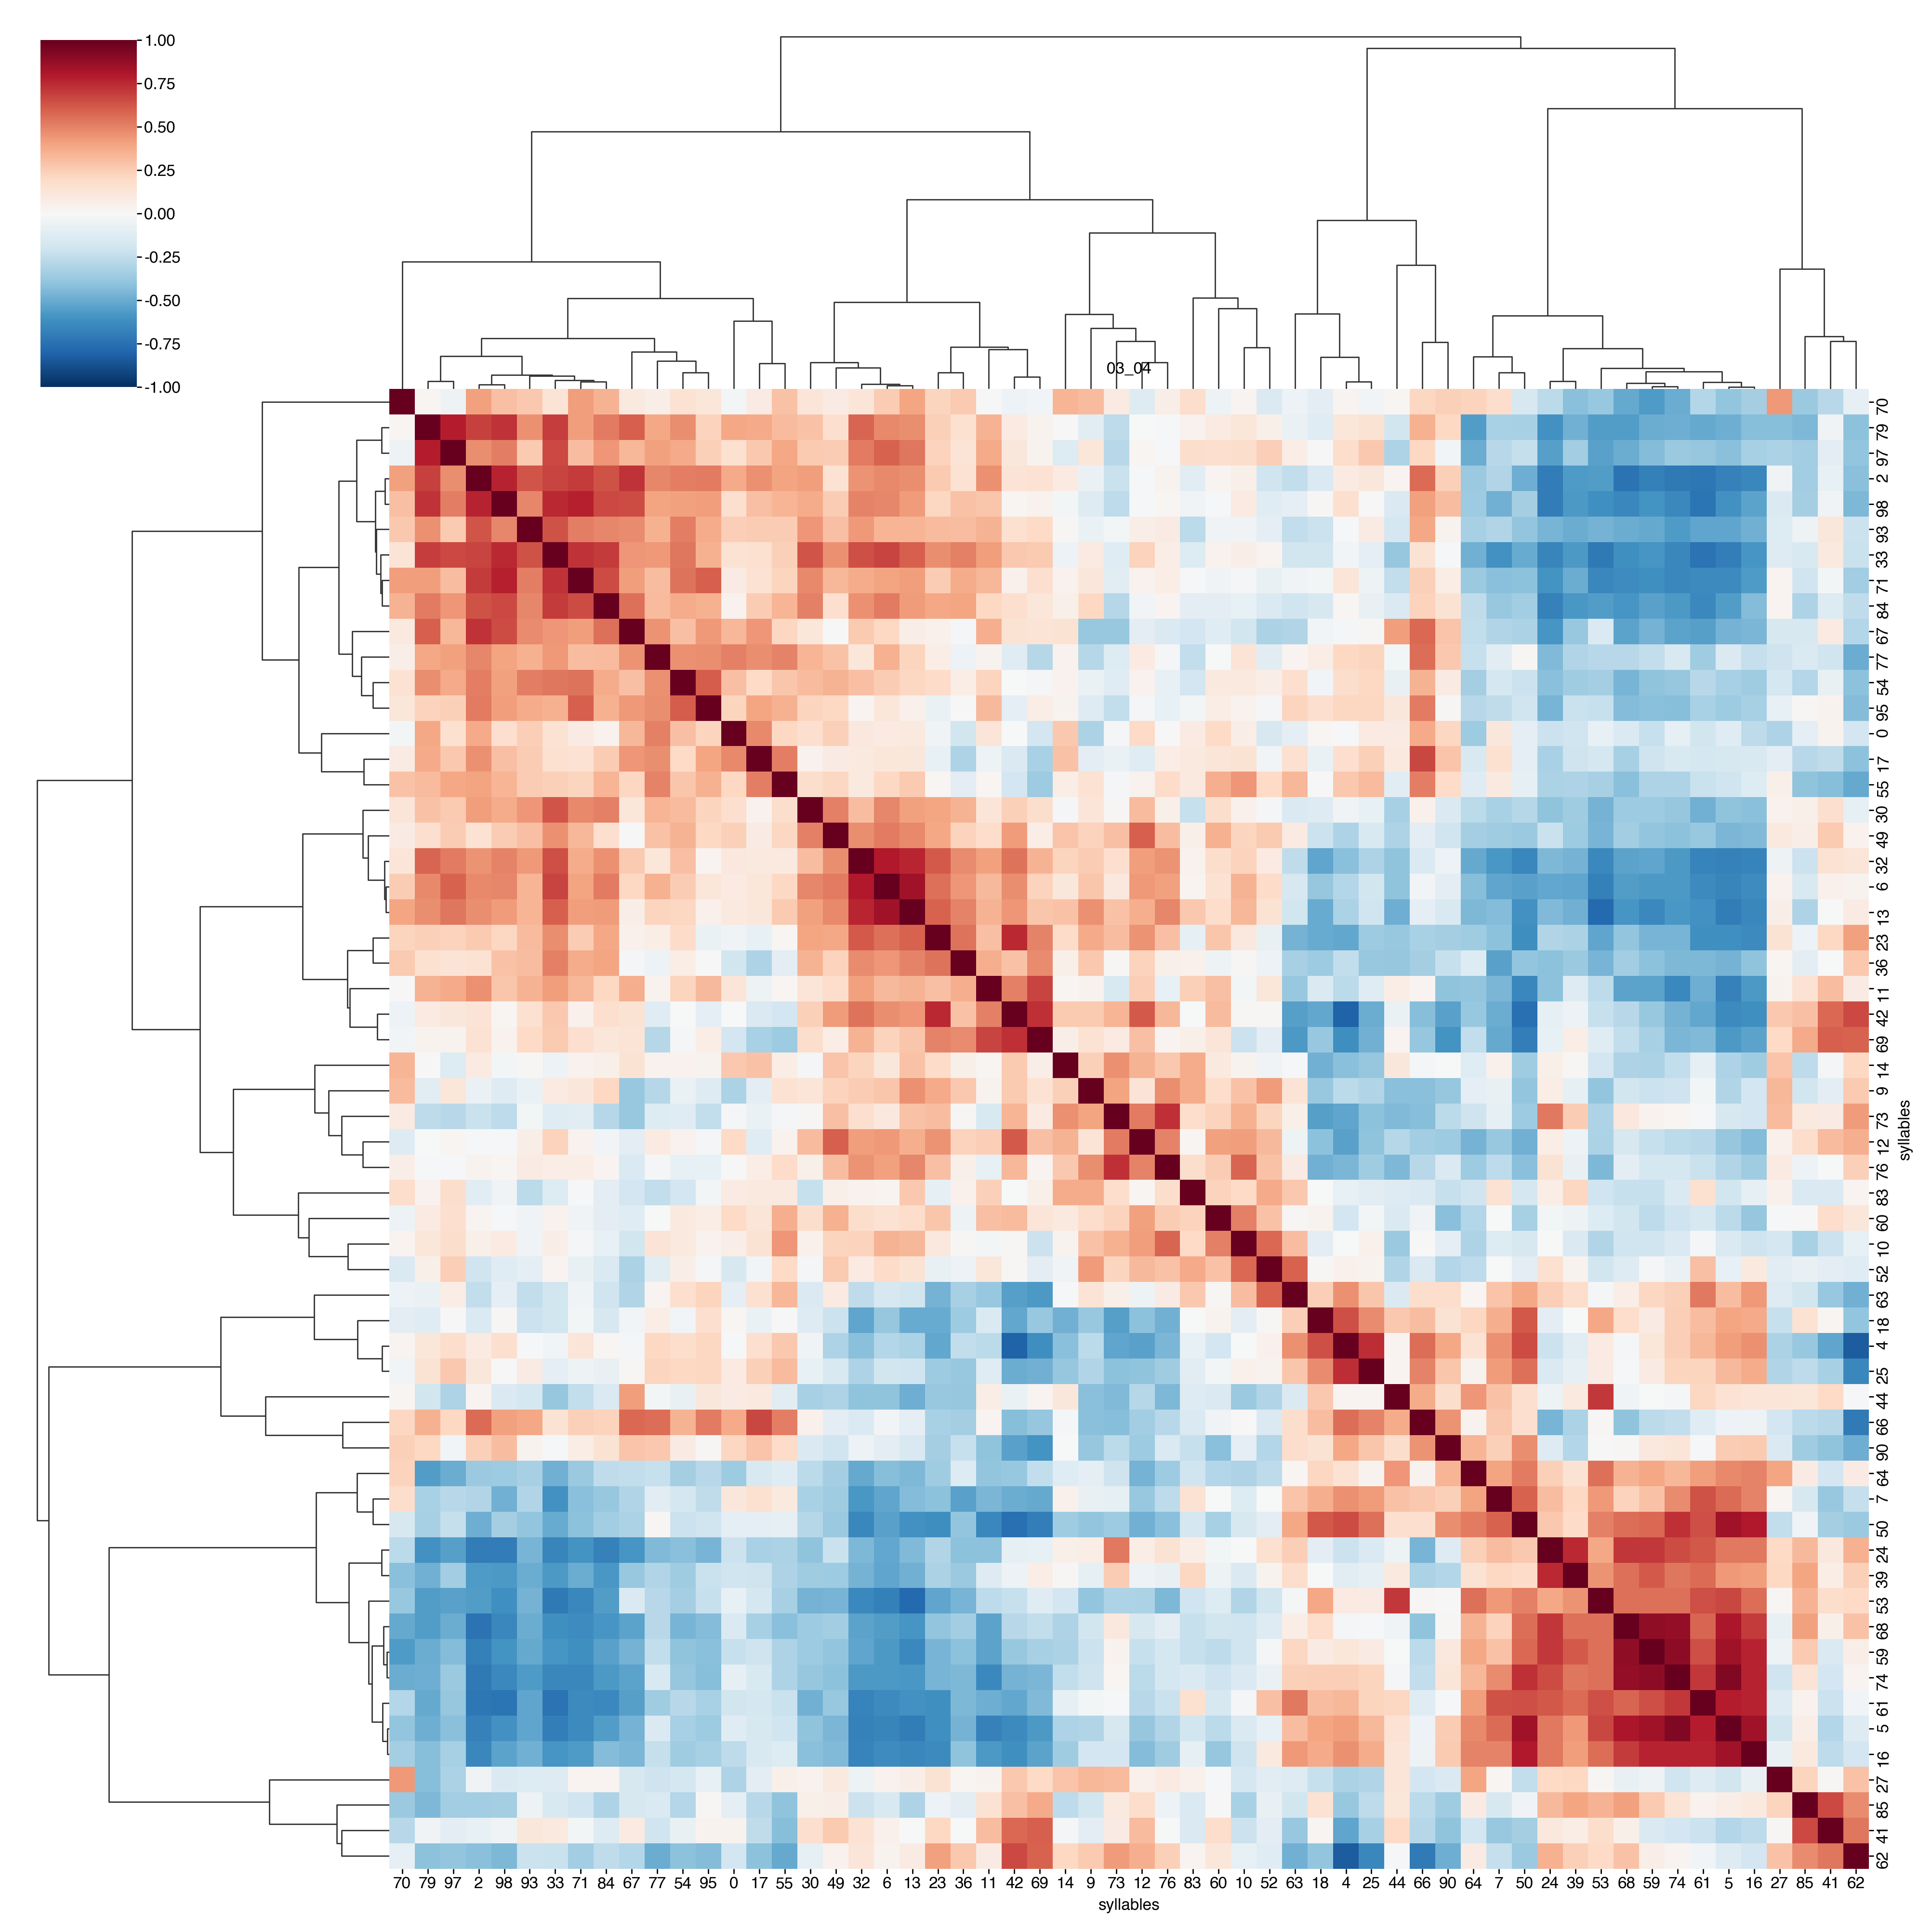

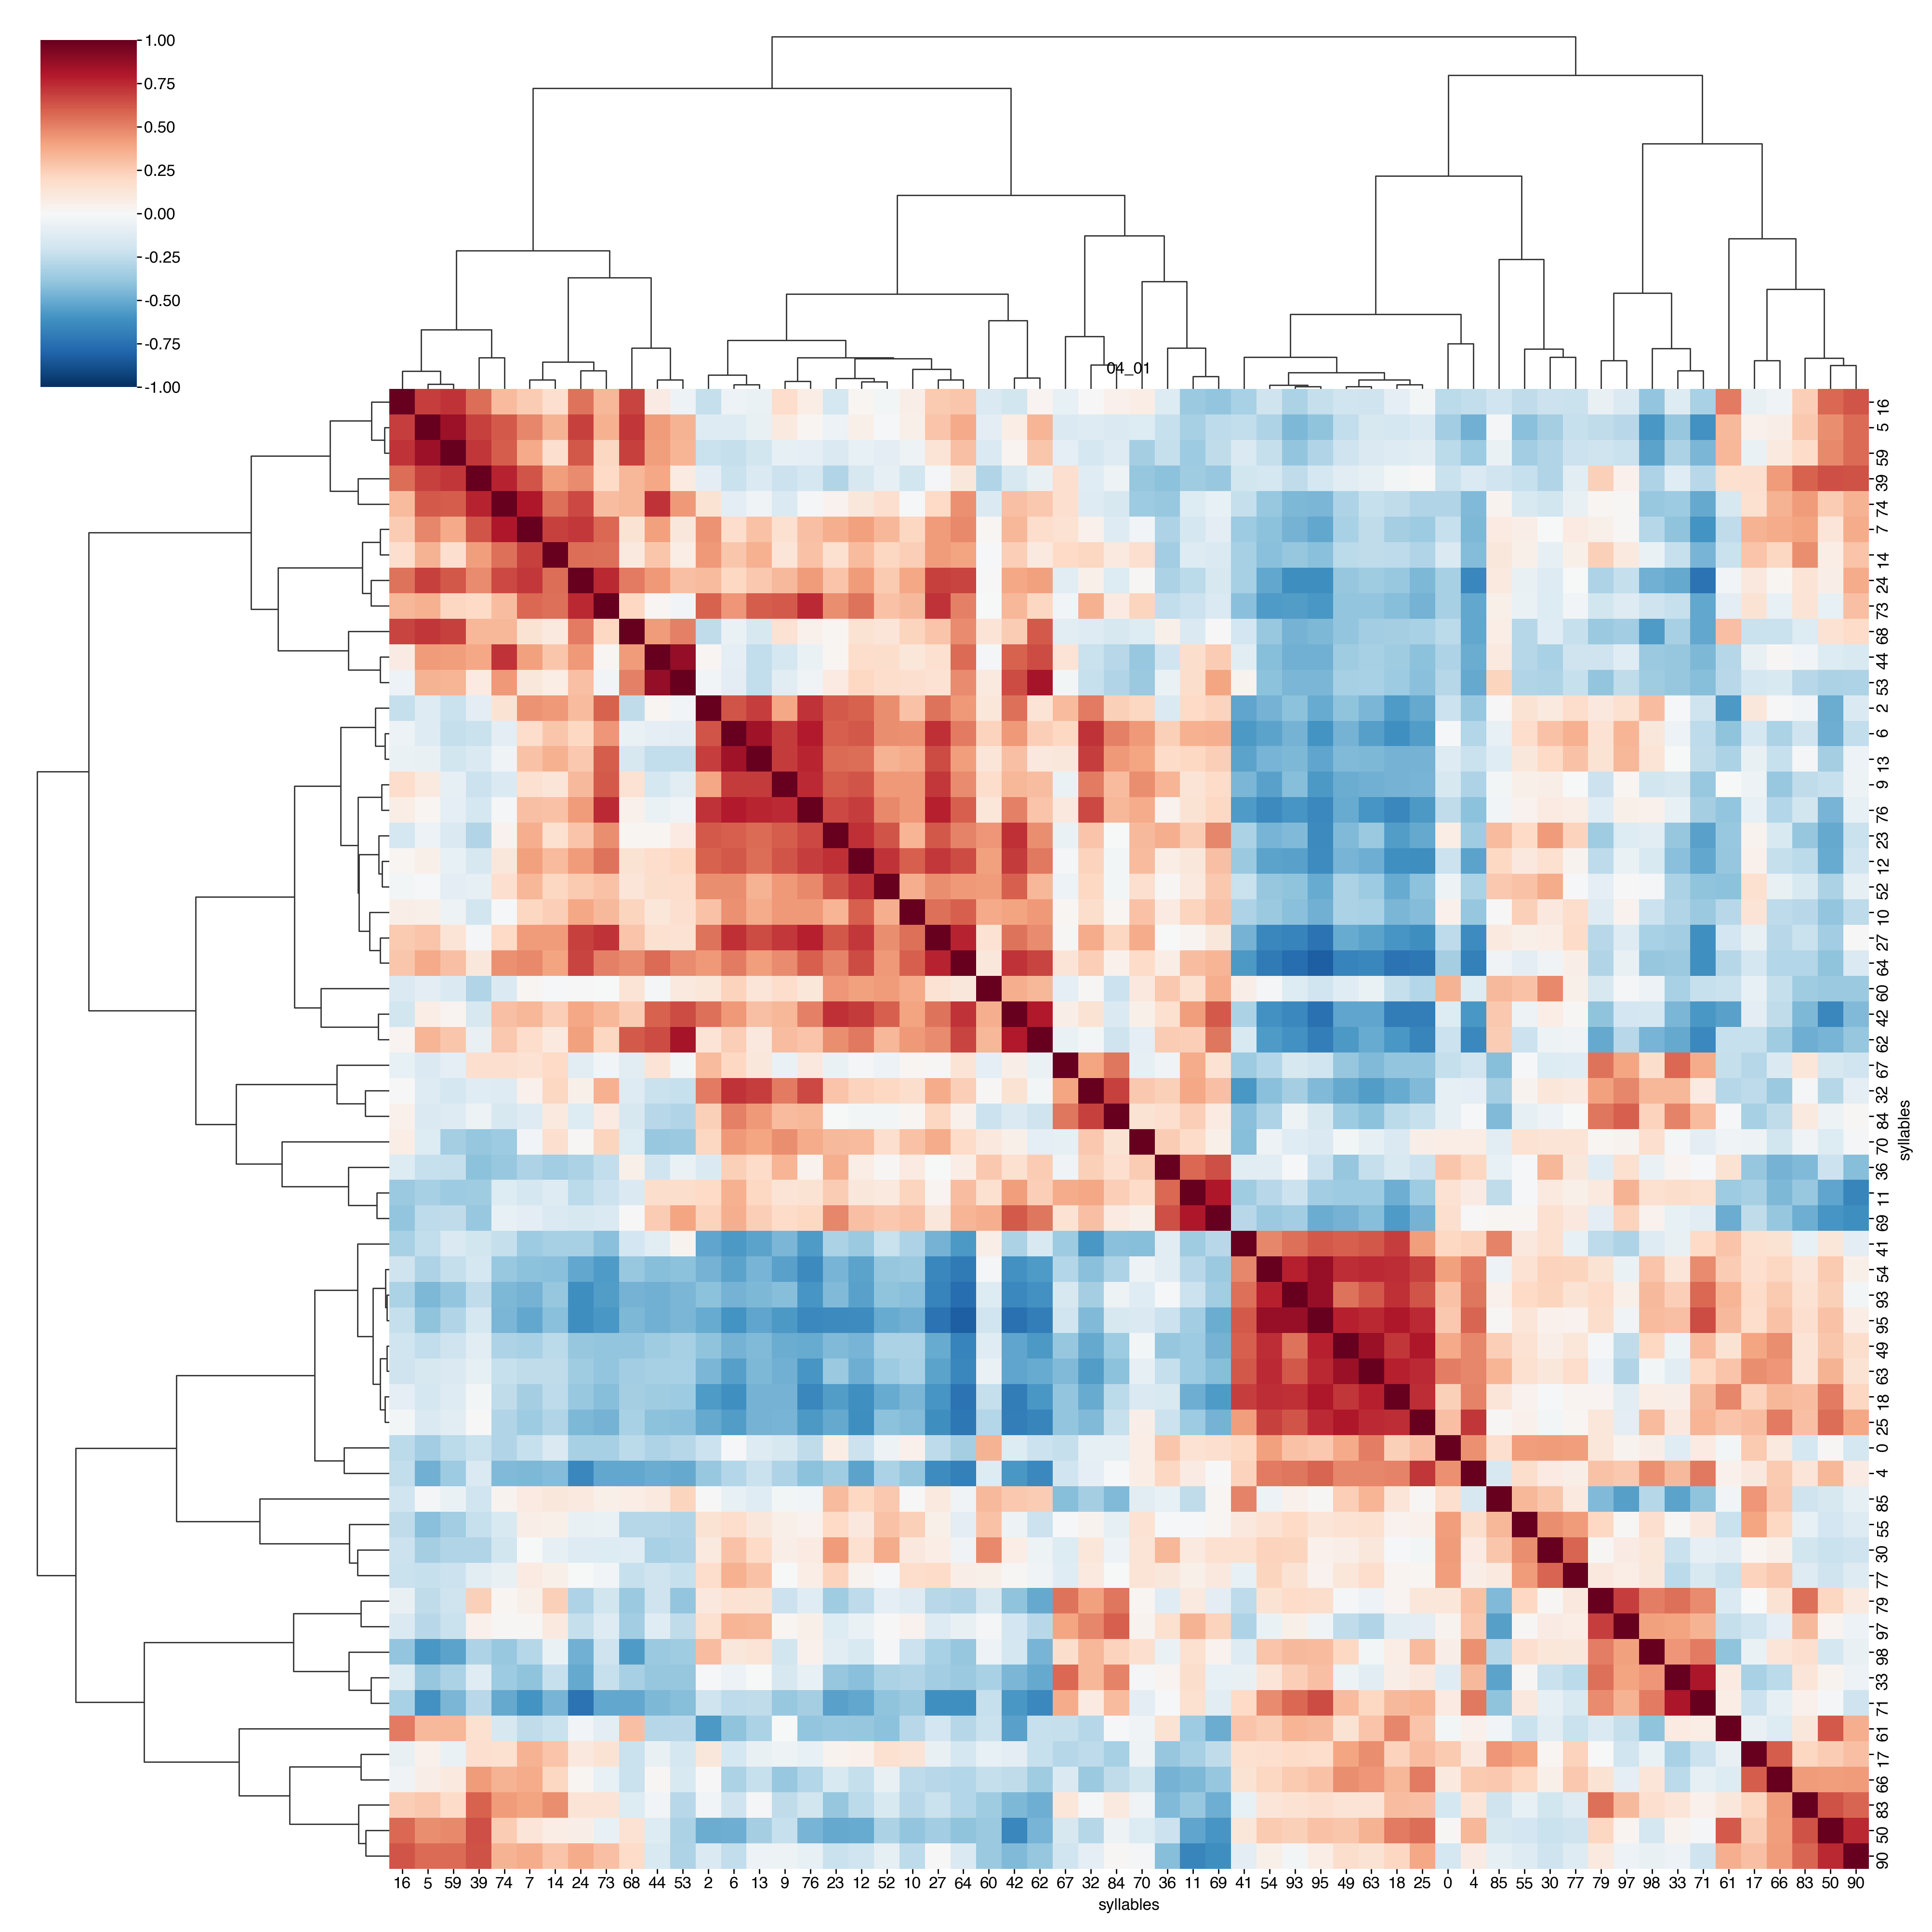

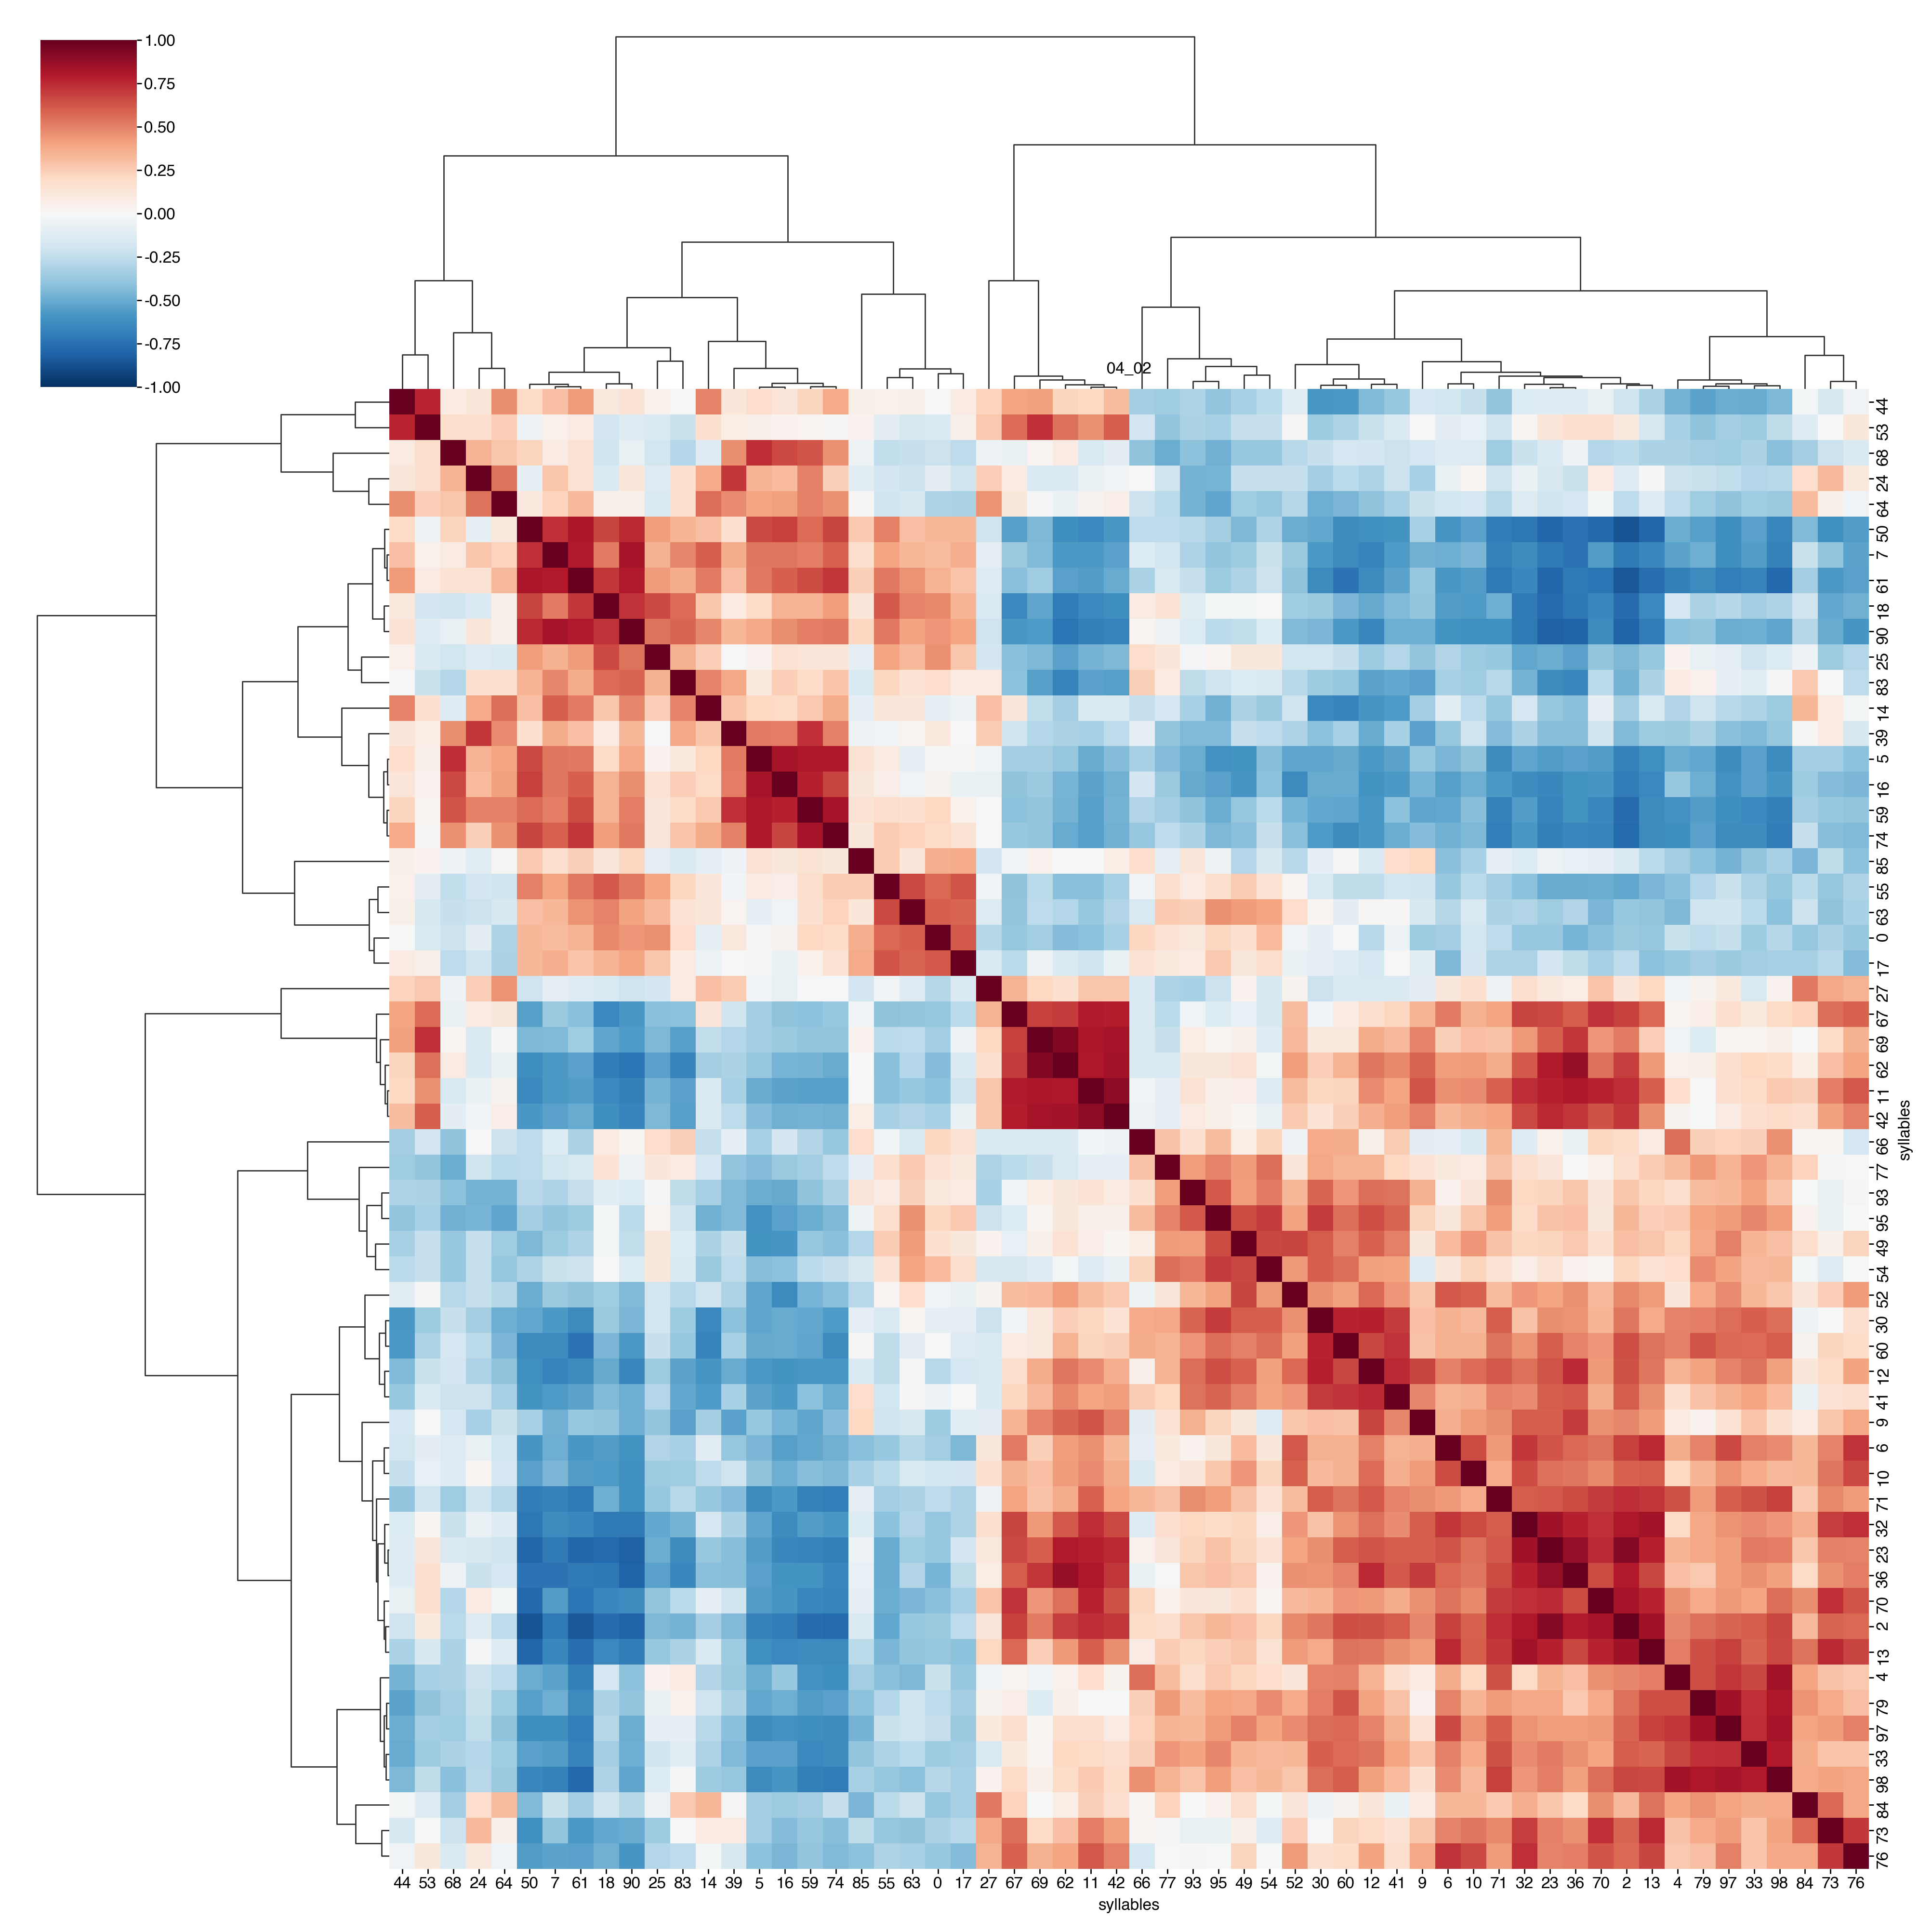

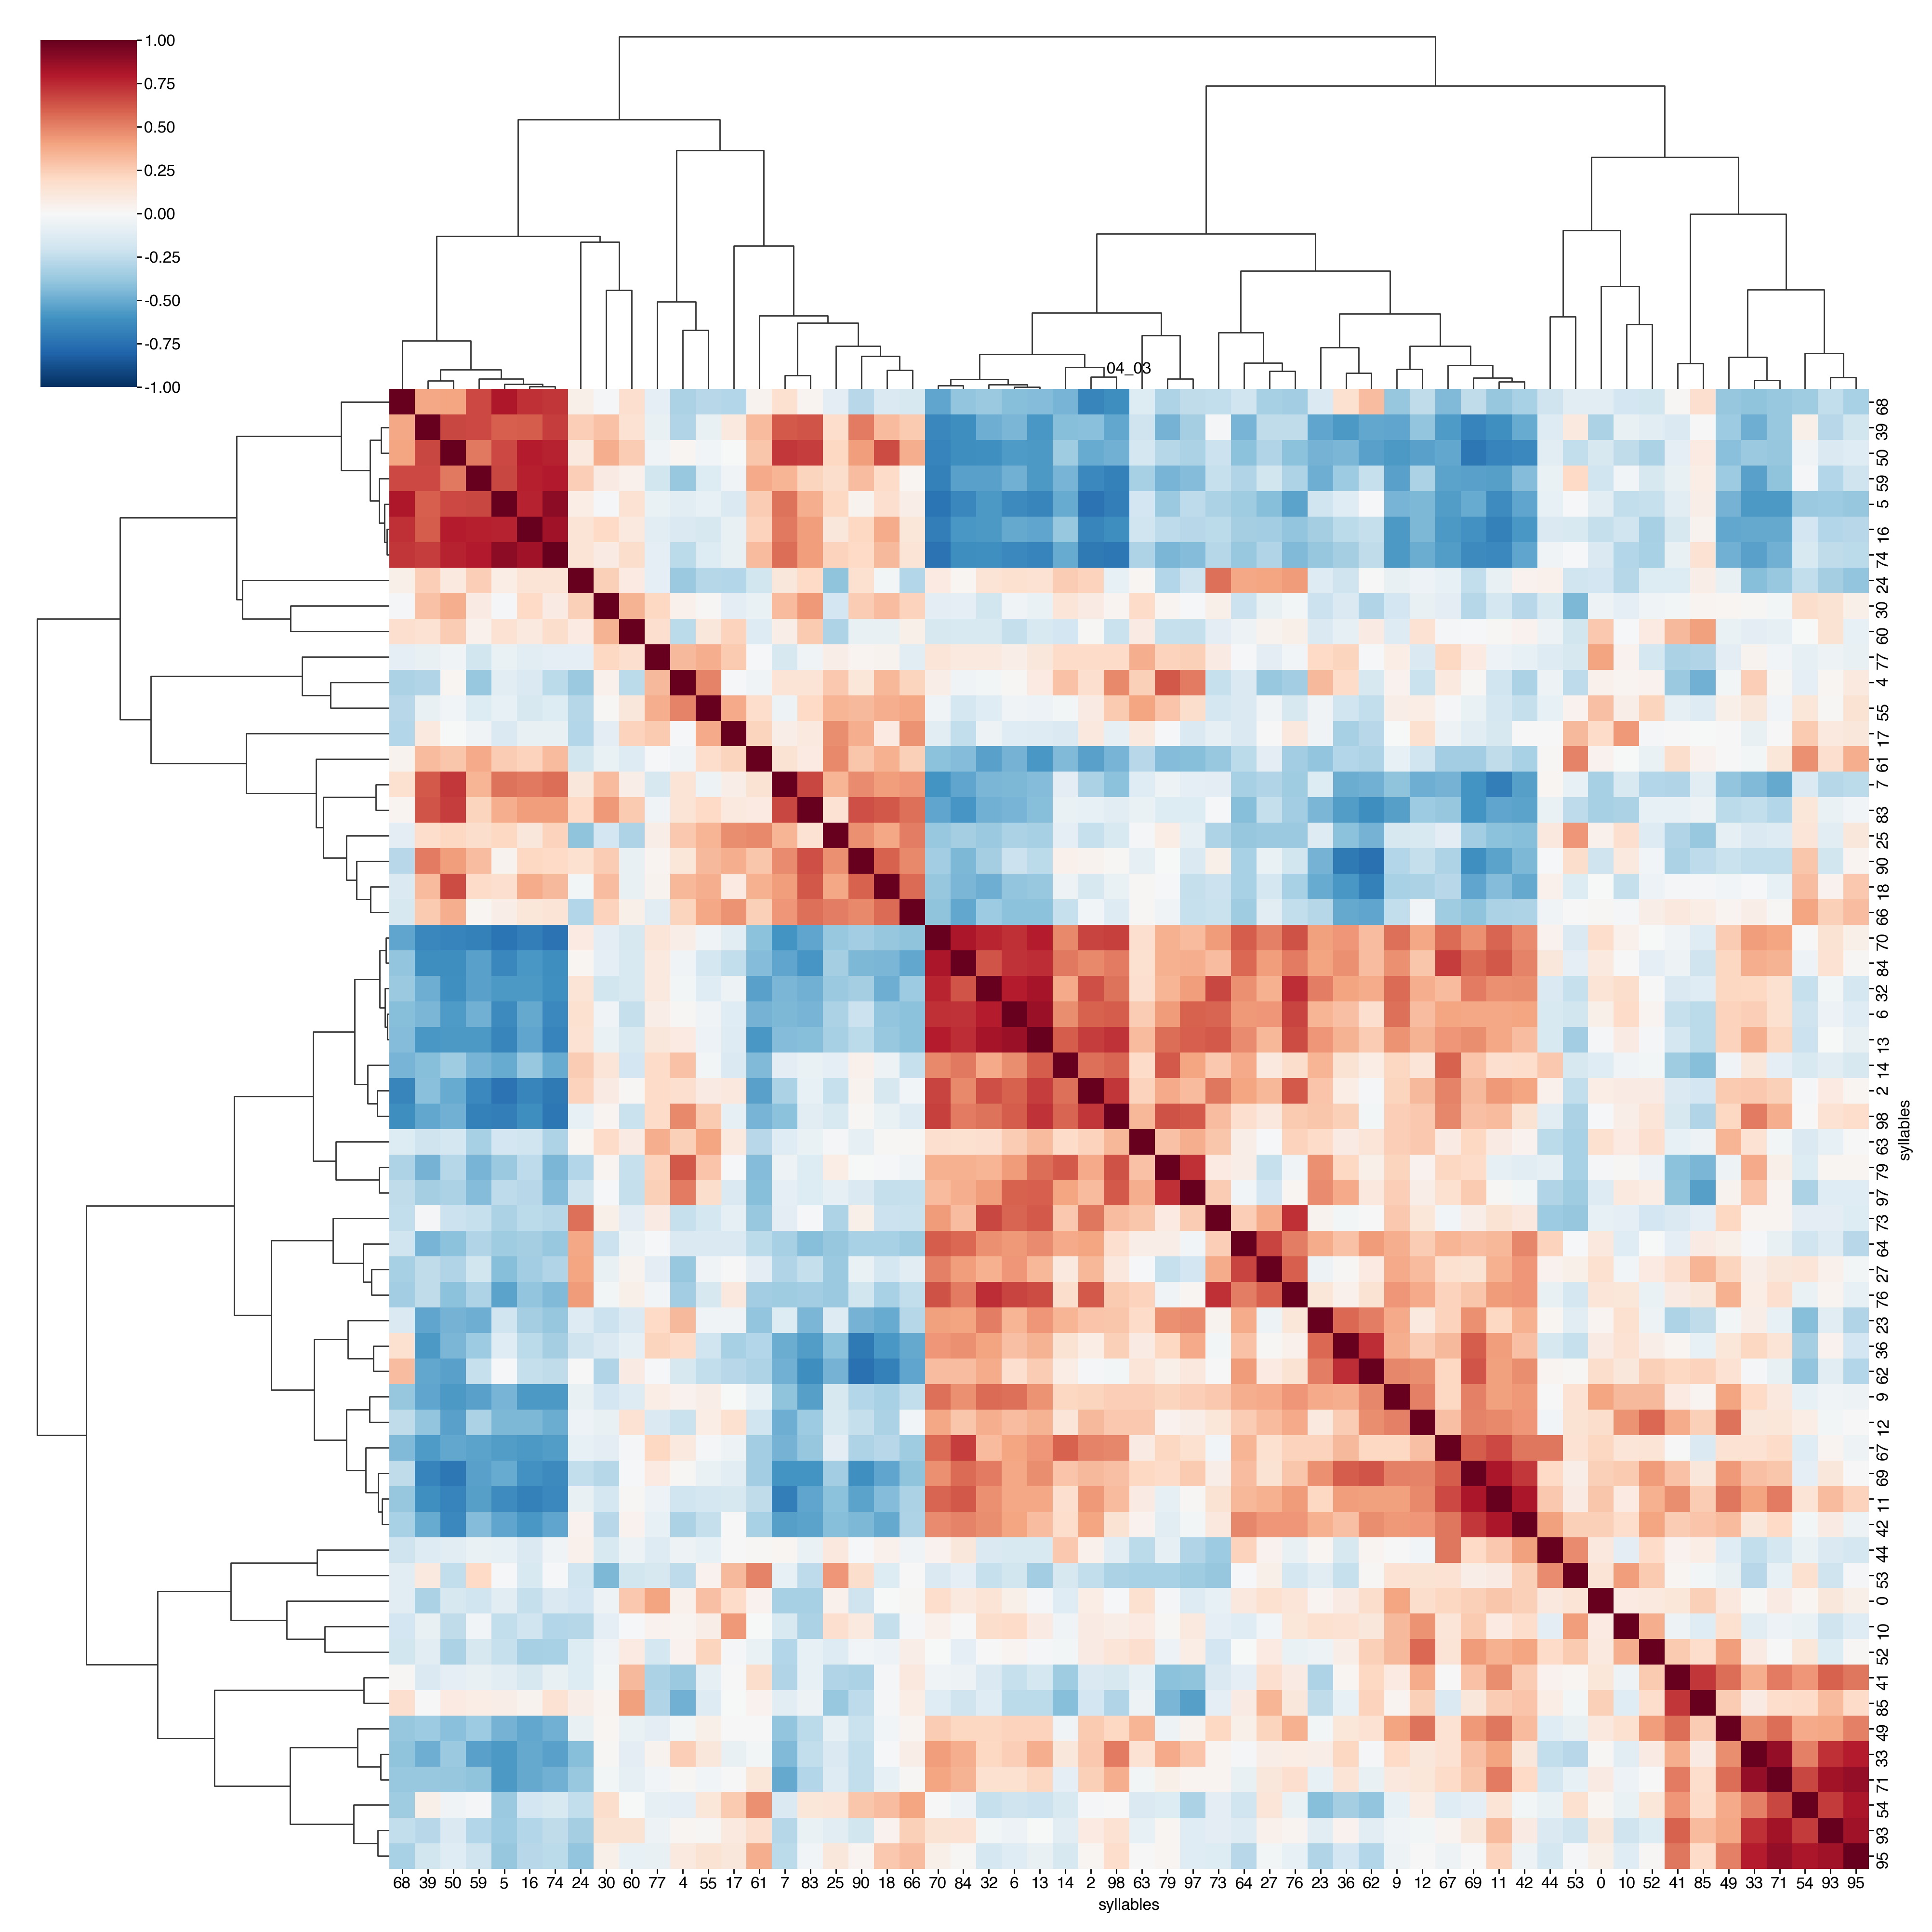

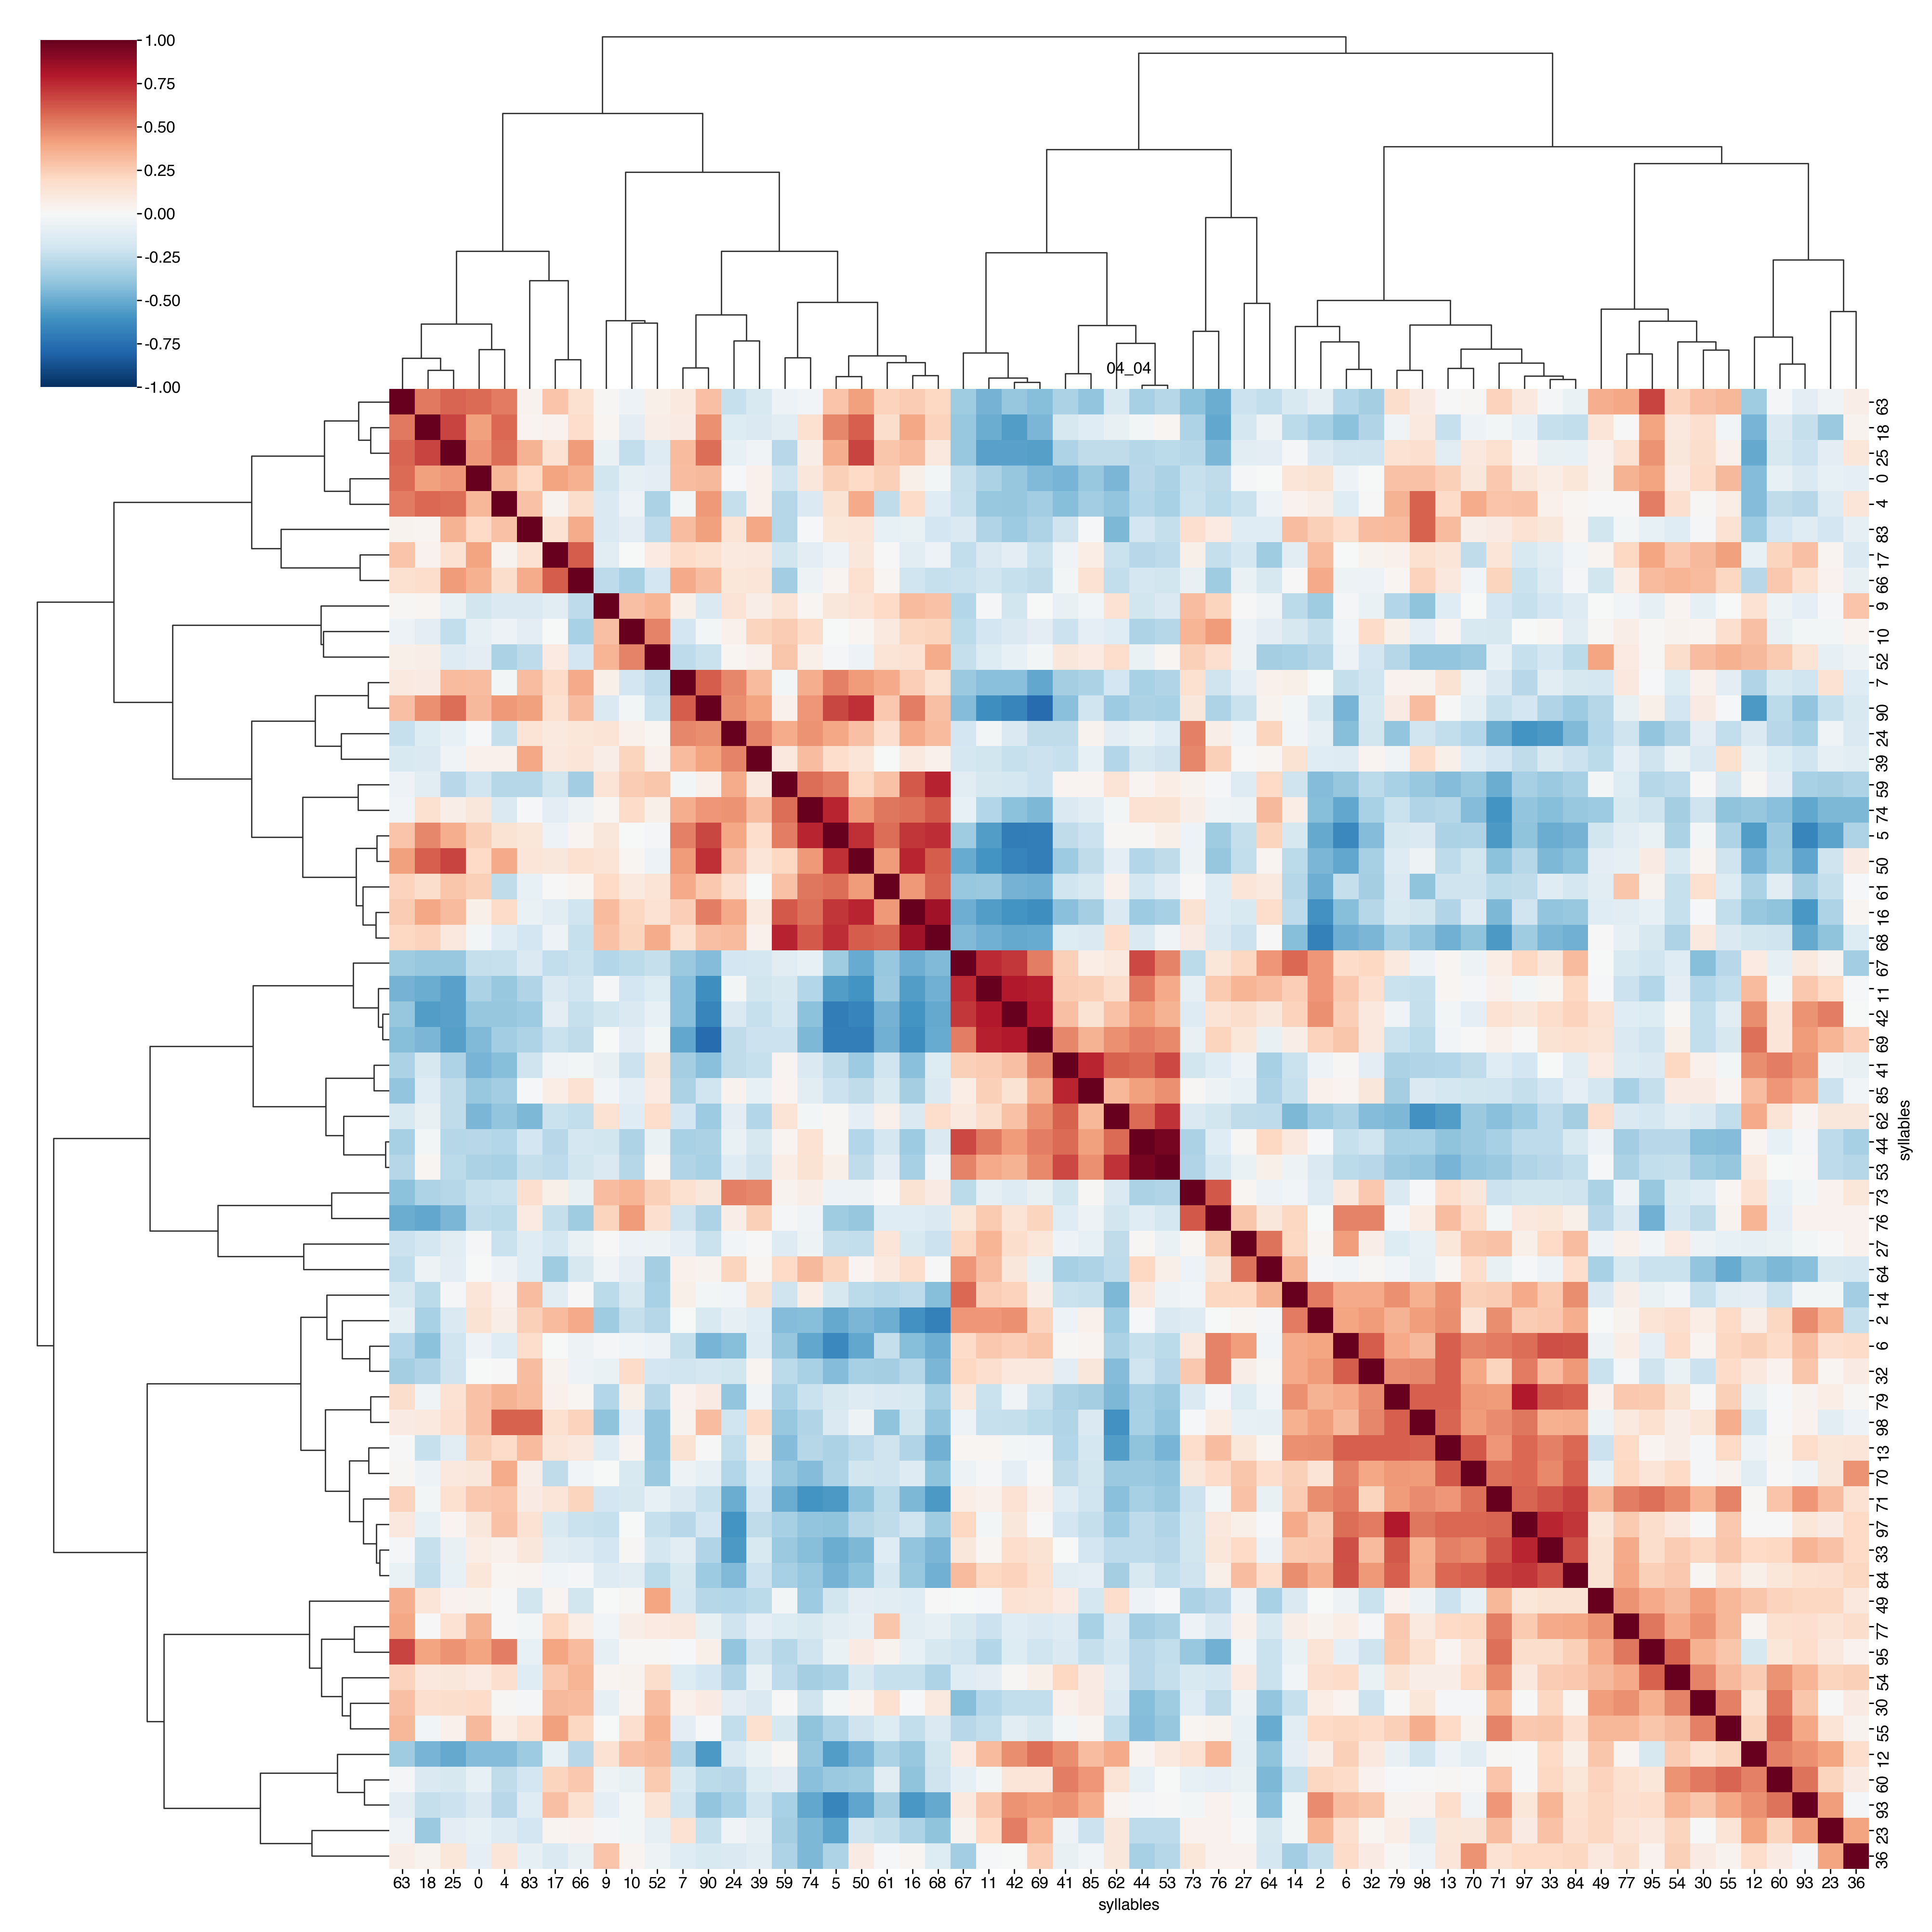

In [141]:
for mouse, _df in sample.groupby('mouse'):
    _df = _df[syllable_columns]
    grid = sns.clustermap(_df.corr(), cmap='RdBu_r', vmax=1, vmin=-1, method='complete', metric='cosine', )
    grid.ax_heatmap.set(title=mouse)

In [156]:
template_animal = '02_03'
ex = sample.query("mouse == @template_animal")[syllable_columns]

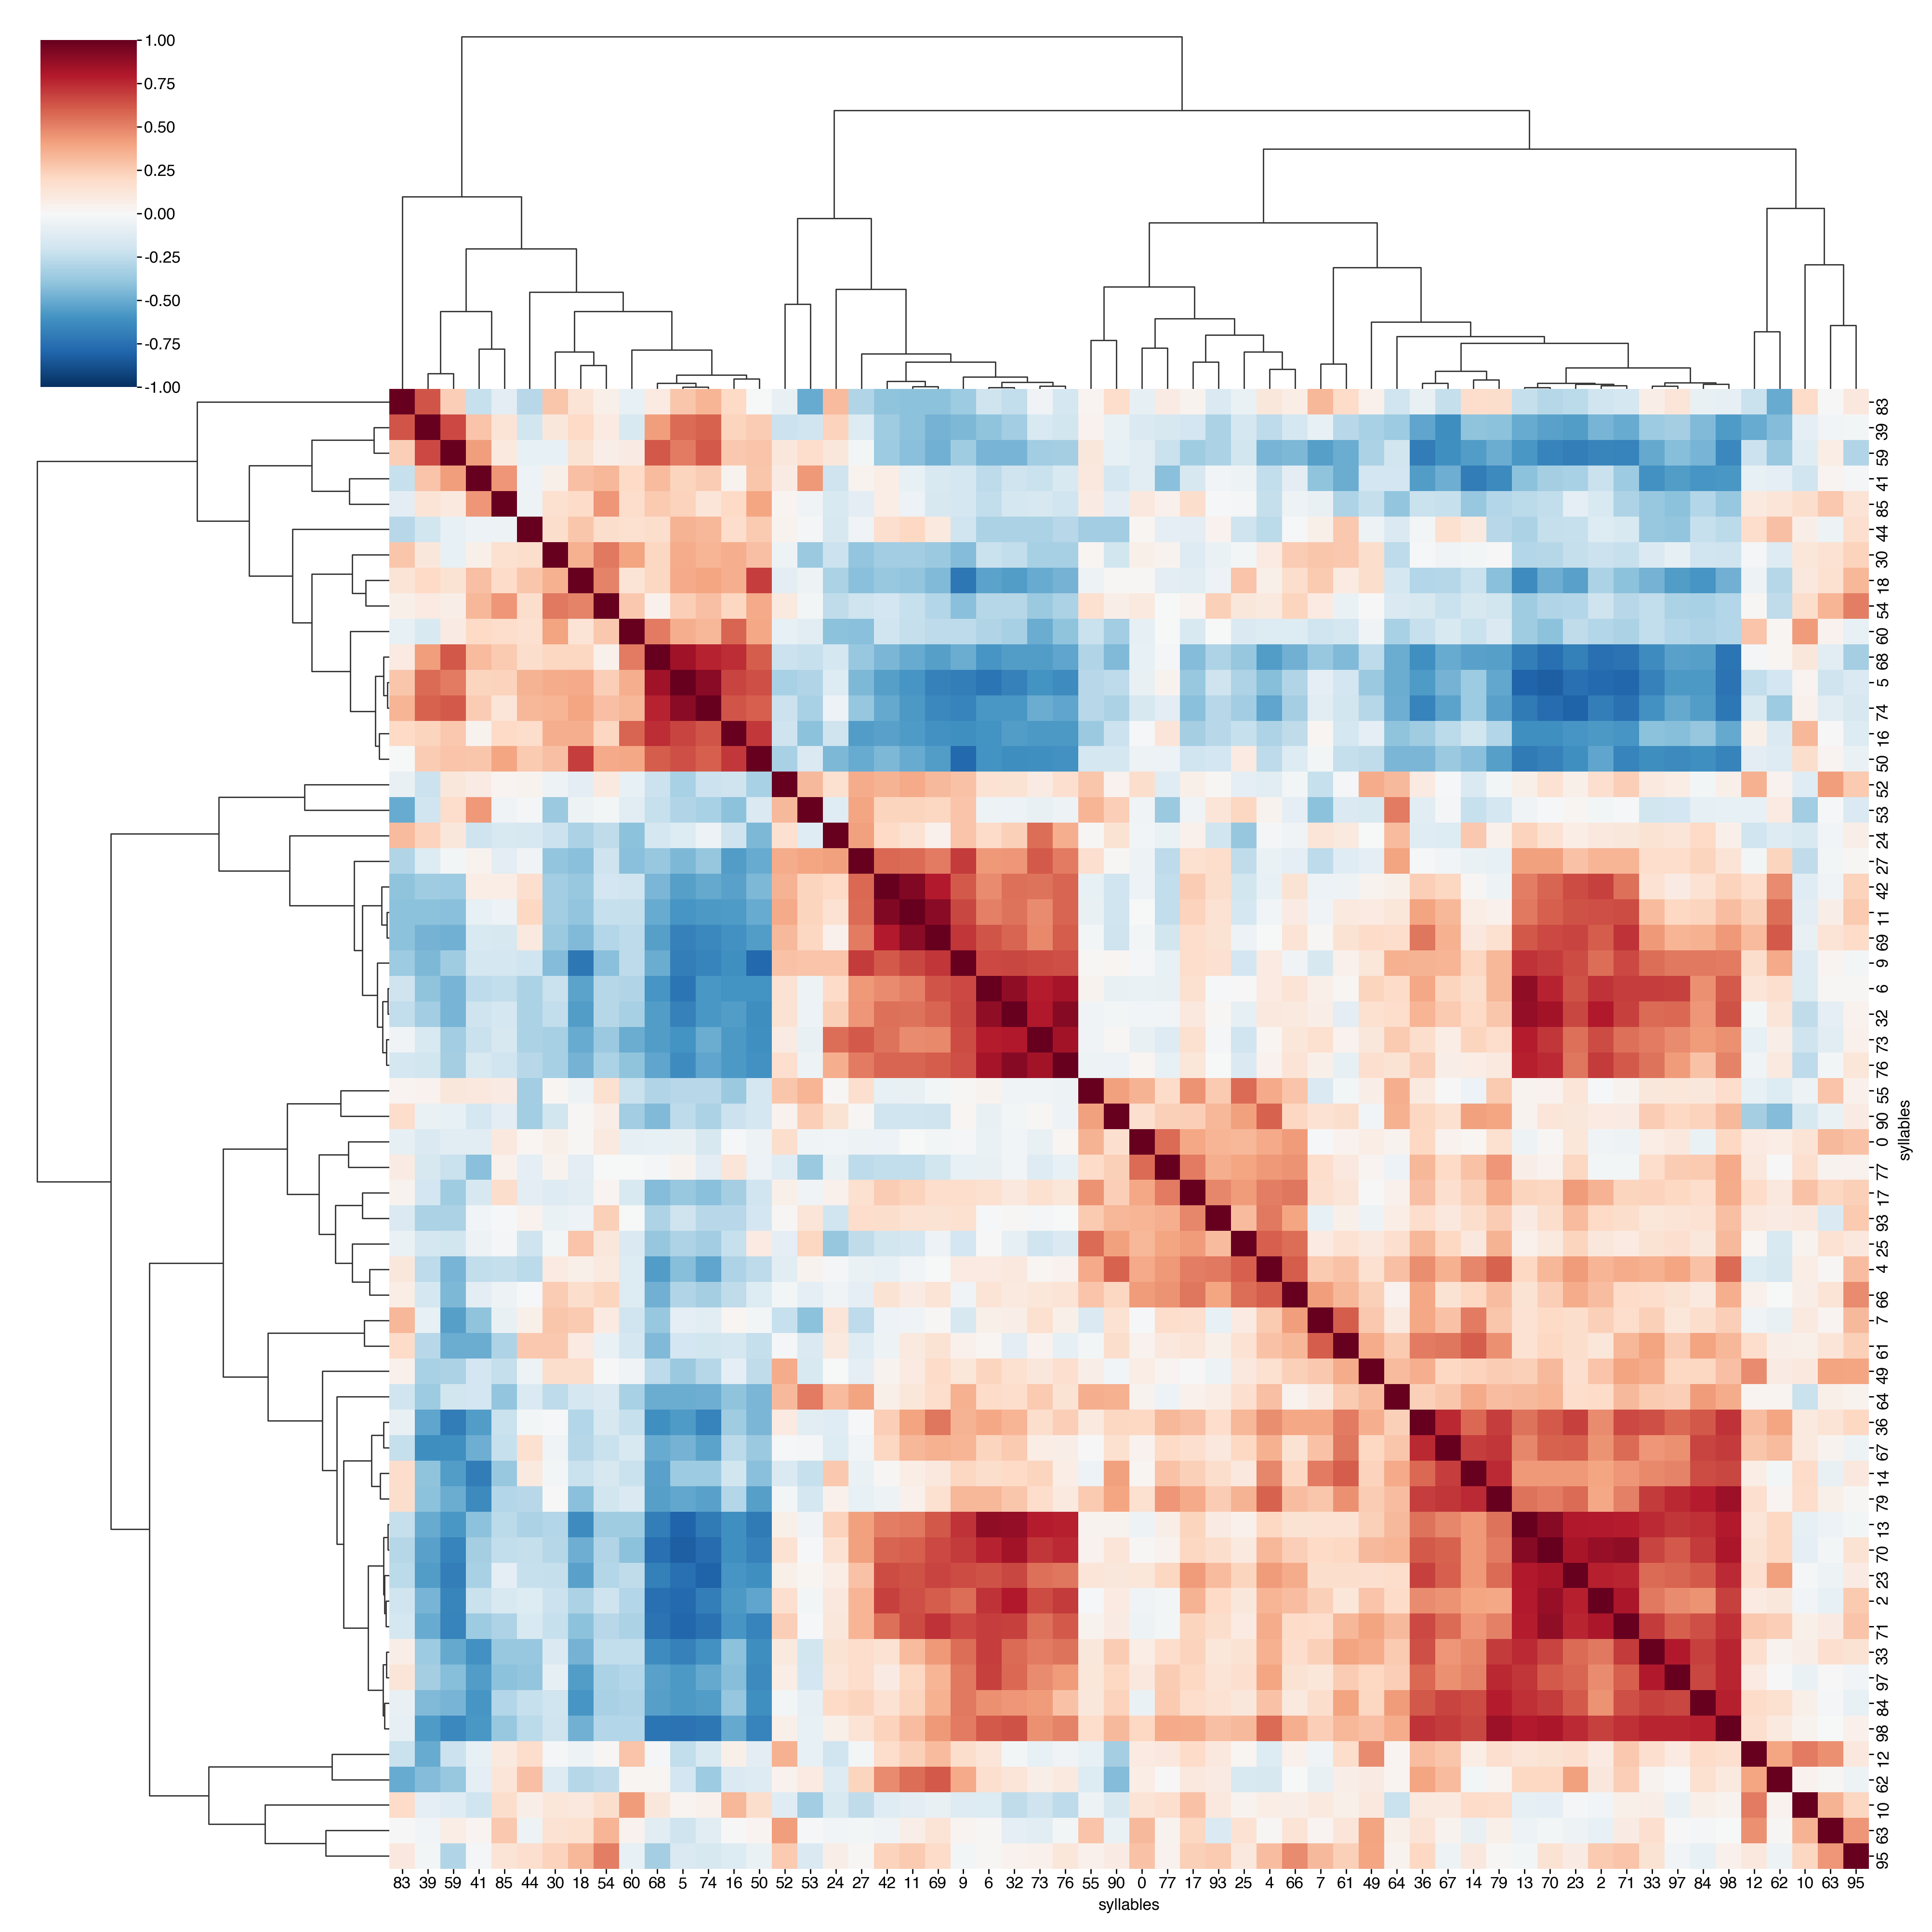

In [157]:
grid = sns.clustermap(ex.corr(), cmap='RdBu_r', vmax=1, vmin=-1, method='complete', metric='cosine', )

In [158]:
idx = grid.dendrogram_row.reordered_ind

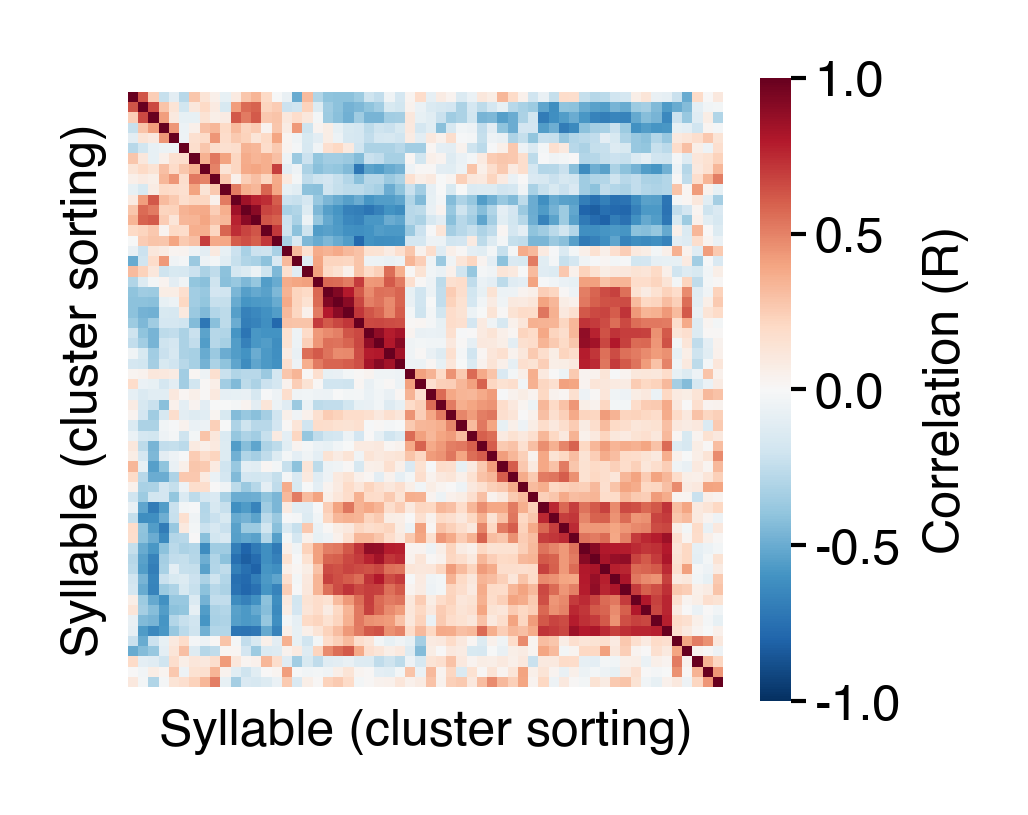

In [159]:
fig = figure(1.6, 1.35)
ax = sns.heatmap(
    ex.corr().to_numpy()[idx][:, idx],
    vmax=1,
    vmin=-1,
    cmap="RdBu_r",
    cbar_kws=dict(label="Correlation (R)"),
)
ax.set(
    aspect="equal",
    xlabel="Syllable (cluster sorting)",
    ylabel="Syllable (cluster sorting)",
    xticks=[],
    yticks=[]
)
saver(fig, f"template-correlation-mtx-{template_animal}");

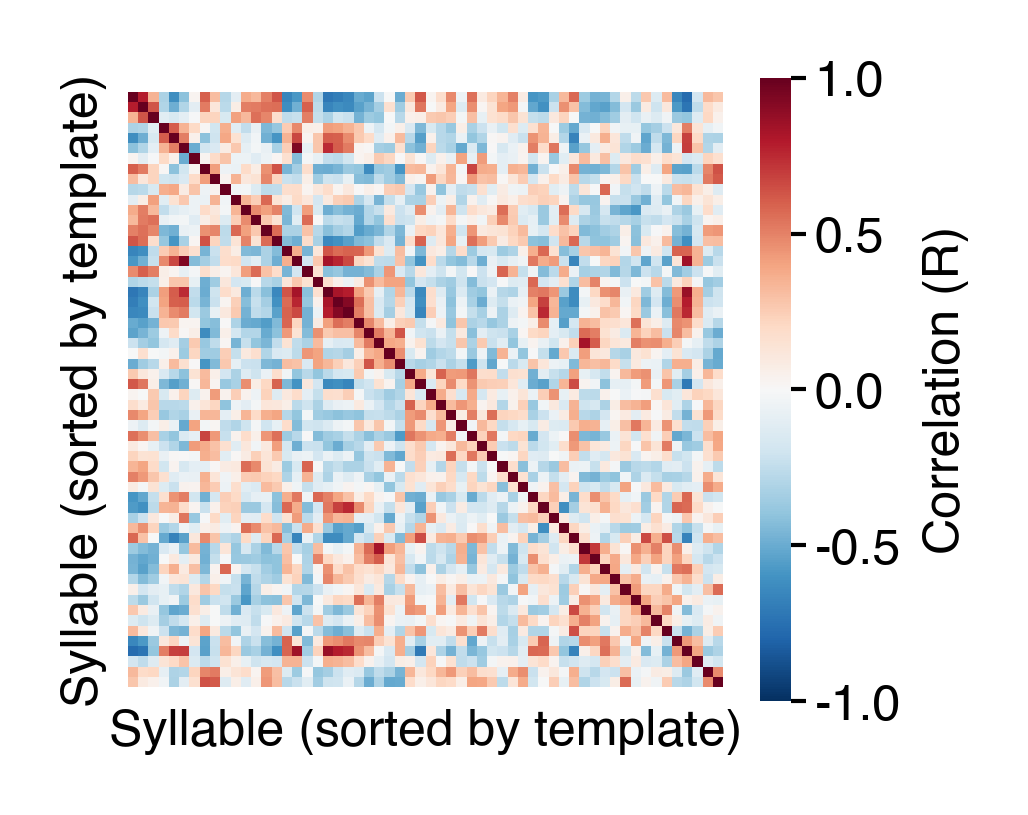

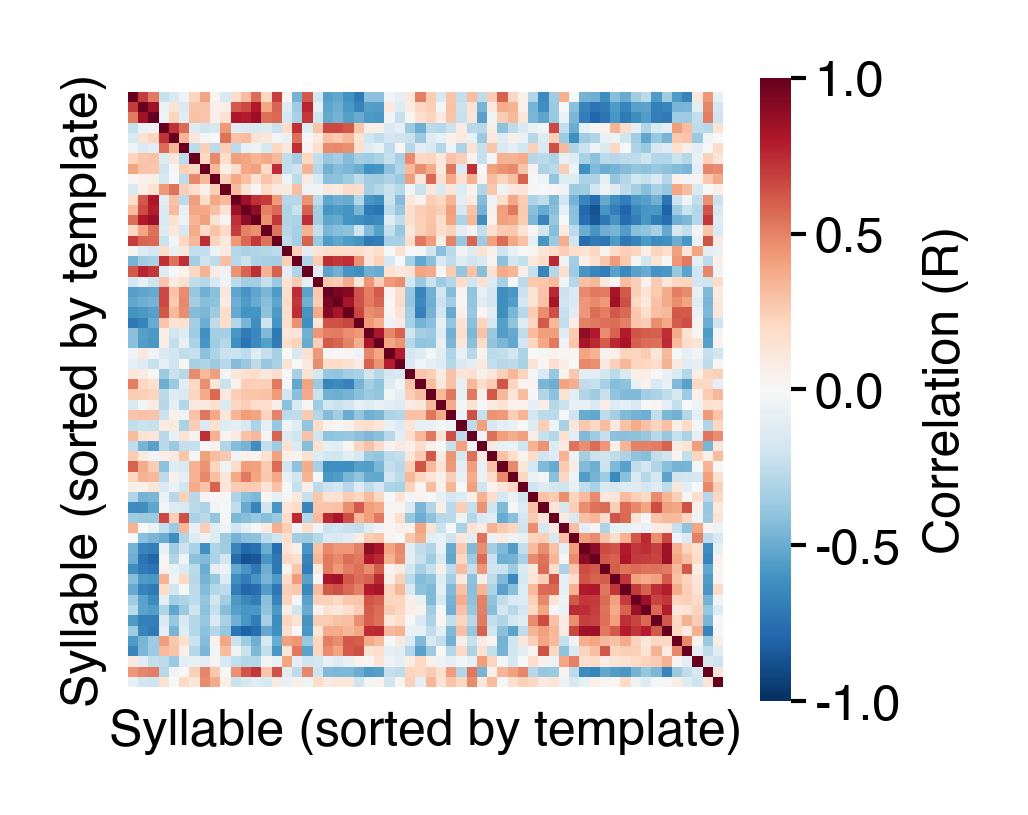

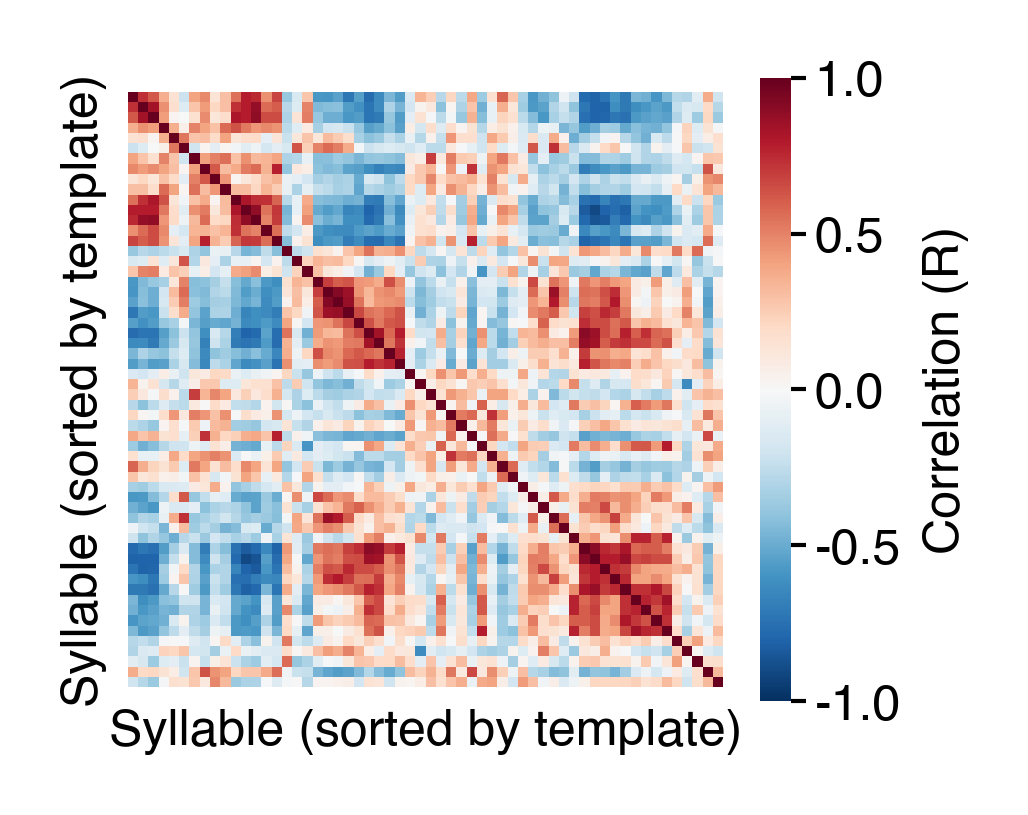

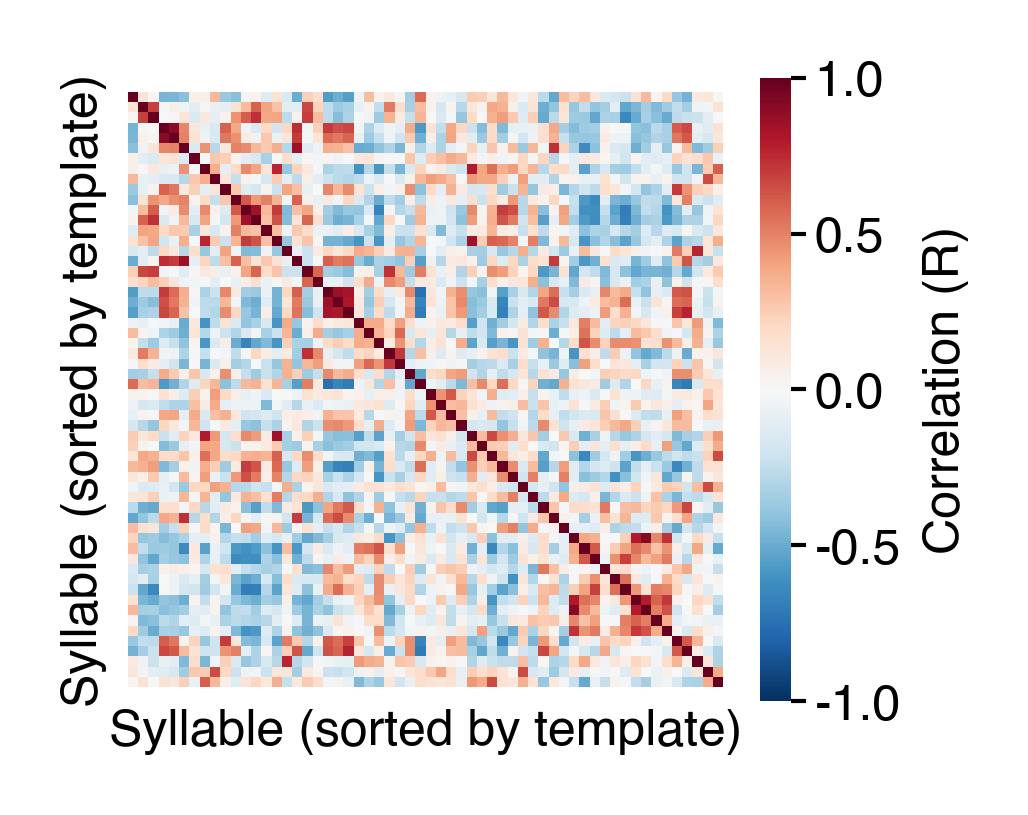

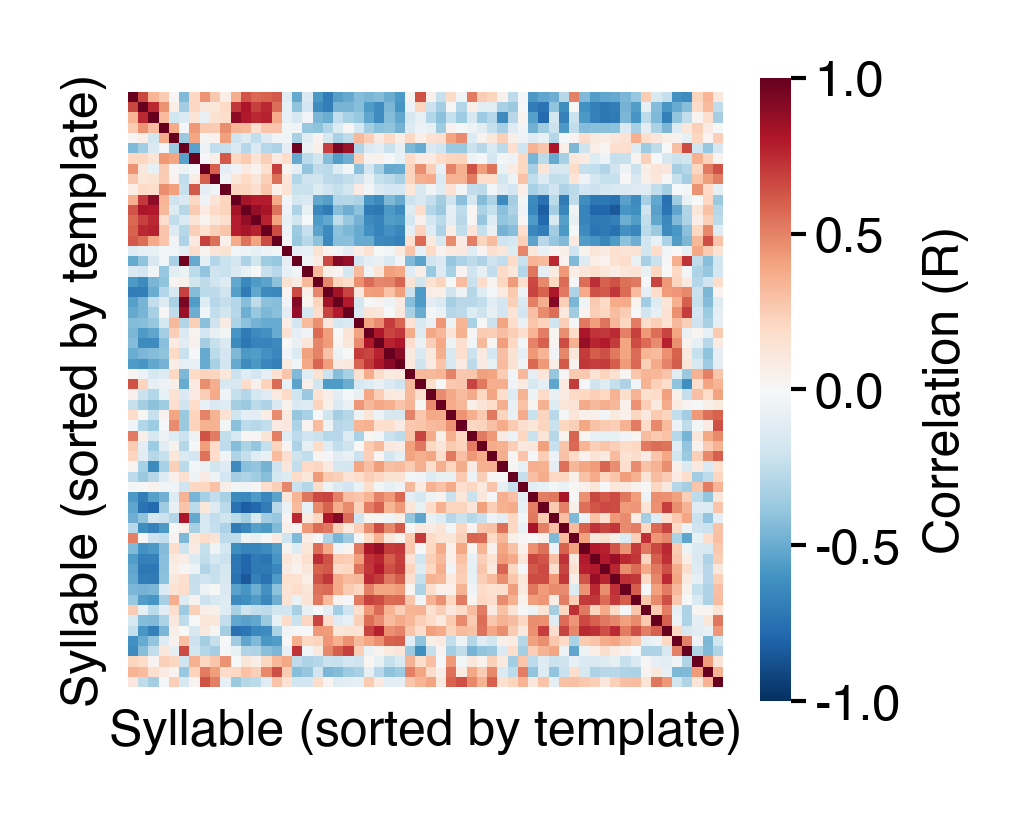

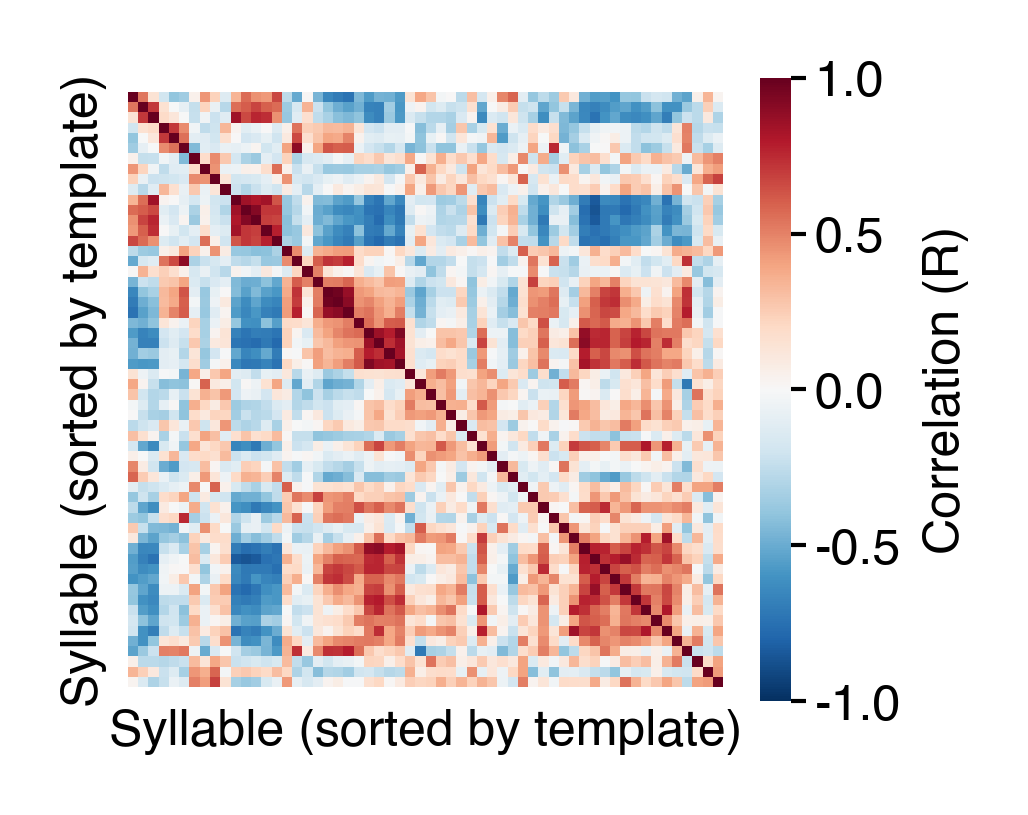

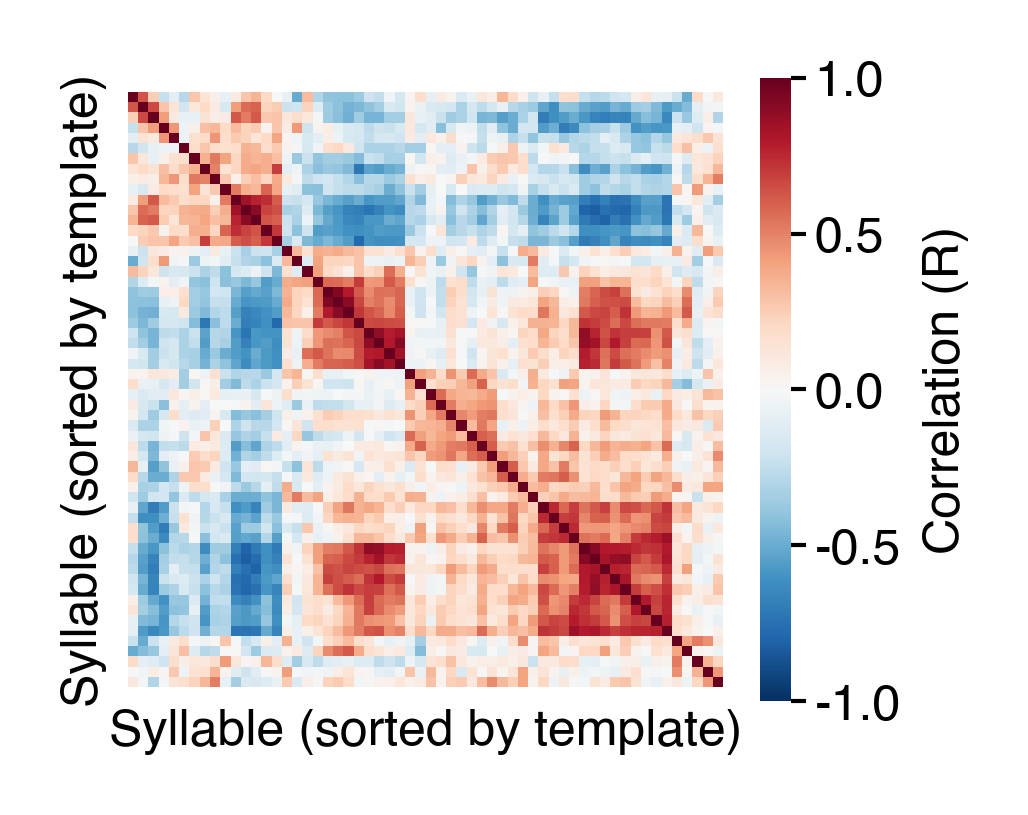

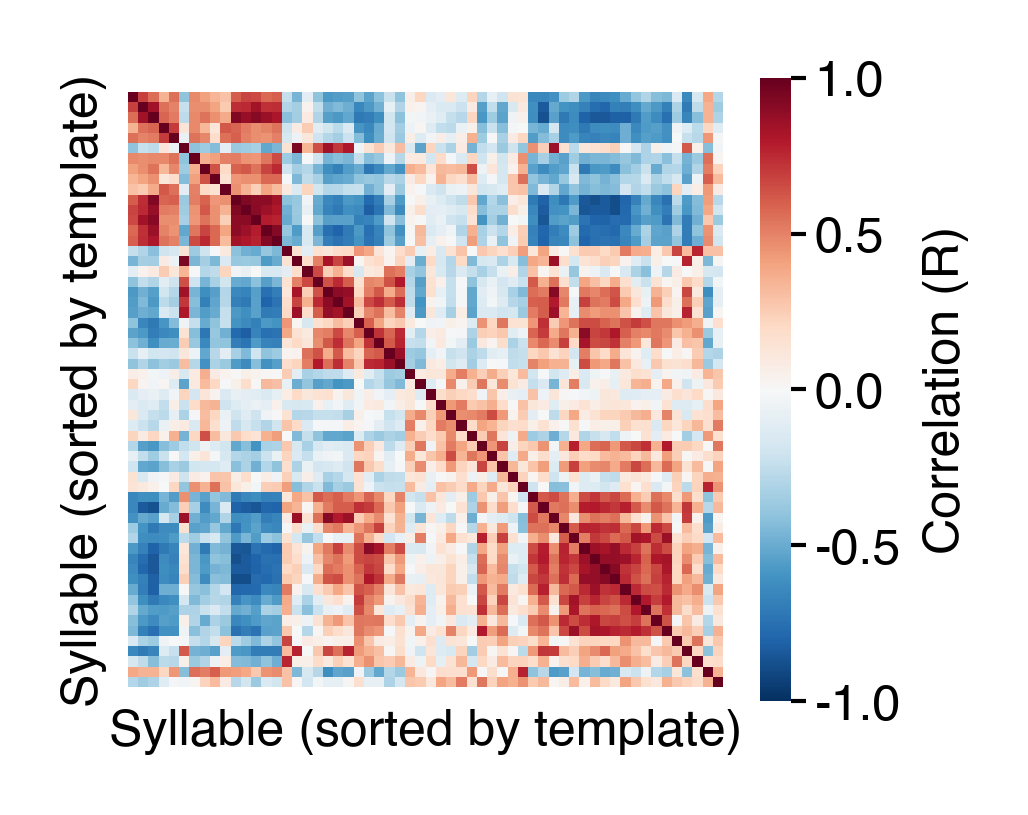

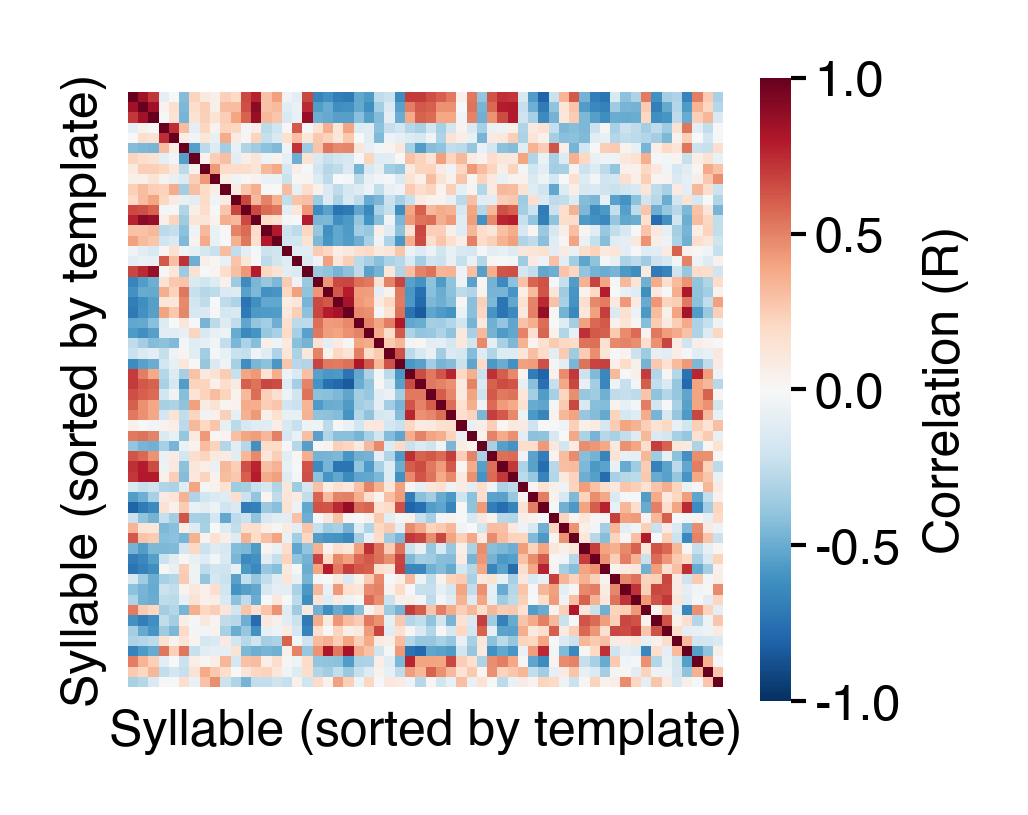

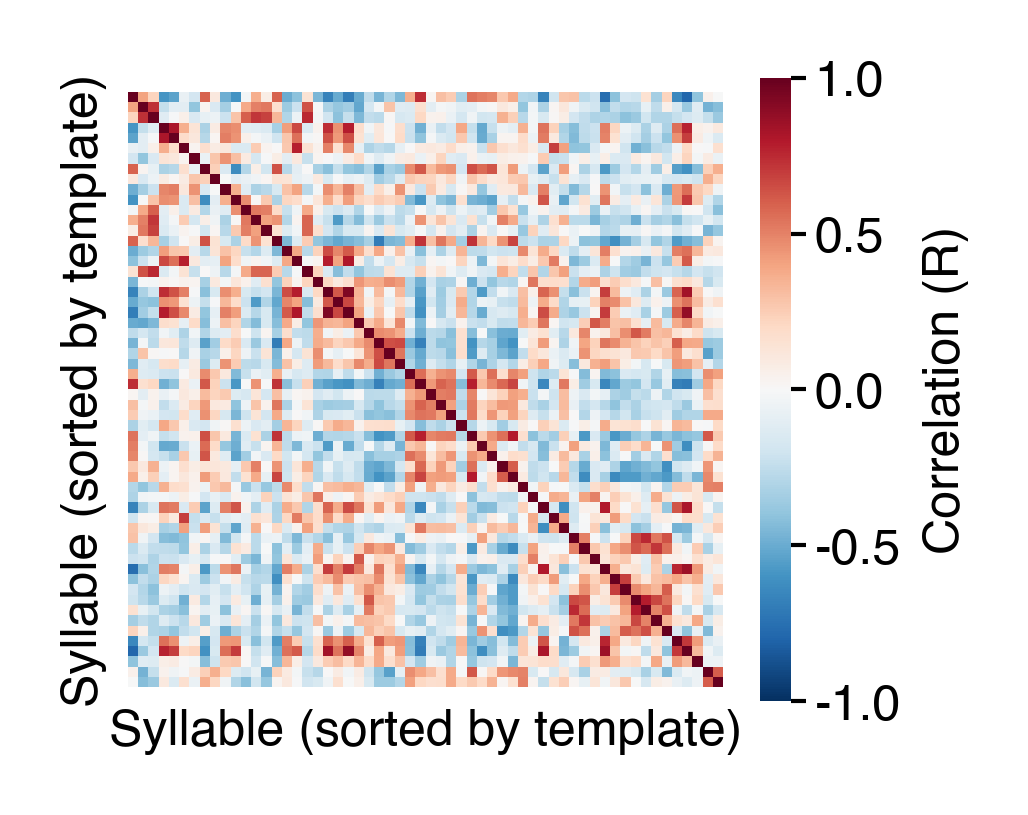

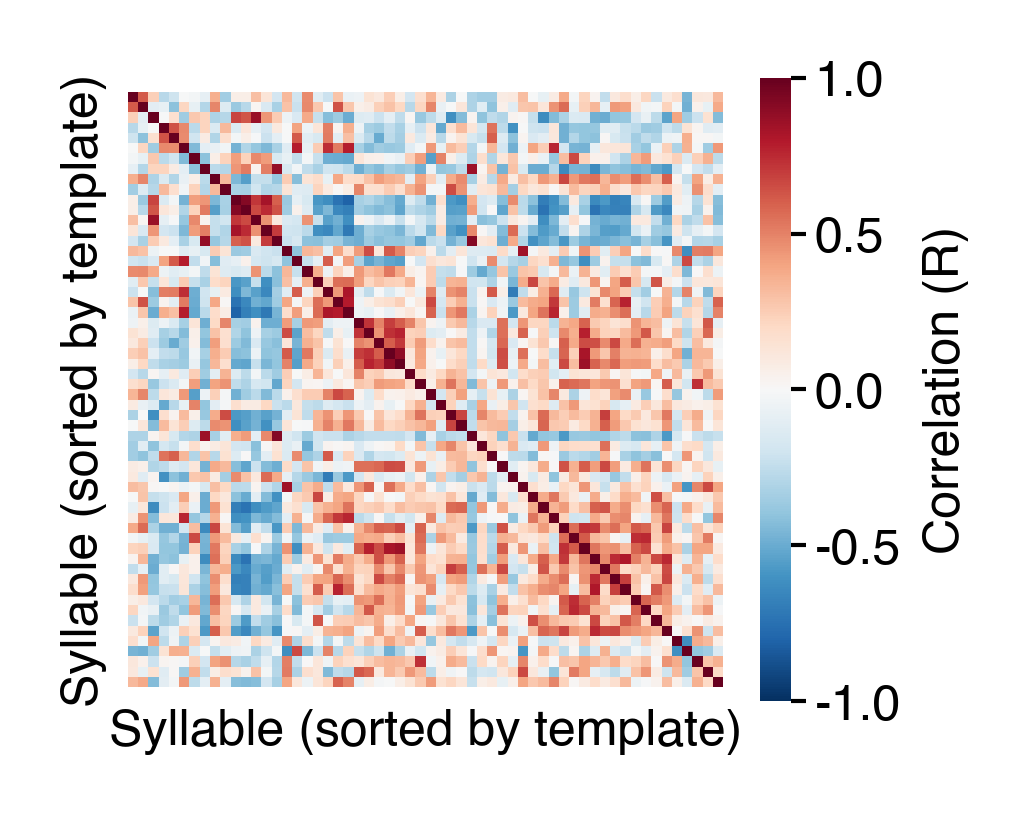

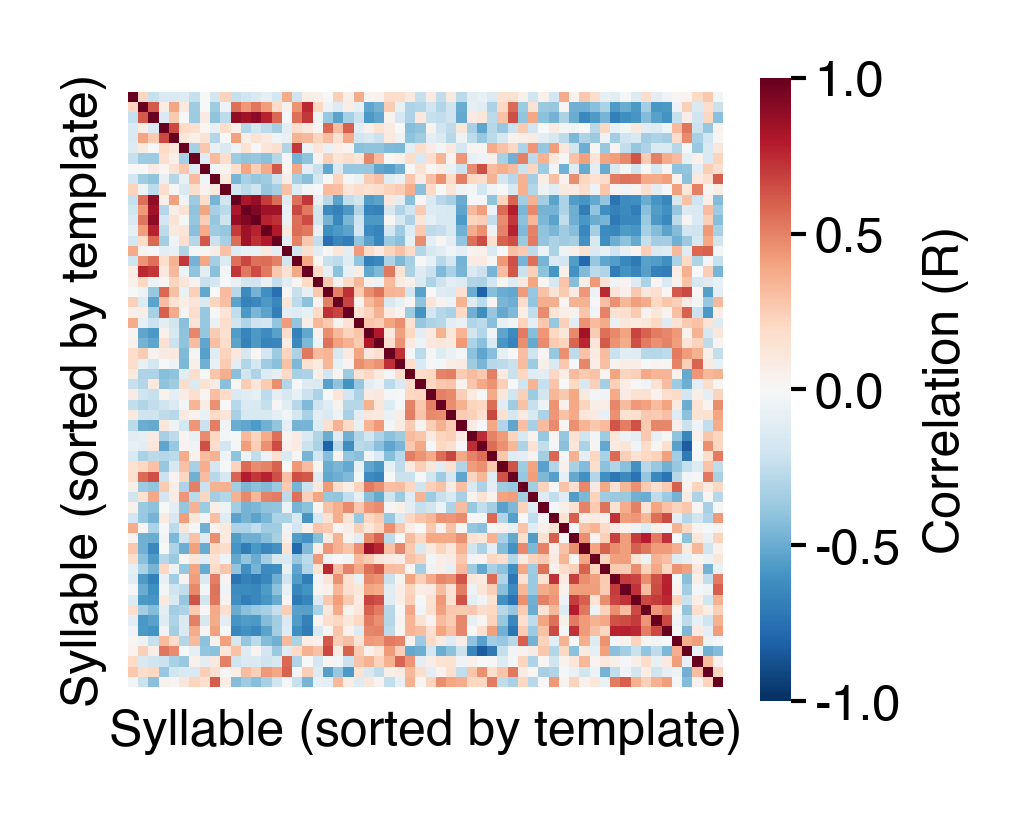

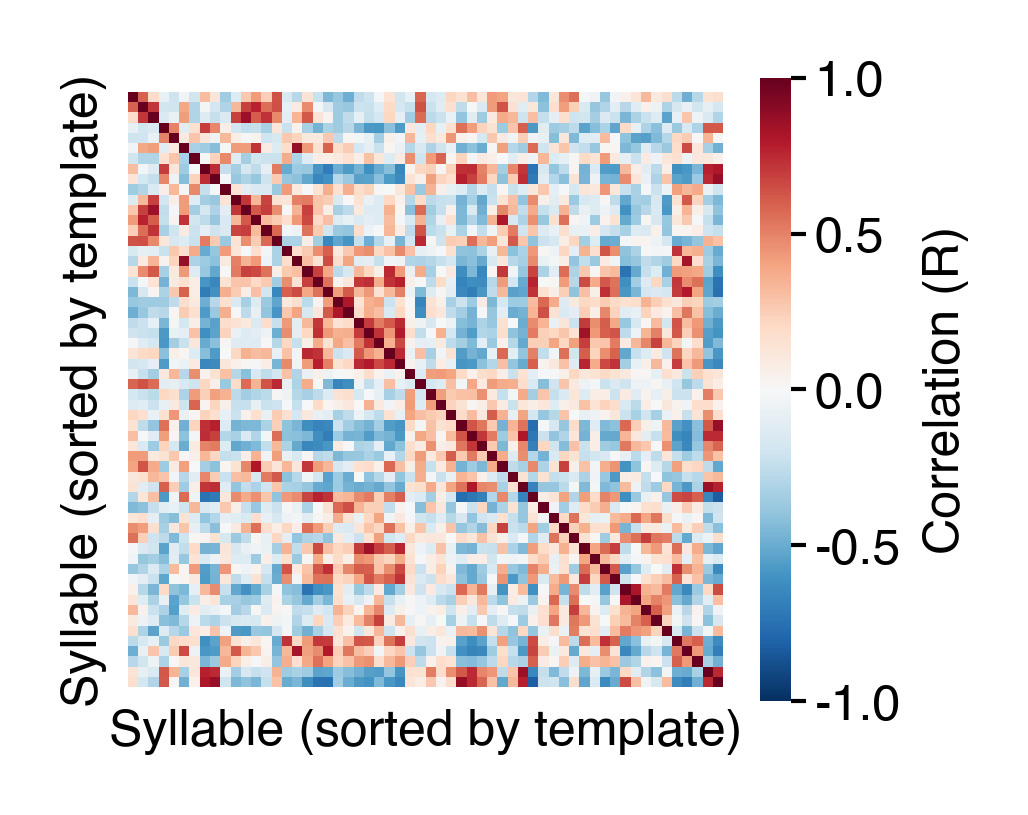

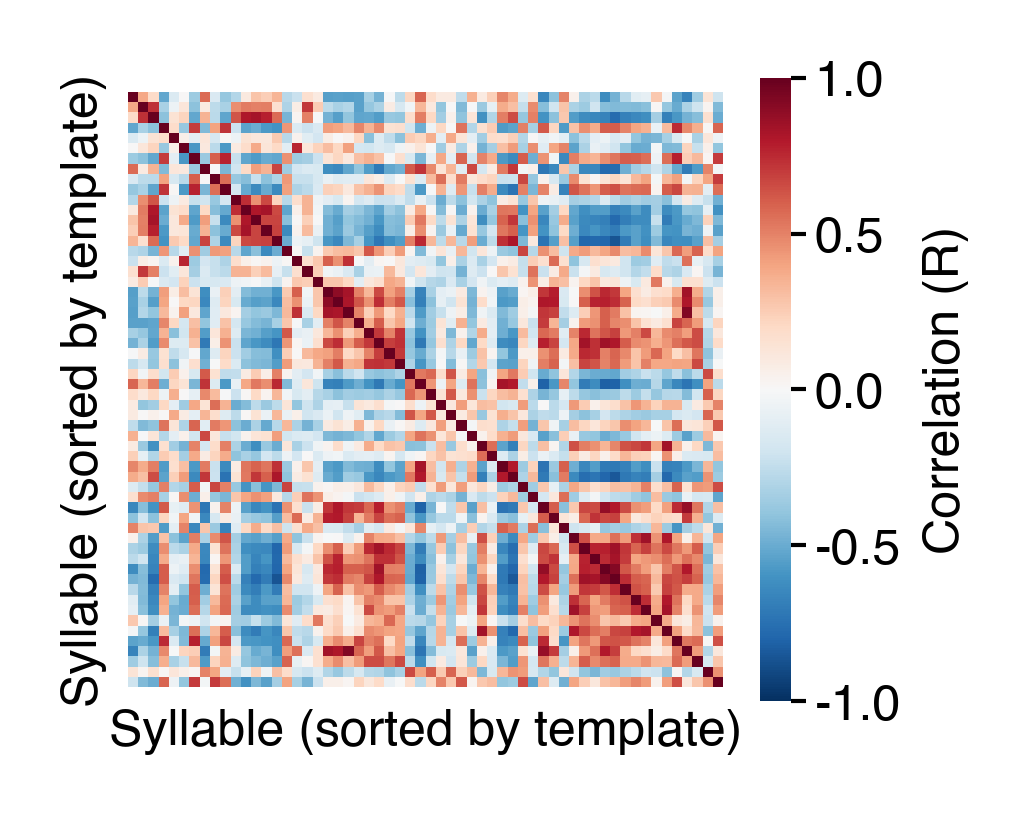

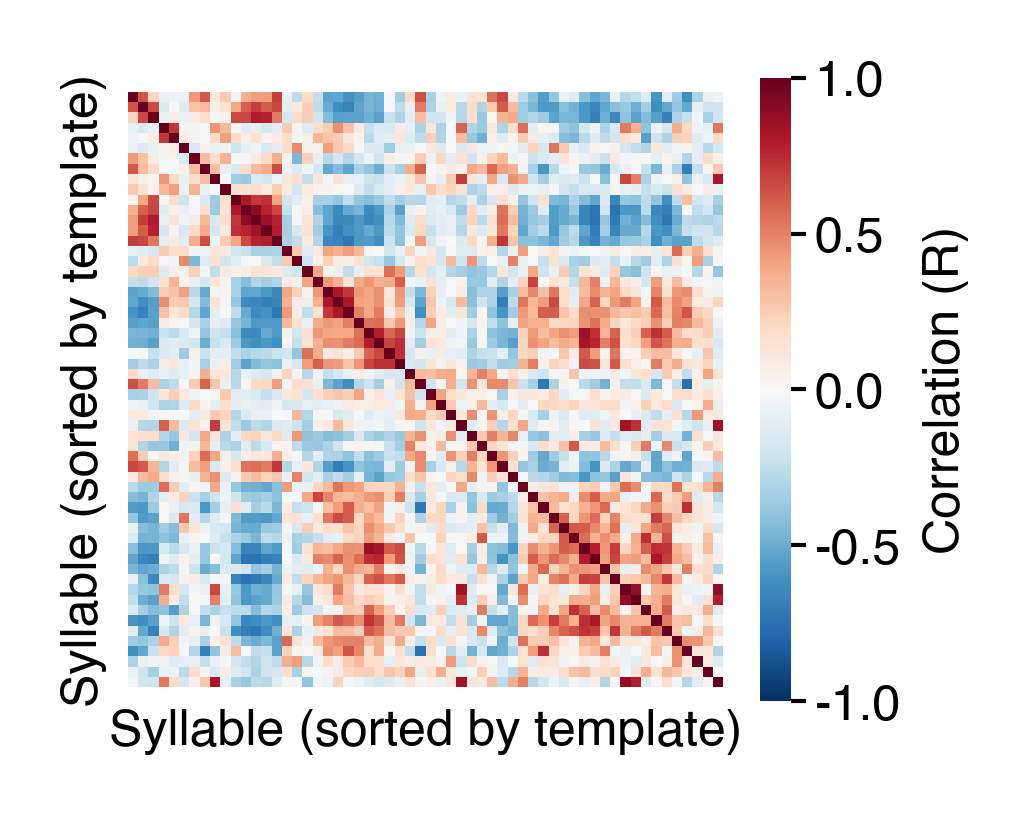

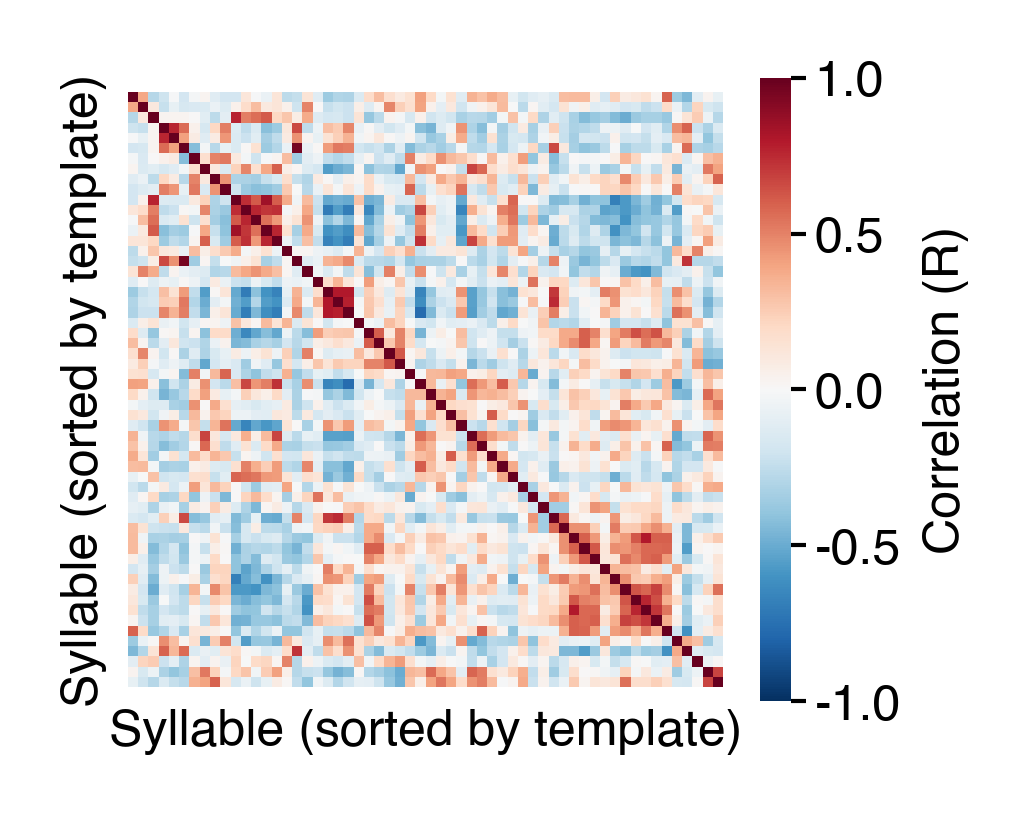

In [161]:
for mouse, _df in sample.groupby('mouse'):
    _df = _df[syllable_columns]

    fig = figure(1.6, 1.35)
    ax = sns.heatmap(
        _df.corr().to_numpy()[idx][:, idx],
        vmax=1,
        vmin=-1,
        cmap="RdBu_r",
        cbar_kws=dict(label="Correlation (R)"),
    )
    ax.set(
        aspect="equal",
        xlabel="Syllable (sorted by template)",
        ylabel="Syllable (sorted by template)",
        xticks=[],
        yticks=[]
    )
    saver(fig, f"correlation-mtx-{mouse}");